In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
site_country_map = {
    'AEAZ': 'Abu Dhabi, UAE',
    'CLST': 'Santiago, Chile',
    'PRFJ': 'Fajardo, Puerto Rico',
    'AUMN': 'Melbourne, Australia',
    'ETAD': 'Addis Ababa, Ethiopia',
    'SGSU': 'Singapore, Singapore',
    'ARCB': 'Buenos Aires, Argentina',
    'IDBD': 'Bandung, Indonesia',
    'TWKA': 'Kaohsiung, Taiwan',
    'BDDU': 'Dhaka, Bangladesh',
    'ILHA': 'Haifa, Israel',
    'TWTA': 'Taipei, Taiwan',
    'BIBU': 'Bujumbura, Burundi',
    'ILNZ': 'Rehovot, Israel',
    'USBA': 'Baltimore, USA',
    'USNO': 'Norman, USA',
    'CADO': 'Downsview, Canada',
    'INDH': 'Delhi, India',
    'USBO': 'Bondville, USA',
    'CAHA': 'Halifax, Canada',
    'INKA': 'Kanpur, India',
    'USMC': 'Mammoth Cave, USA',
    'CAKE': 'Kelowna, Canada',
    'KRSE': 'Seoul, South Korea',
    'USPA': 'Pasadena, USA',
    'CALE': 'Lethbridge, Canada',
    'KRUL': 'Ulsan, South Korea',
    'VNHN': 'Hanoi, Vietnam',
    'CASH': 'Sherbrooke, Canada',
    'MXMC': 'Mexico City, Mexico',
    'ZAJB': 'Johannesburg, South Africa',
    'CHTS': 'Beijing, China',
    'NGIL': 'Ilorin, Nigeria',
    'ZAPR': 'Pretoria, South Africa',
    'CODC': 'Palmira, Colombia',
    'PHMO': 'Manila, Philippines'
}

pm25_df = pd.read_csv("pm25_df.csv")
pm25_df['Site'] = pm25_df['Filter ID'].str.extract(r'([A-Z]+)')
pm25_df['Location'] = pm25_df['Site'].map(site_country_map)

country_hemisphere = {
    'Abu Dhabi, UAE': 'northern',
    'Santiago, Chile': 'southern',
    'Fajardo, Puerto Rico': 'northern',
    'Melbourne, Australia': 'southern',
    'Addis Ababa, Ethiopia': 'northern',
    'Singapore, Singapore': 'equatorial',
    'Buenos Aires, Argentina': 'southern',
    'Bandung, Indonesia': 'equatorial',
    'Kaohsiung, Taiwan': 'northern',
    'Dhaka, Bangladesh': 'northern',
    'Haifa, Israel': 'northern',
    'Taipei, Taiwan': 'northern',
    'Bujumbura, Burundi': 'equatorial',
    'Rehovot, Israel': 'northern',
    'Baltimore, USA': 'northern',
    'Norman, USA': 'northern',
    'Downsview, Canada': 'northern',
    'Delhi, India': 'northern',
    'Bondville, USA': 'northern',
    'Halifax, Canada': 'northern',
    'Kanpur, India': 'northern',
    'Mammoth Cave, USA': 'northern',
    'Kelowna, Canada': 'northern',
    'Seoul, South Korea': 'northern',
    'Pasadena, USA': 'northern',
    'Lethbridge, Canada': 'northern',
    'Ulsan, South Korea': 'northern',
    'Hanoi, Vietnam': 'northern',
    'Sherbrooke, Canada': 'northern',
    'Mexico City, Mexico': 'northern',
    'Johannesburg, South Africa': 'southern',
    'Beijing, China': 'northern',
    'Ilorin, Nigeria': 'northern',
    'Pretoria, South Africa': 'southern',
    'Palmira, Colombia': 'equatorial',
    'Manila, Philippines': 'northern'
}

pm25_df['Hemisphere'] = pm25_df['Location'].map(country_hemisphere)

def get_season(month, hemisphere):
    if hemisphere == 'northern':
        if month in [12, 1, 2]: return 'Winter'
        elif month in [3, 4, 5]: return 'Spring'
        elif month in [6, 7, 8]: return 'Summer'
        elif month in [9, 10, 11]: return 'Autumn'
    elif hemisphere == 'southern':
        if month in [12, 1, 2]: return 'Summer'
        elif month in [3, 4, 5]: return 'Autumn'
        elif month in [6, 7, 8]: return 'Winter'
        elif month in [9, 10, 11]: return 'Spring'
    elif hemisphere == 'equatorial':
        return 'Equatorial Season'
    else:
        return 'Unknown'

pm25_df['Sampling Start Date'] = pm25_df['Sampling Start Date'].replace('0', np.nan)
pm25_df['Sampling End Date'] = pm25_df['Sampling End Date'].replace('0', np.nan)
        
pm25_df['Sampling Start Date'] = pd.to_datetime(pm25_df['Sampling Start Date'], errors='coerce', dayfirst=False)
pm25_df['Sampling End Date'] = pd.to_datetime(pm25_df['Sampling End Date'], errors='coerce', dayfirst=False)

pm25_df = pm25_df.dropna(subset=['Sampling Start Date', 'Sampling End Date'])

pm25_df['Sampling Mid Date'] = pm25_df['Sampling Start Date'] + (pm25_df['Sampling End Date'] - pm25_df['Sampling Start Date']) / 2

pm25_df['Month'] = pm25_df['Sampling Mid Date'].dt.month
pm25_df['Season'] = pm25_df.apply(lambda row: get_season(row['Month'], row['Hemisphere']), axis=1)

pm25_df.to_csv("pm25_df.csv", index=False)

In [3]:
print(pm25_df.columns.tolist())

['Filter ID', 'Analysis ID', 'Filter Type', 'Sampling Start Date', 'Sampling End Date', 'Mass collected on filter (ug)', 'Sampled volume (m3)', 'PM2.5(ug/m3)', 'optical_depth', 'b_abs_lambda', 'MAC_lambda', 'OD@900', 'b_abs_lambda@900', 'MAC_lambda@900', 'f_mass_EC', 'Black_carbon_mass', 'Non_Black_carbon_mass', 'b_abs_BC@400', 'b_abs_BrC@400', 'Site', 'Country', 'Hemisphere', 'Sampling Mid Date', 'Month', 'Season', 'b_abs_BC@550', 'b_abs_BrC@550', 'Latitude', 'Longitude', 'year', 'Location']


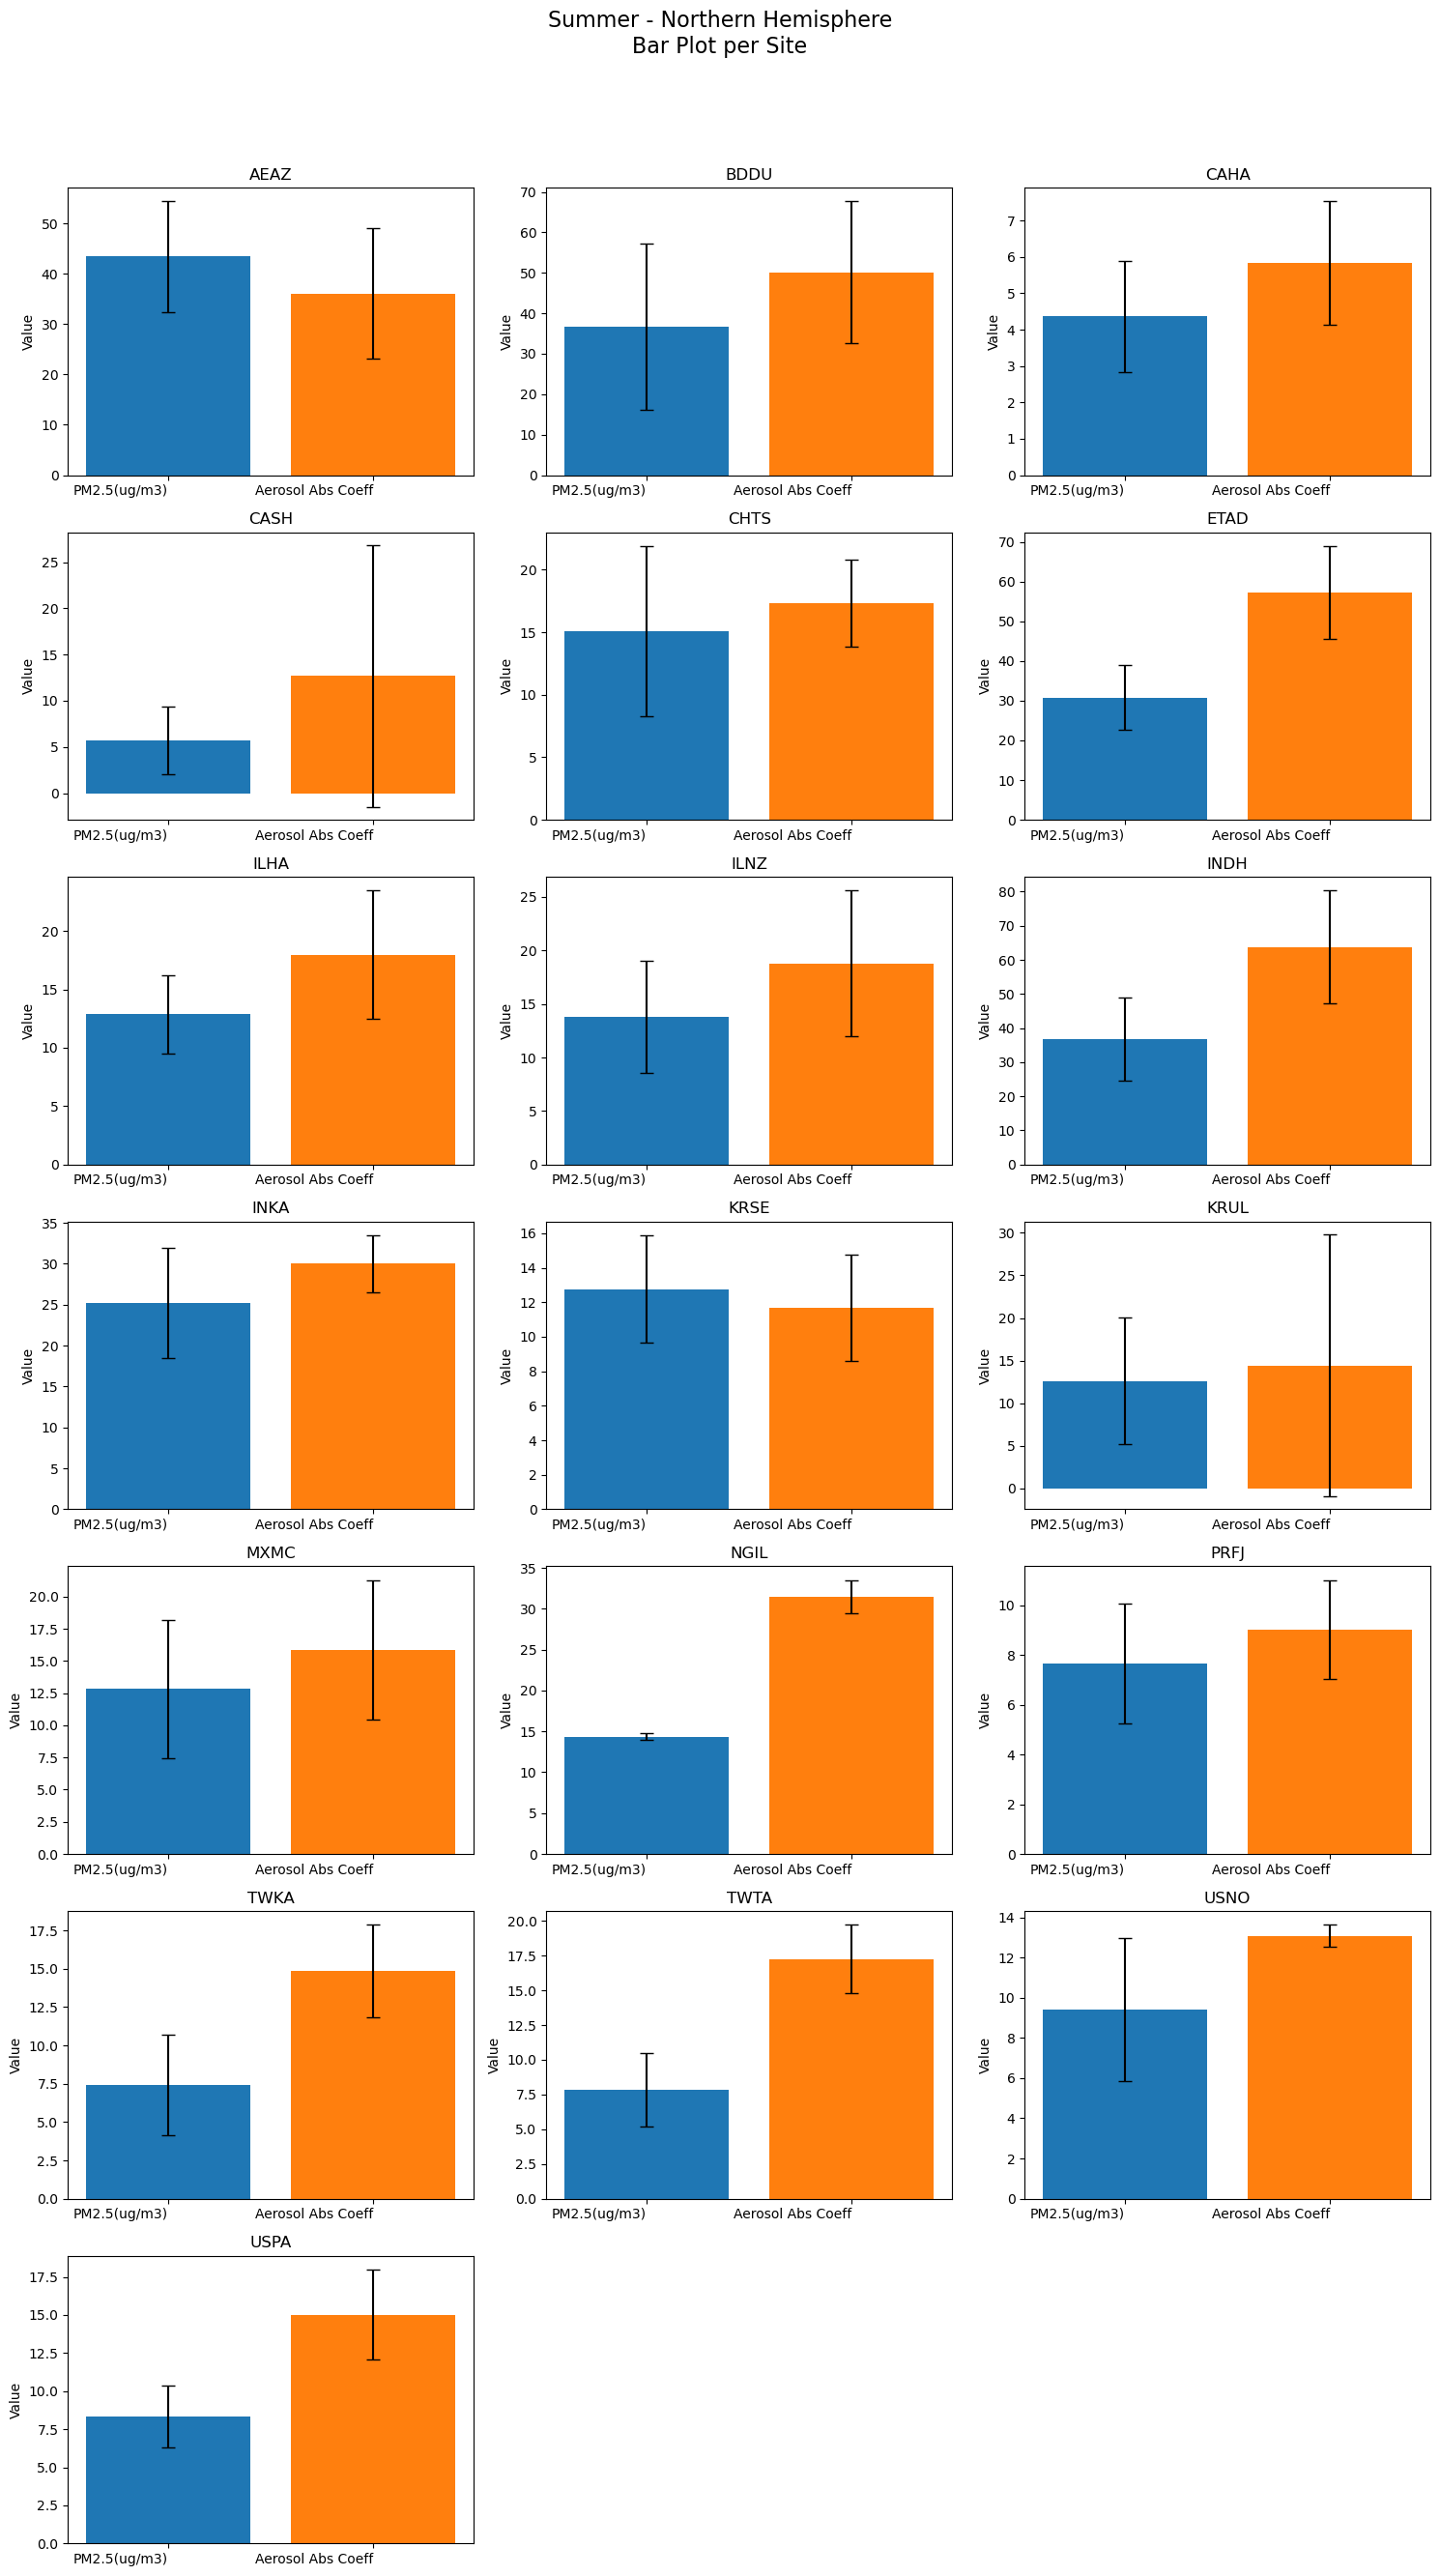

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Choose filters
season_filter = 'Summer'
hemisphere_filter = 'northern'

# STEP 2: Filter the DataFrame
filtered_df = pm25_df[
    (pm25_df['Season'] == season_filter) &
    (pm25_df['Hemisphere'] == hemisphere_filter)
]

# STEP 3: Group by Site
metrics = ['PM2.5(ug/m3)', 'b_abs_lambda']
grouped = filtered_df.groupby('Site')

# How many sites?
sites = list(grouped.groups.keys())
n_sites = len(sites)

# Layout: automatic rows & cols for subplots
n_cols = 3
n_rows = (n_sites + n_cols - 1) // n_cols

# STEP 4: Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# STEP 5: Plot each site in its own subplot
for idx, site in enumerate(sites):
    row, col = divmod(idx, n_cols)
    ax = axes[row][col]
    
    data = grouped.get_group(site)
    means = data[metrics].mean()
    errors = data[metrics].std()

    ax.bar(metrics, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax.set_title(site)
    ax.set_ylabel('Value')
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(['PM2.5(ug/m3)', 'Aerosol Abs Coeff'], ha='right')

# Hide any empty subplots
for idx in range(n_sites, n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row][col].axis('off')

# Final layout
fig.suptitle(f'{season_filter} - {hemisphere_filter.capitalize()} Hemisphere\nBar Plot per Site', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

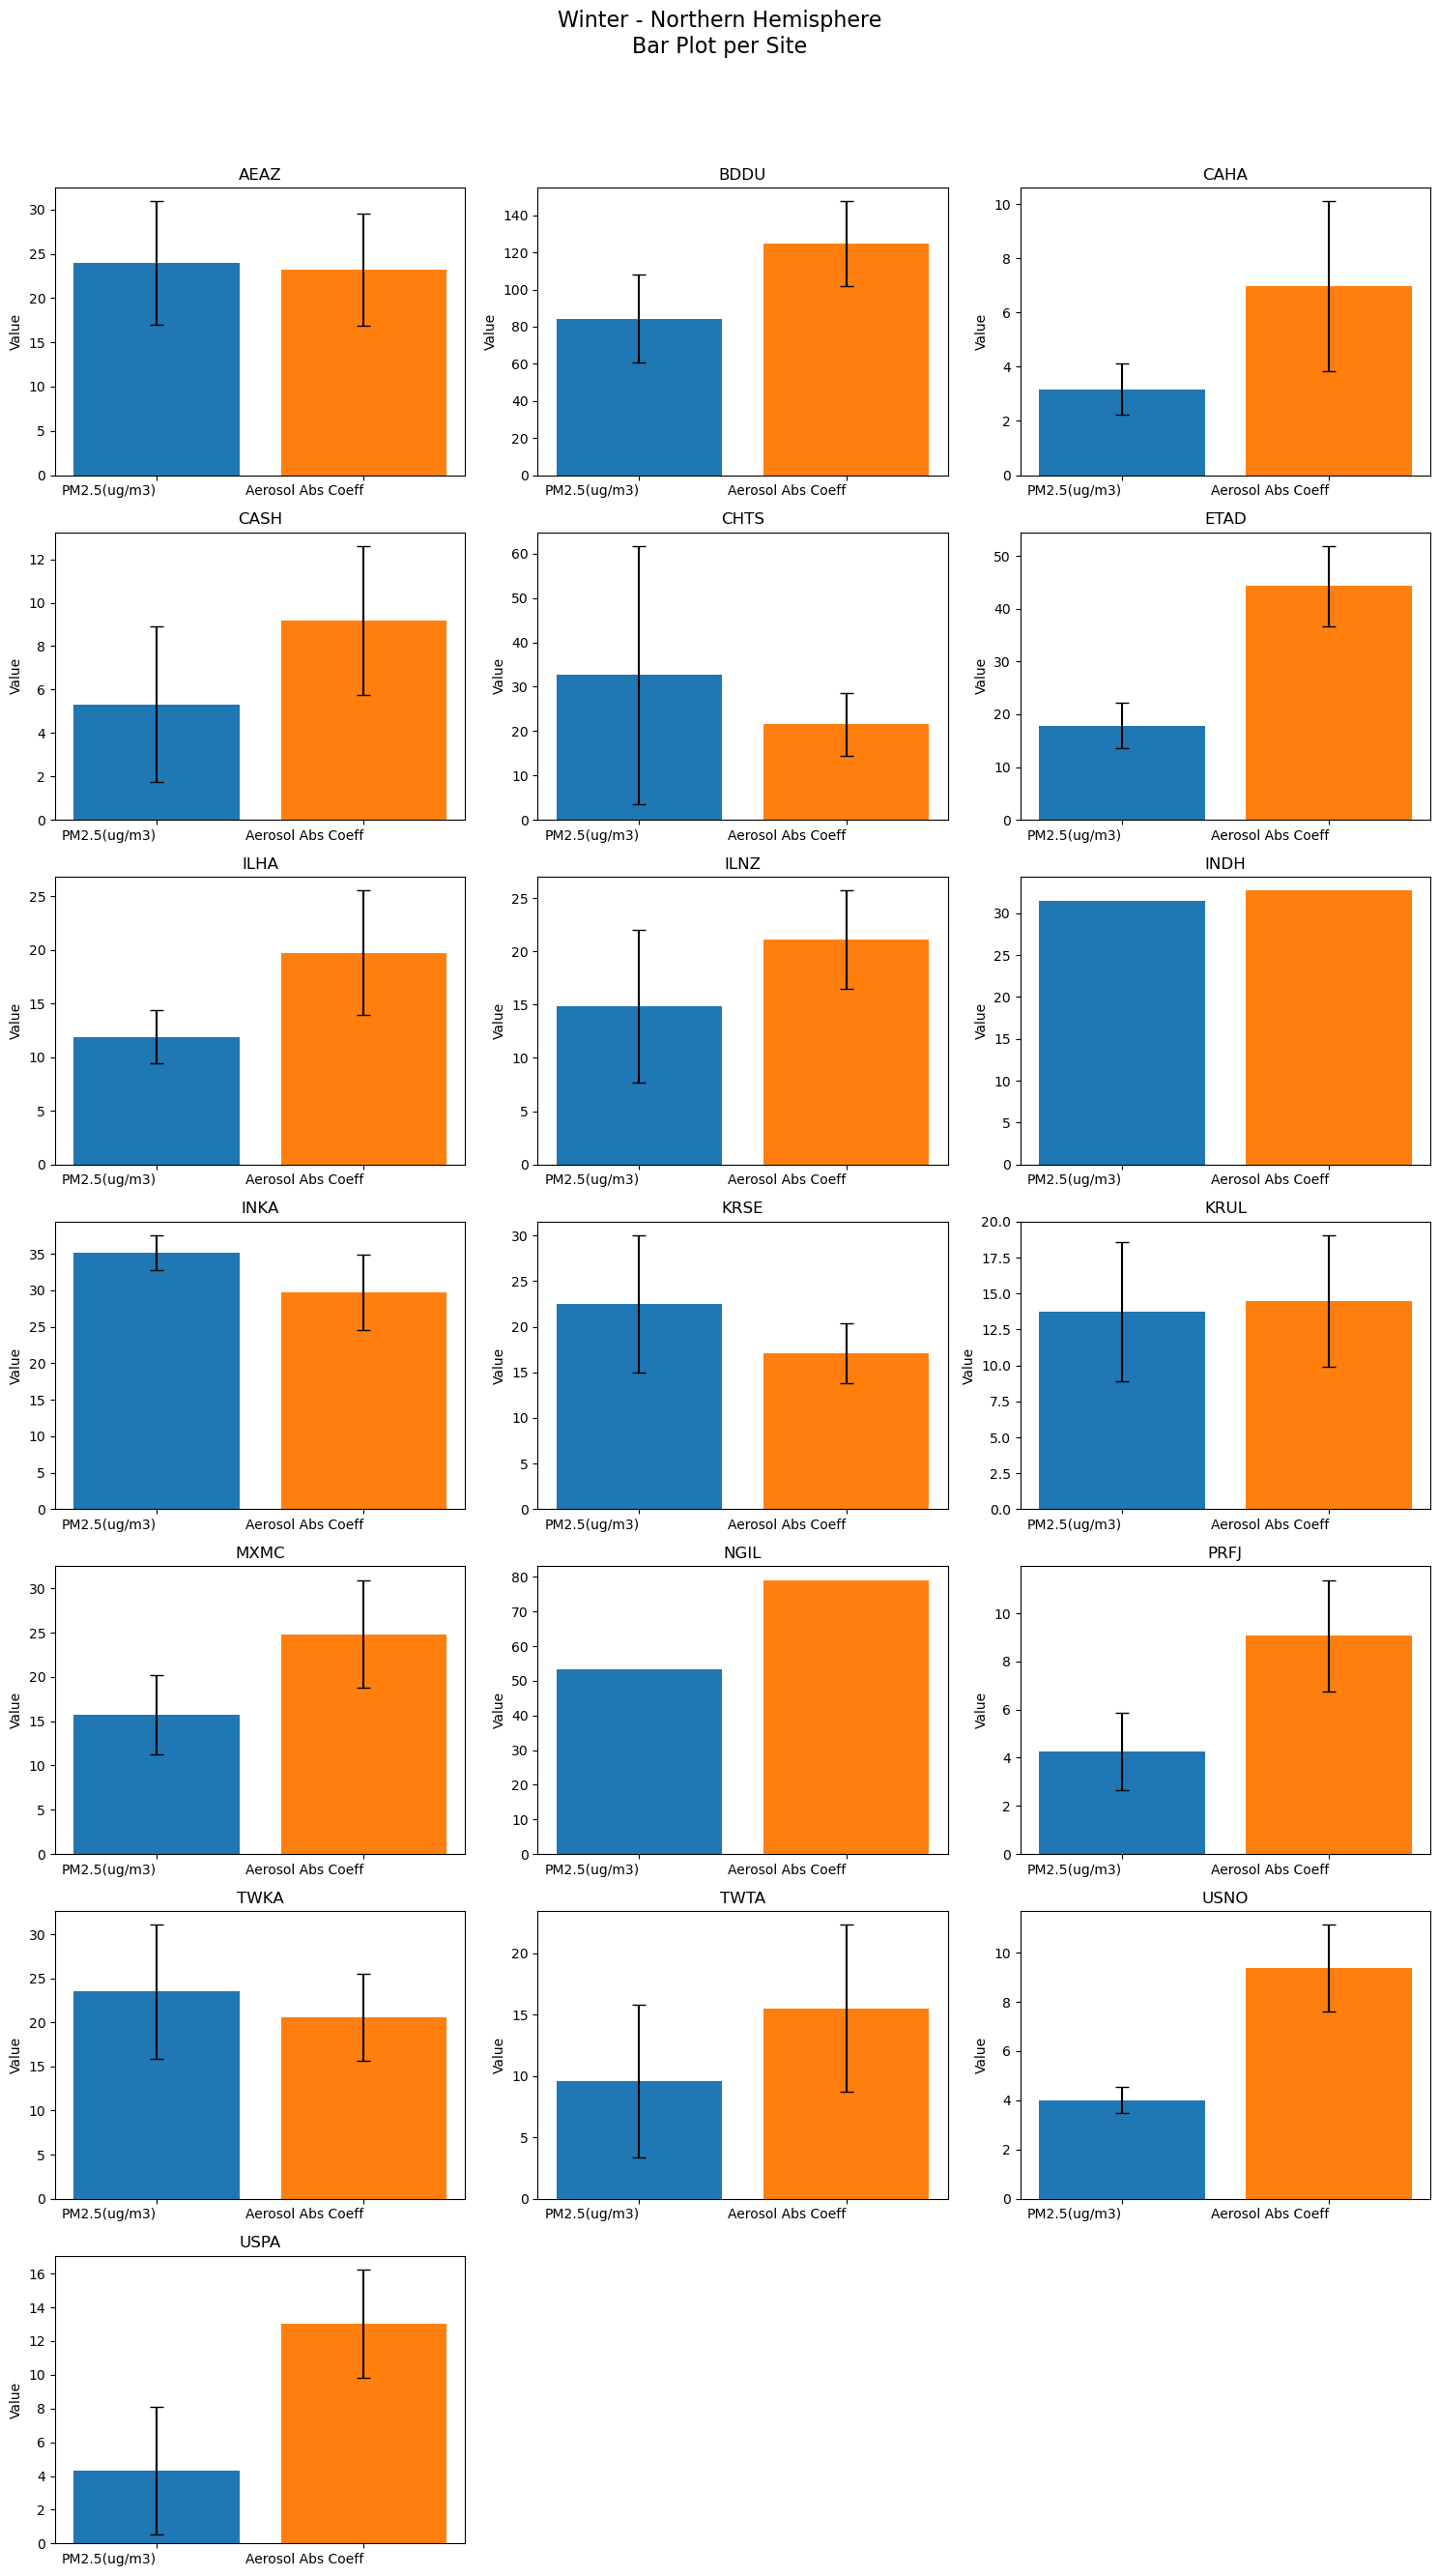

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Choose filters
season_filter = 'Winter'
hemisphere_filter = 'northern'

# STEP 2: Filter the DataFrame
filtered_df = pm25_df[
    (pm25_df['Season'] == season_filter) &
    (pm25_df['Hemisphere'] == hemisphere_filter)
]

# STEP 3: Group by Site
metrics = ['PM2.5(ug/m3)', 'b_abs_lambda']
grouped = filtered_df.groupby('Site')

# How many sites?
sites = list(grouped.groups.keys())
n_sites = len(sites)

# Layout: automatic rows & cols for subplots
n_cols = 3
n_rows = (n_sites + n_cols - 1) // n_cols

# STEP 4: Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# STEP 5: Plot each site in its own subplot
for idx, site in enumerate(sites):
    row, col = divmod(idx, n_cols)
    ax = axes[row][col]
    
    data = grouped.get_group(site)
    means = data[metrics].mean()
    errors = data[metrics].std()

    ax.bar(metrics, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax.set_title(site)
    ax.set_ylabel('Value')
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(['PM2.5(ug/m3)', 'Aerosol Abs Coeff'], ha='right')

# Hide any empty subplots
for idx in range(n_sites, n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row][col].axis('off')

# Final layout
fig.suptitle(f'{season_filter} - {hemisphere_filter.capitalize()} Hemisphere\nBar Plot per Site', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

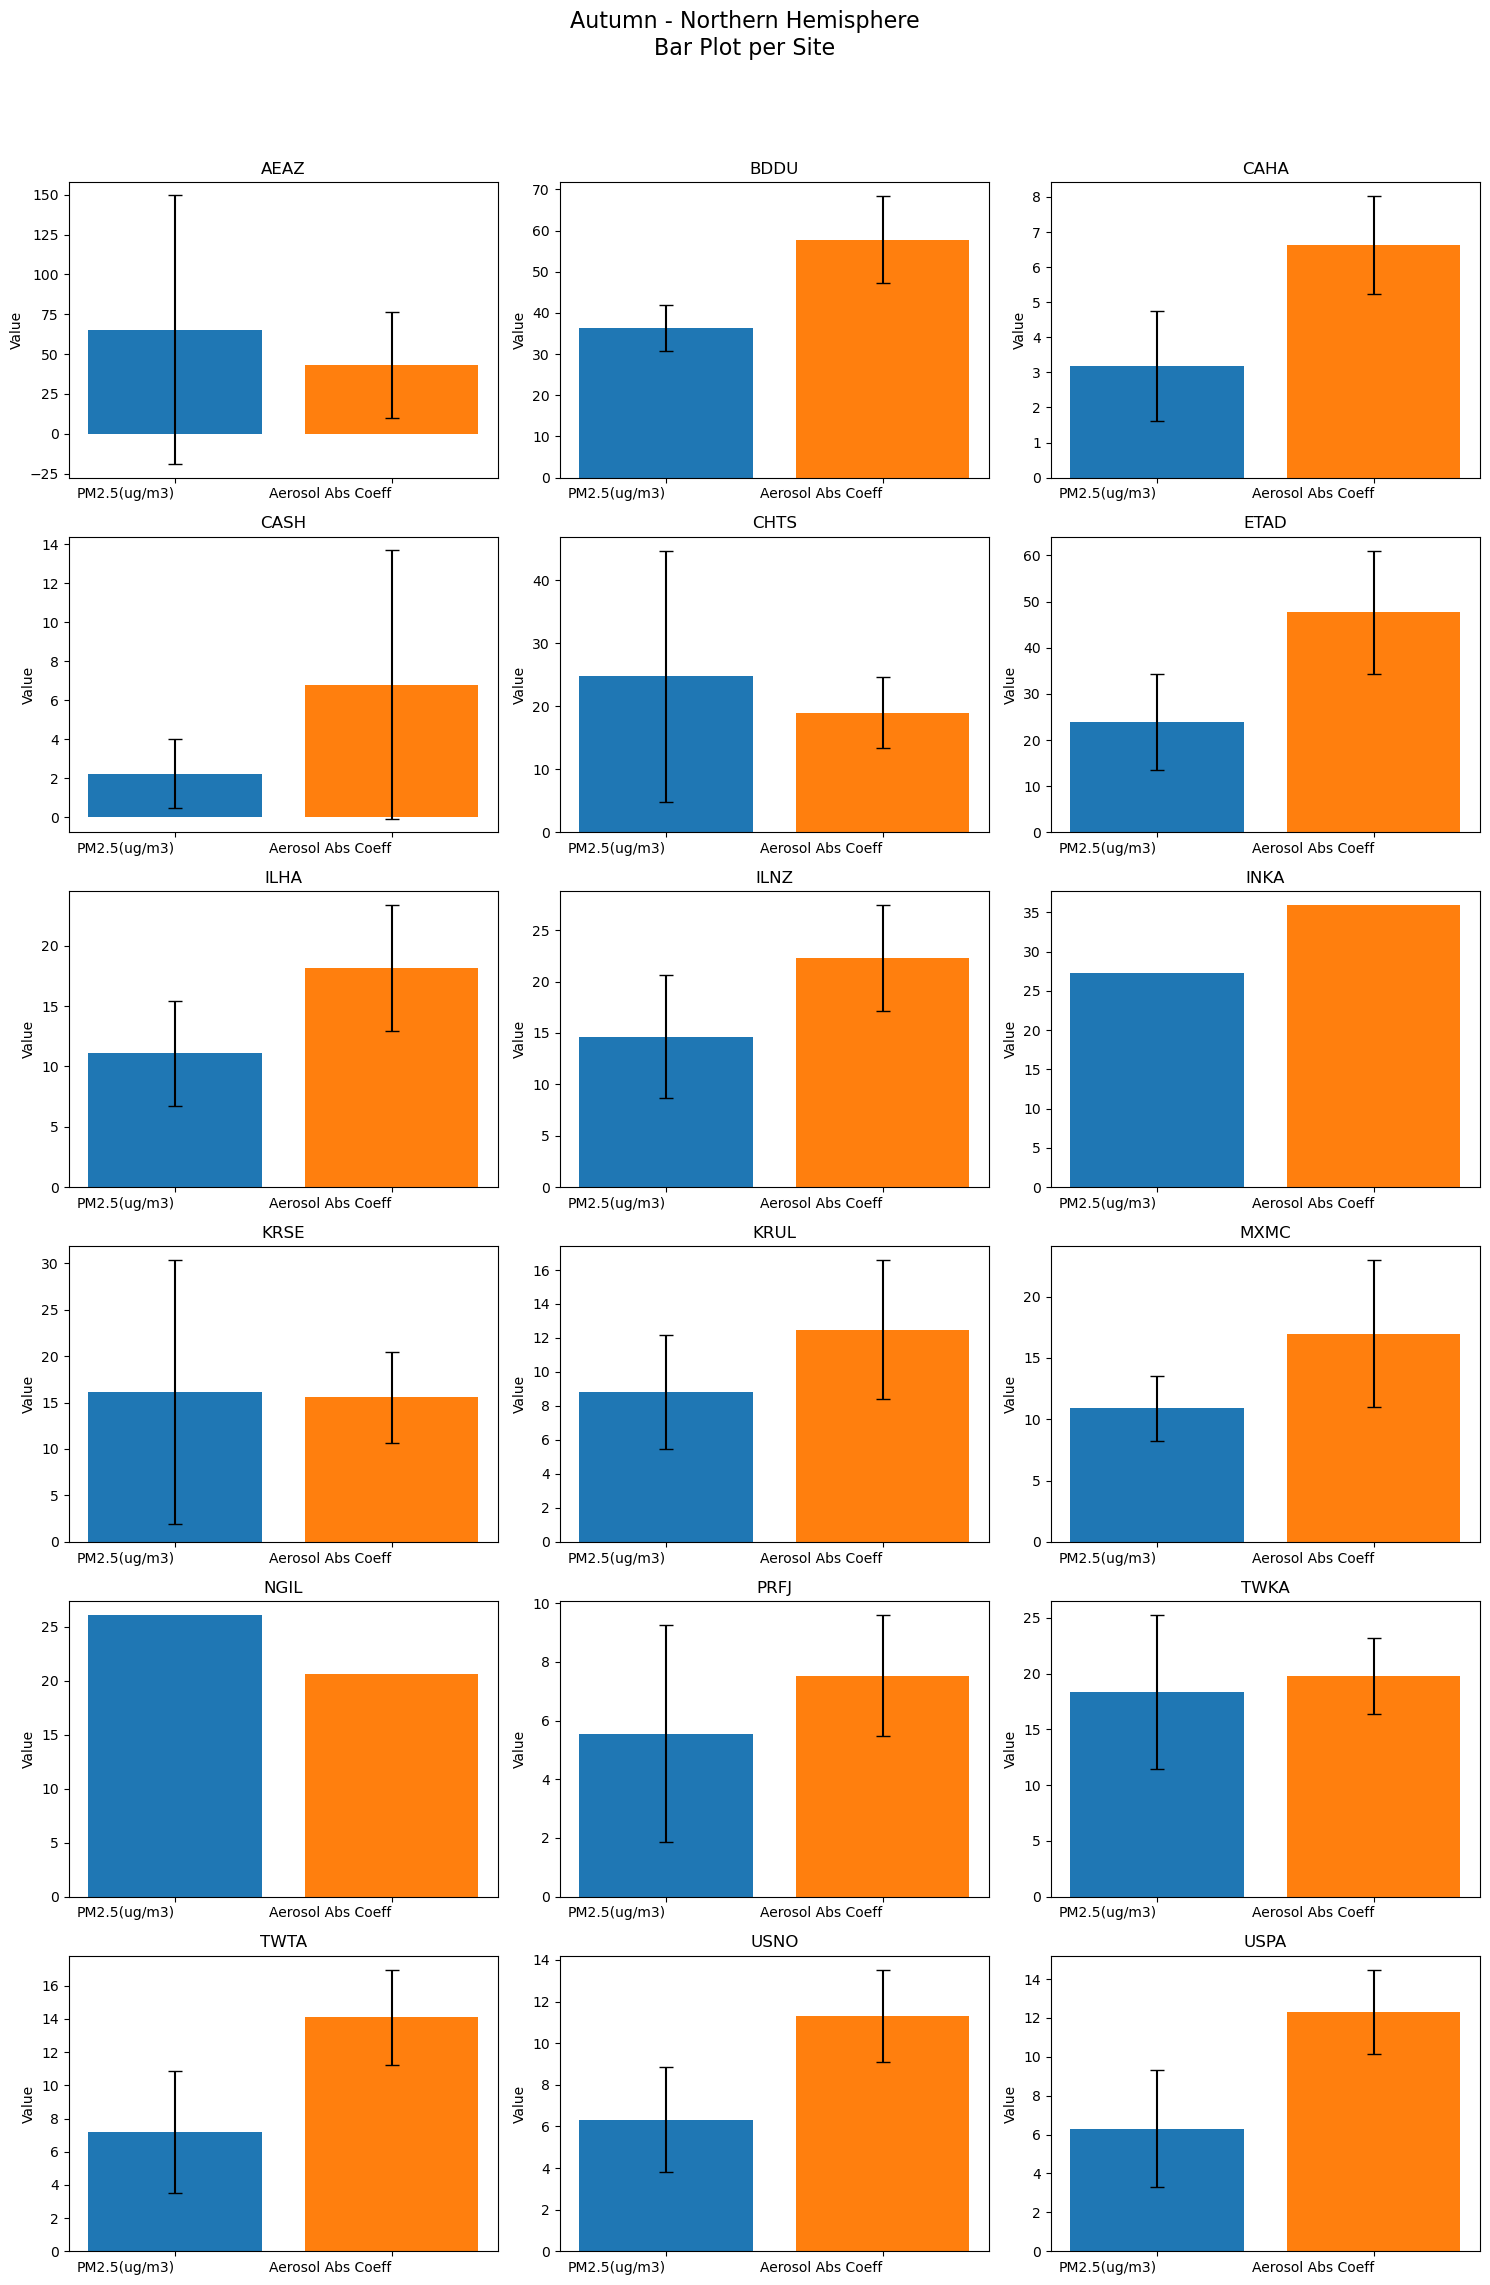

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Choose filters
season_filter = 'Autumn'
hemisphere_filter = 'northern'

# STEP 2: Filter the DataFrame
filtered_df = pm25_df[
    (pm25_df['Season'] == season_filter) &
    (pm25_df['Hemisphere'] == hemisphere_filter)
]

# STEP 3: Group by Site
metrics = ['PM2.5(ug/m3)', 'b_abs_lambda']
grouped = filtered_df.groupby('Site')

# How many sites?
sites = list(grouped.groups.keys())
n_sites = len(sites)

# Layout: automatic rows & cols for subplots
n_cols = 3
n_rows = (n_sites + n_cols - 1) // n_cols

# STEP 4: Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# STEP 5: Plot each site in its own subplot
for idx, site in enumerate(sites):
    row, col = divmod(idx, n_cols)
    ax = axes[row][col]
    
    data = grouped.get_group(site)
    means = data[metrics].mean()
    errors = data[metrics].std()

    ax.bar(metrics, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax.set_title(site)
    ax.set_ylabel('Value')
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(['PM2.5(ug/m3)', 'Aerosol Abs Coeff'], ha='right')

# Hide any empty subplots
for idx in range(n_sites, n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row][col].axis('off')

# Final layout
fig.suptitle(f'{season_filter} - {hemisphere_filter.capitalize()} Hemisphere\nBar Plot per Site', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

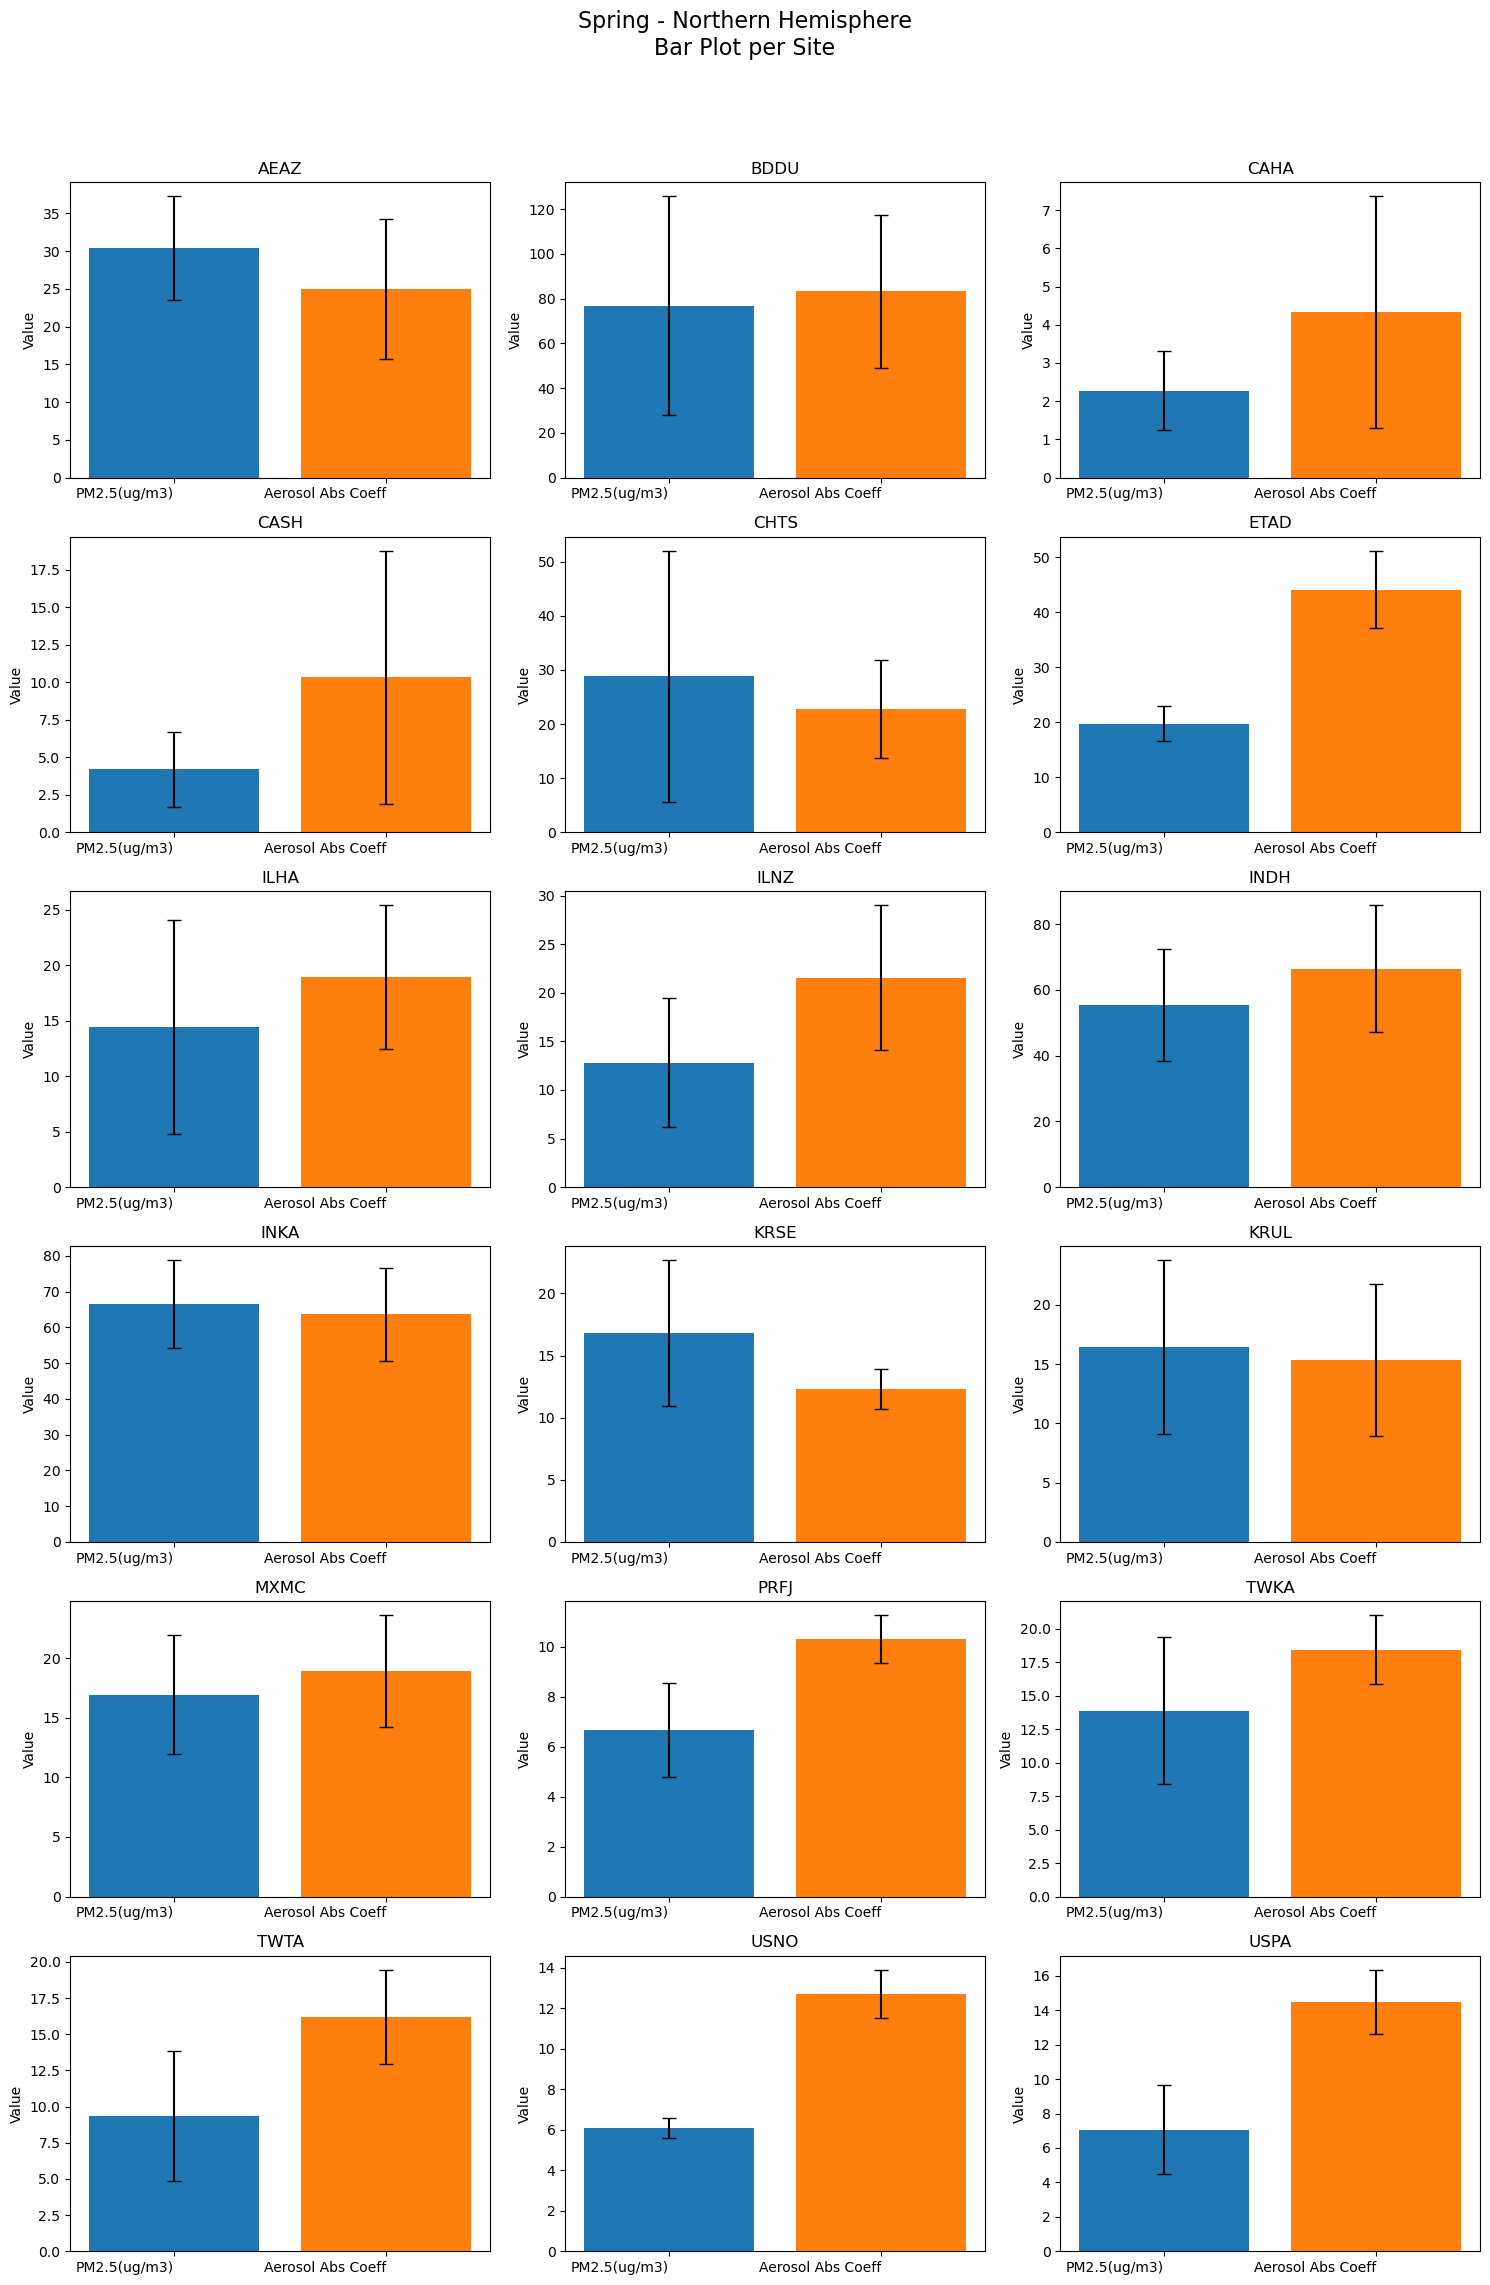

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Choose filters
season_filter = 'Spring'
hemisphere_filter = 'northern'

# STEP 2: Filter the DataFrame
filtered_df = pm25_df[
    (pm25_df['Season'] == season_filter) &
    (pm25_df['Hemisphere'] == hemisphere_filter)
]

# STEP 3: Group by Site
metrics = ['PM2.5(ug/m3)', 'b_abs_lambda']
grouped = filtered_df.groupby('Site')

# How many sites?
sites = list(grouped.groups.keys())
n_sites = len(sites)

# Layout: automatic rows & cols for subplots
n_cols = 3
n_rows = (n_sites + n_cols - 1) // n_cols

# STEP 4: Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# STEP 5: Plot each site in its own subplot
for idx, site in enumerate(sites):
    row, col = divmod(idx, n_cols)
    ax = axes[row][col]
    
    data = grouped.get_group(site)
    means = data[metrics].mean()
    errors = data[metrics].std()

    ax.bar(metrics, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax.set_title(site)
    ax.set_ylabel('Value')
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(['PM2.5(ug/m3)', 'Aerosol Abs Coeff'], ha='right')

# Hide any empty subplots
for idx in range(n_sites, n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row][col].axis('off')

# Final layout
fig.suptitle(f'{season_filter} - {hemisphere_filter.capitalize()} Hemisphere\nBar Plot per Site', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

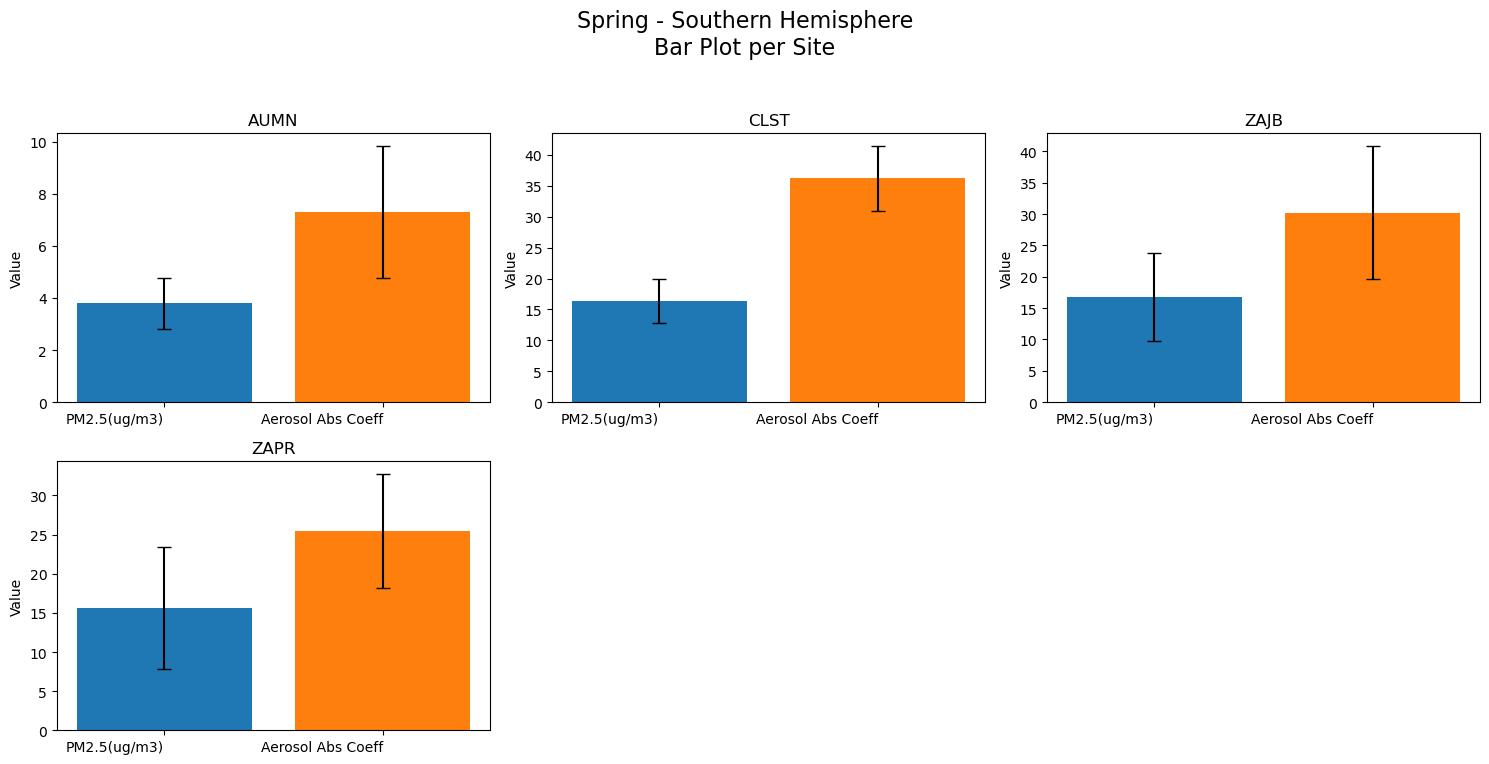

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Choose filters
season_filter = 'Spring'
hemisphere_filter = 'southern'

# STEP 2: Filter the DataFrame
filtered_df = pm25_df[
    (pm25_df['Season'] == season_filter) &
    (pm25_df['Hemisphere'] == hemisphere_filter)
]

# STEP 3: Group by Site
metrics = ['PM2.5(ug/m3)', 'b_abs_lambda']
grouped = filtered_df.groupby('Site')

# How many sites?
sites = list(grouped.groups.keys())
n_sites = len(sites)

# Layout: automatic rows & cols for subplots
n_cols = 3
n_rows = (n_sites + n_cols - 1) // n_cols

# STEP 4: Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# STEP 5: Plot each site in its own subplot
for idx, site in enumerate(sites):
    row, col = divmod(idx, n_cols)
    ax = axes[row][col]
    
    data = grouped.get_group(site)
    means = data[metrics].mean()
    errors = data[metrics].std()

    ax.bar(metrics, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax.set_title(site)
    ax.set_ylabel('Value')
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(['PM2.5(ug/m3)', 'Aerosol Abs Coeff'], ha='right')

# Hide any empty subplots
for idx in range(n_sites, n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row][col].axis('off')

# Final layout
fig.suptitle(f'{season_filter} - {hemisphere_filter.capitalize()} Hemisphere\nBar Plot per Site', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

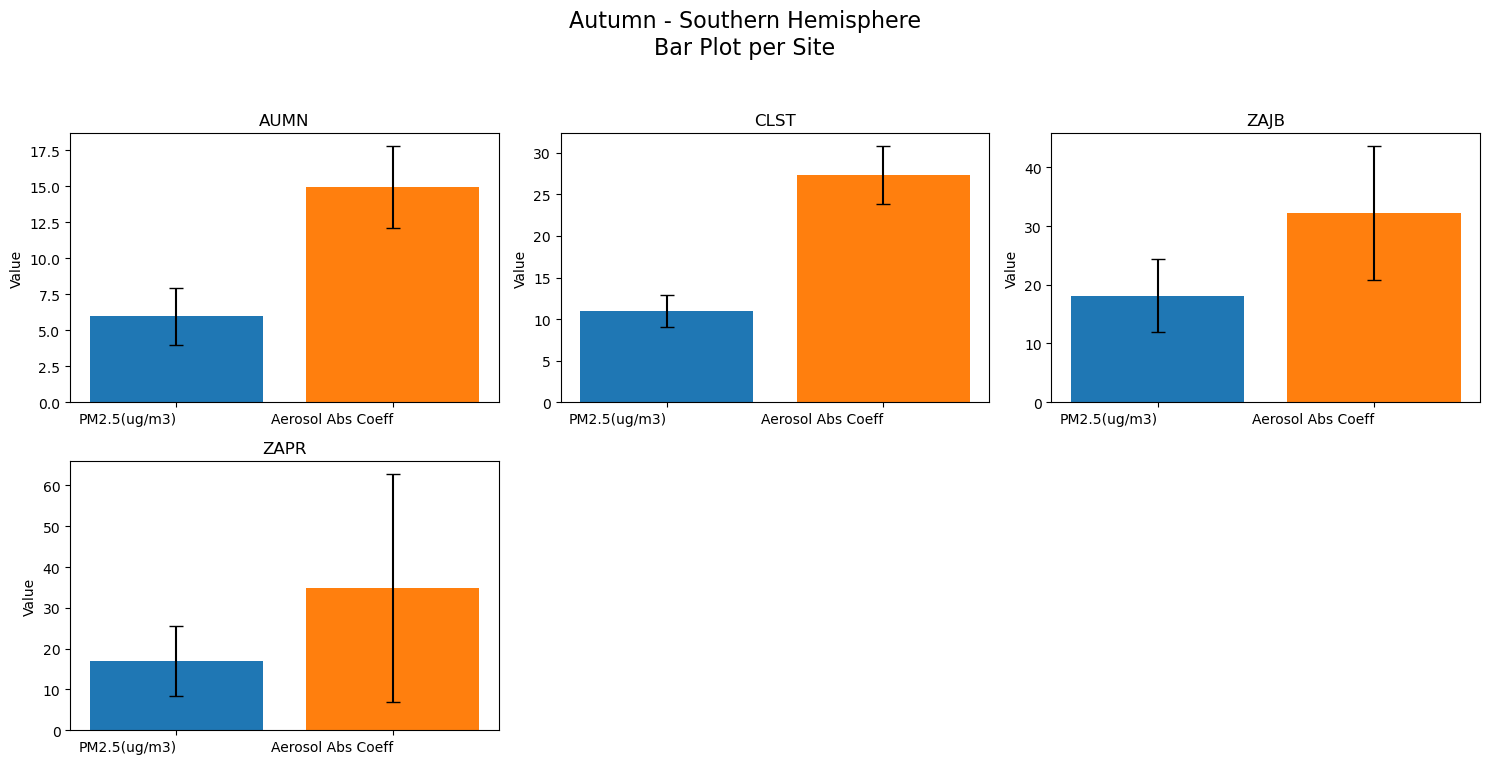

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Choose filters
season_filter = 'Autumn'
hemisphere_filter = 'southern'

# STEP 2: Filter the DataFrame
filtered_df = pm25_df[
    (pm25_df['Season'] == season_filter) &
    (pm25_df['Hemisphere'] == hemisphere_filter)
]

# STEP 3: Group by Site
metrics = ['PM2.5(ug/m3)', 'b_abs_lambda']
grouped = filtered_df.groupby('Site')

# How many sites?
sites = list(grouped.groups.keys())
n_sites = len(sites)

# Layout: automatic rows & cols for subplots
n_cols = 3
n_rows = (n_sites + n_cols - 1) // n_cols

# STEP 4: Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# STEP 5: Plot each site in its own subplot
for idx, site in enumerate(sites):
    row, col = divmod(idx, n_cols)
    ax = axes[row][col]
    
    data = grouped.get_group(site)
    means = data[metrics].mean()
    errors = data[metrics].std()

    ax.bar(metrics, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax.set_title(site)
    ax.set_ylabel('Value')
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(['PM2.5(ug/m3)', 'Aerosol Abs Coeff'], ha='right')

# Hide any empty subplots
for idx in range(n_sites, n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row][col].axis('off')

# Final layout
fig.suptitle(f'{season_filter} - {hemisphere_filter.capitalize()} Hemisphere\nBar Plot per Site', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

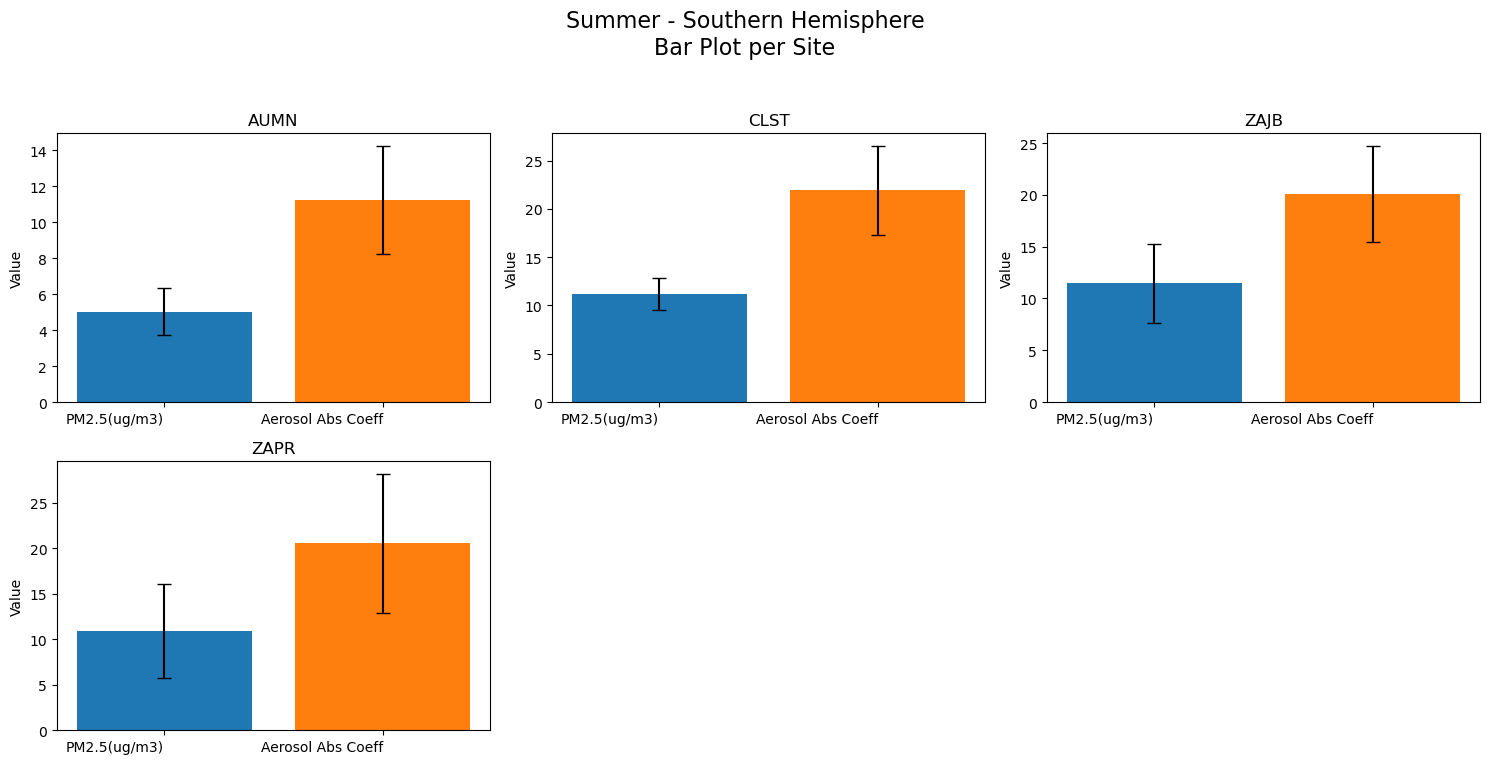

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Choose filters
season_filter = 'Summer'
hemisphere_filter = 'southern'

# STEP 2: Filter the DataFrame
filtered_df = pm25_df[
    (pm25_df['Season'] == season_filter) &
    (pm25_df['Hemisphere'] == hemisphere_filter)
]

# STEP 3: Group by Site
metrics = ['PM2.5(ug/m3)', 'b_abs_lambda']
grouped = filtered_df.groupby('Site')

# How many sites?
sites = list(grouped.groups.keys())
n_sites = len(sites)

# Layout: automatic rows & cols for subplots
n_cols = 3
n_rows = (n_sites + n_cols - 1) // n_cols

# STEP 4: Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# STEP 5: Plot each site in its own subplot
for idx, site in enumerate(sites):
    row, col = divmod(idx, n_cols)
    ax = axes[row][col]
    
    data = grouped.get_group(site)
    means = data[metrics].mean()
    errors = data[metrics].std()

    ax.bar(metrics, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax.set_title(site)
    ax.set_ylabel('Value')
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(['PM2.5(ug/m3)', 'Aerosol Abs Coeff'], ha='right')

# Hide any empty subplots
for idx in range(n_sites, n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row][col].axis('off')

# Final layout
fig.suptitle(f'{season_filter} - {hemisphere_filter.capitalize()} Hemisphere\nBar Plot per Site', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

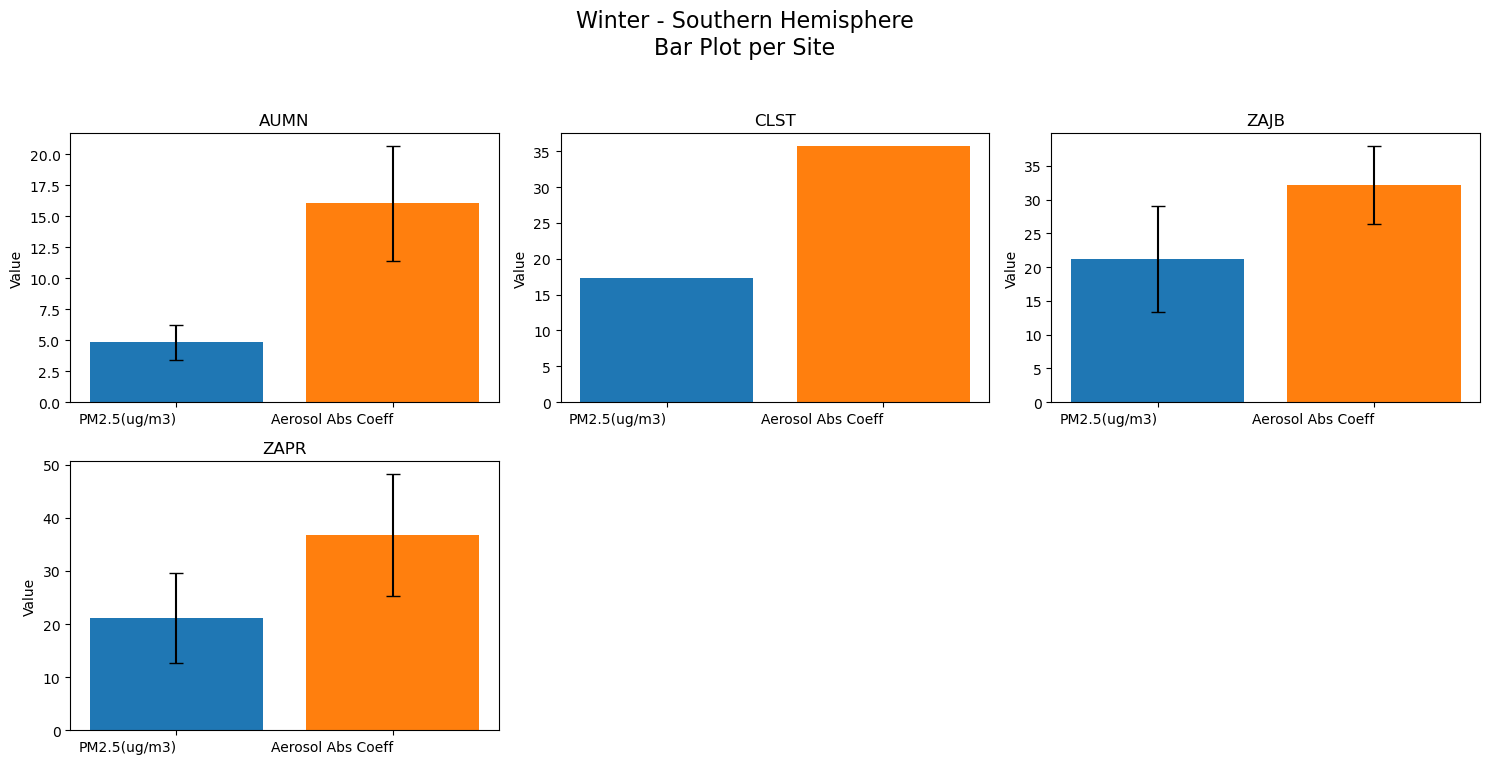

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Choose filters
season_filter = 'Winter'
hemisphere_filter = 'southern'

# STEP 2: Filter the DataFrame
filtered_df = pm25_df[
    (pm25_df['Season'] == season_filter) &
    (pm25_df['Hemisphere'] == hemisphere_filter)
]

# STEP 3: Group by Site
metrics = ['PM2.5(ug/m3)', 'b_abs_lambda']
grouped = filtered_df.groupby('Site')

# How many sites?
sites = list(grouped.groups.keys())
n_sites = len(sites)

# Layout: automatic rows & cols for subplots
n_cols = 3
n_rows = (n_sites + n_cols - 1) // n_cols

# STEP 4: Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# STEP 5: Plot each site in its own subplot
for idx, site in enumerate(sites):
    row, col = divmod(idx, n_cols)
    ax = axes[row][col]
    
    data = grouped.get_group(site)
    means = data[metrics].mean()
    errors = data[metrics].std()

    ax.bar(metrics, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax.set_title(site)
    ax.set_ylabel('Value')
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(['PM2.5(ug/m3)', 'Aerosol Abs Coeff'], ha='right')

# Hide any empty subplots
for idx in range(n_sites, n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row][col].axis('off')

# Final layout
fig.suptitle(f'{season_filter} - {hemisphere_filter.capitalize()} Hemisphere\nBar Plot per Site', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

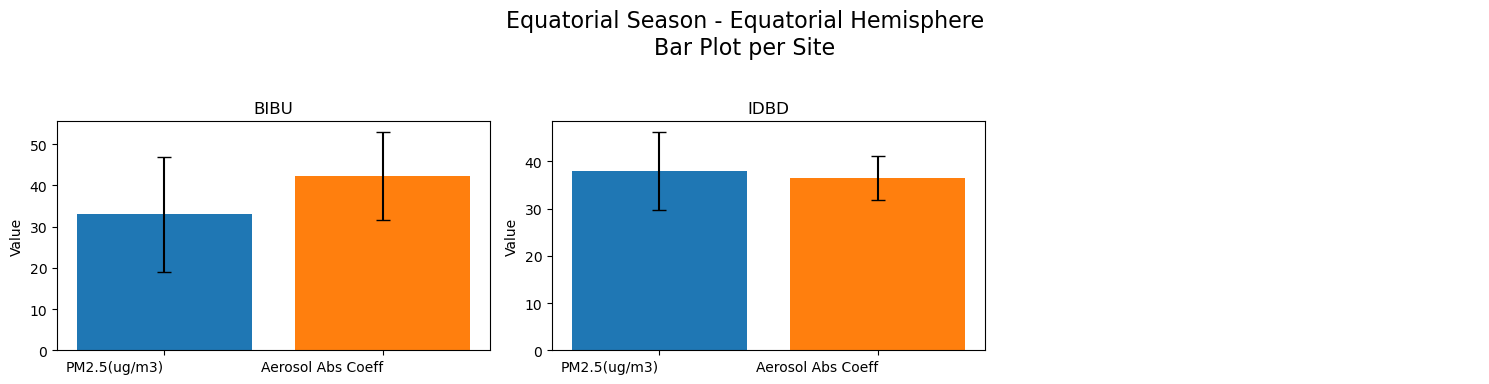

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Choose filters
season_filter = 'Equatorial Season'
hemisphere_filter = 'equatorial'

# STEP 2: Filter the DataFrame
filtered_df = pm25_df[
    (pm25_df['Season'] == season_filter) &
    (pm25_df['Hemisphere'] == hemisphere_filter)
]

# STEP 3: Group by Site
metrics = ['PM2.5(ug/m3)', 'b_abs_lambda']
grouped = filtered_df.groupby('Site')

# How many sites?
sites = list(grouped.groups.keys())
n_sites = len(sites)

# Layout: automatic rows & cols for subplots
n_cols = 3
n_rows = (n_sites + n_cols - 1) // n_cols

# STEP 4: Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# STEP 5: Plot each site in its own subplot
for idx, site in enumerate(sites):
    row, col = divmod(idx, n_cols)
    ax = axes[row][col]
    
    data = grouped.get_group(site)
    means = data[metrics].mean()
    errors = data[metrics].std()

    ax.bar(metrics, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax.set_title(site)
    ax.set_ylabel('Value')
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(['PM2.5(ug/m3)', 'Aerosol Abs Coeff'], ha='right')

# Hide any empty subplots
for idx in range(n_sites, n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row][col].axis('off')

# Final layout
fig.suptitle(f'{season_filter} - {hemisphere_filter.capitalize()} Hemisphere\nBar Plot per Site', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Absorption fraction

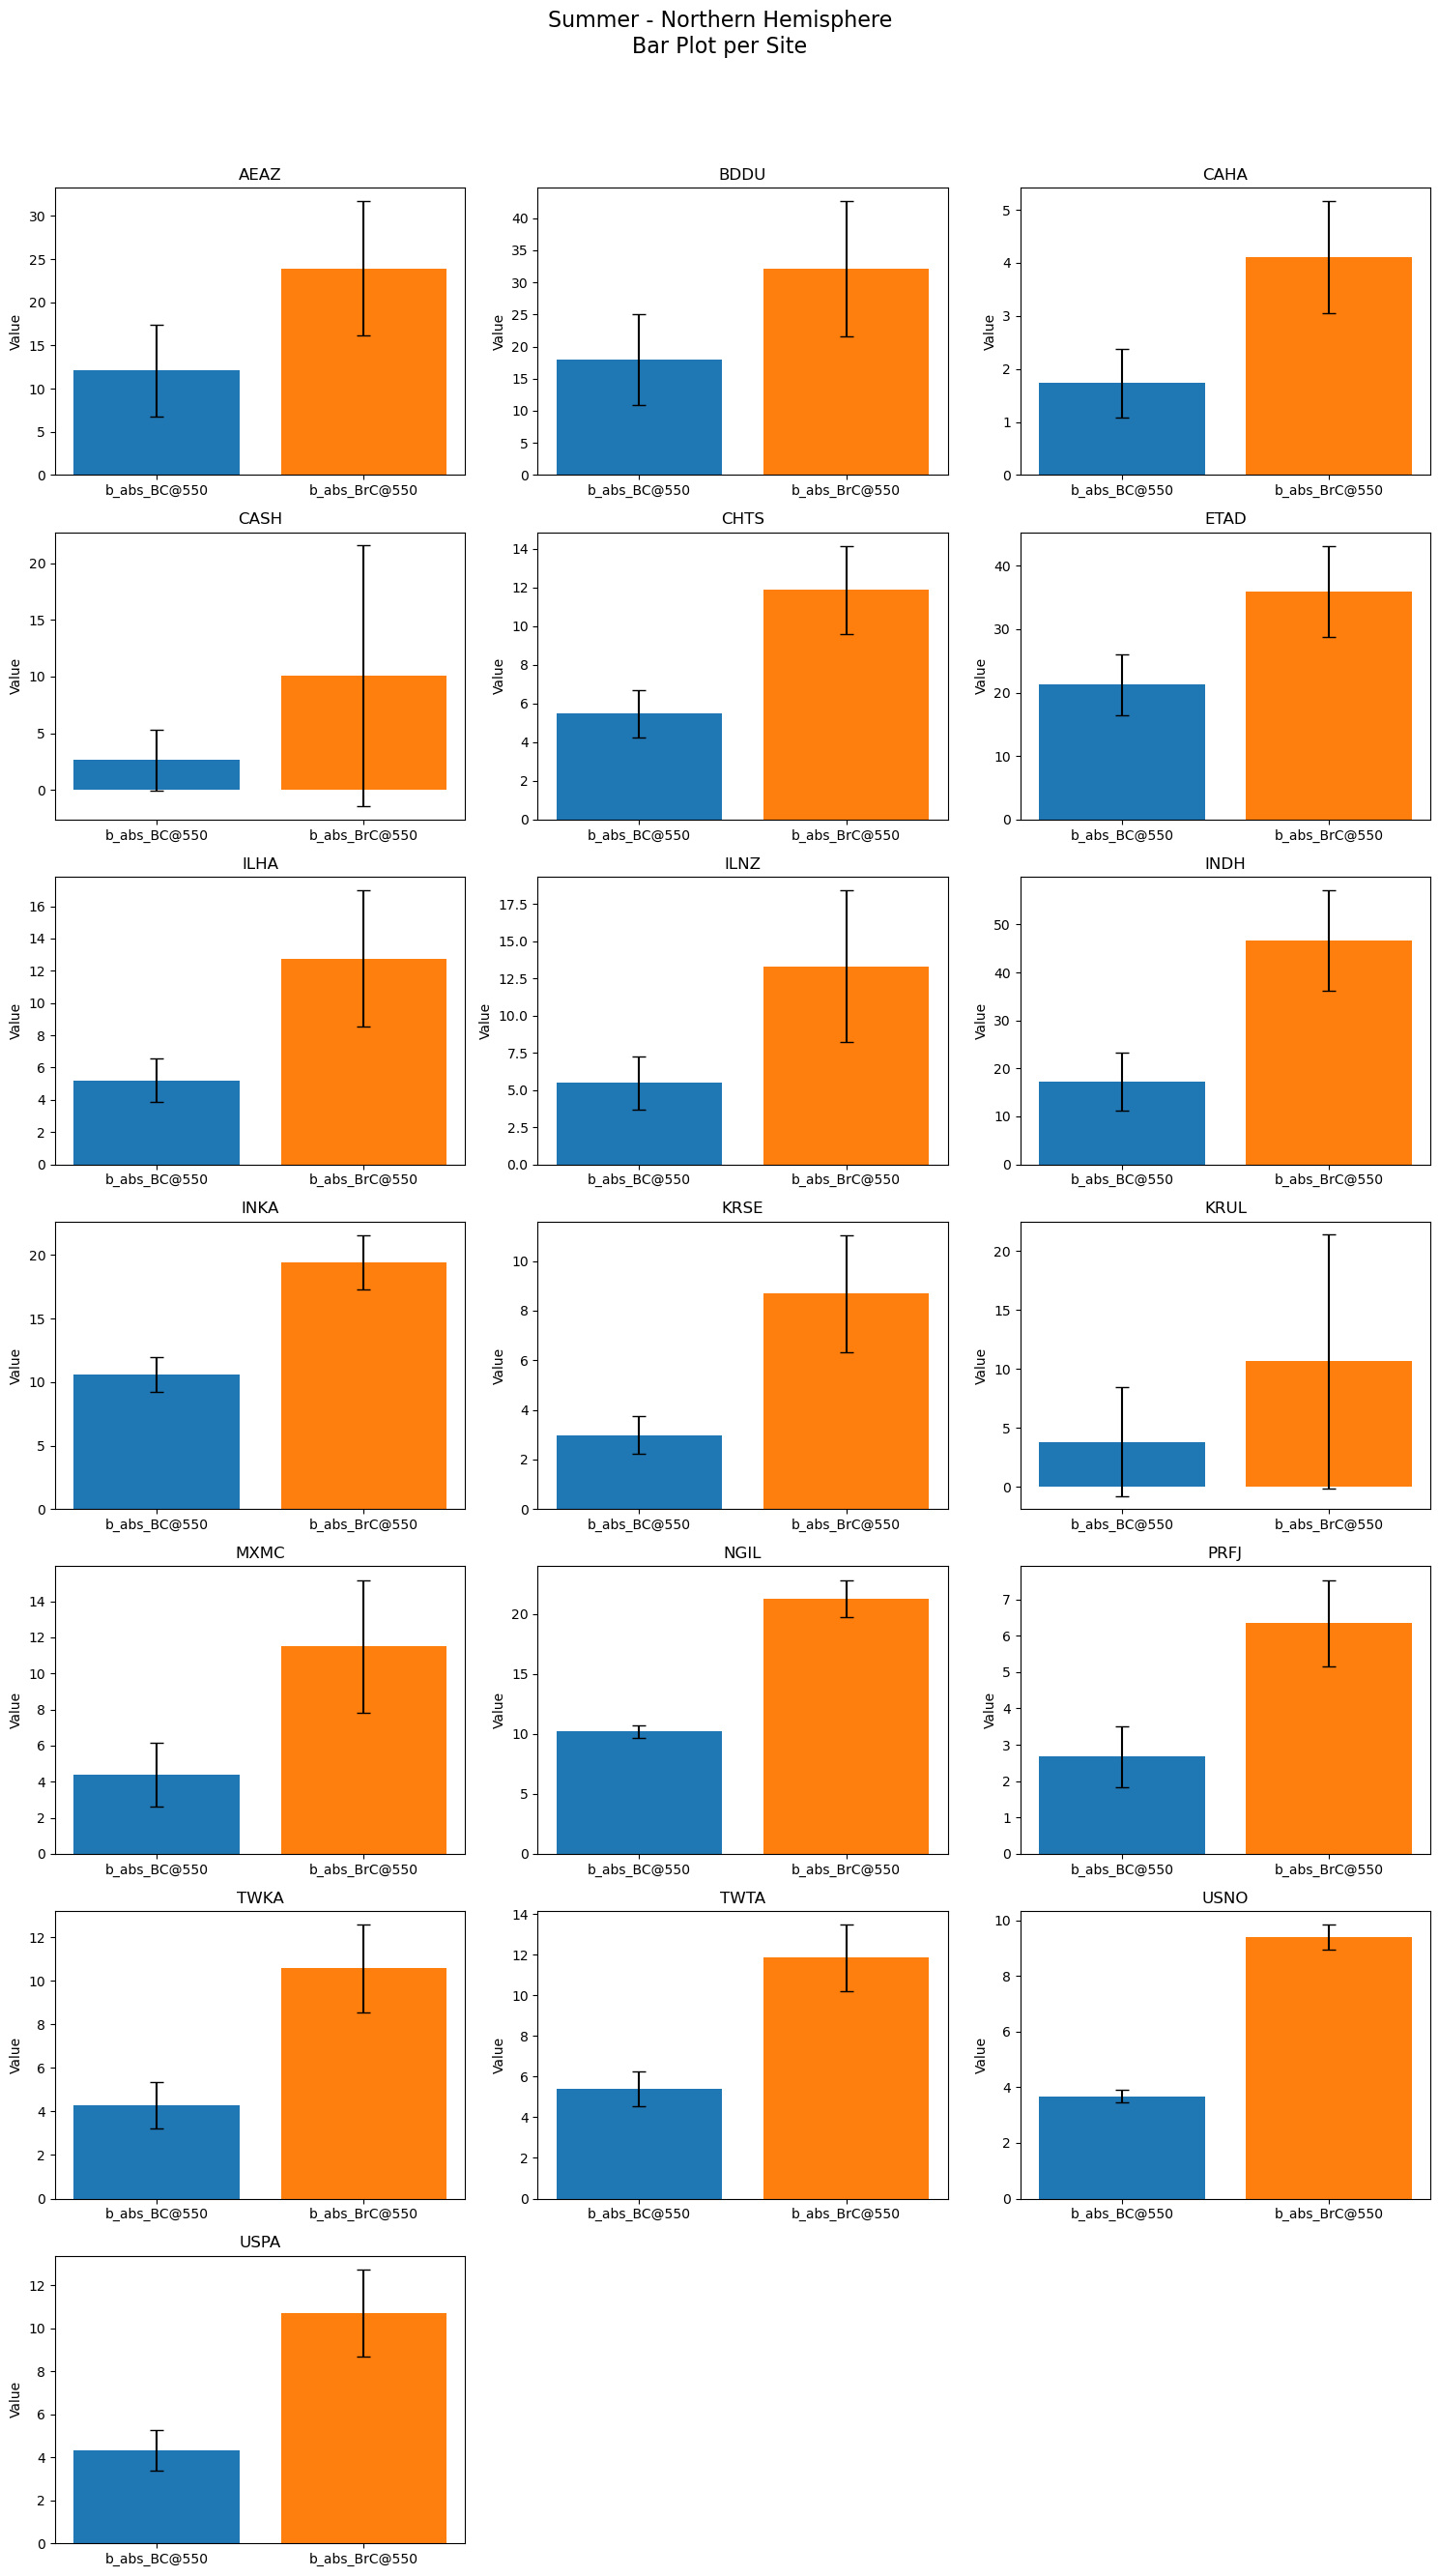

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Choose filters
season_filter = 'Summer'
hemisphere_filter = 'northern'

# STEP 2: Filter the DataFrame
filtered_df = pm25_df[
    (pm25_df['Season'] == season_filter) &
    (pm25_df['Hemisphere'] == hemisphere_filter)
]

# STEP 3: Group by Site
metrics = ['b_abs_BC@550', 'b_abs_BrC@550']
grouped = filtered_df.groupby('Site')

# How many sites?
sites = list(grouped.groups.keys())
n_sites = len(sites)

# Layout: automatic rows & cols for subplots
n_cols = 3
n_rows = (n_sites + n_cols - 1) // n_cols

# STEP 4: Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# STEP 5: Plot each site in its own subplot
for idx, site in enumerate(sites):
    row, col = divmod(idx, n_cols)
    ax = axes[row][col]
    
    data = grouped.get_group(site)
    means = data[metrics].mean()
    errors = data[metrics].std()

    ax.bar(metrics, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax.set_title(site)
    ax.set_ylabel('Value')
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(metrics, ha='center')

# Hide any empty subplots
for idx in range(n_sites, n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row][col].axis('off')

# Final layout
fig.suptitle(f'{season_filter} - {hemisphere_filter.capitalize()} Hemisphere\nBar Plot per Site', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

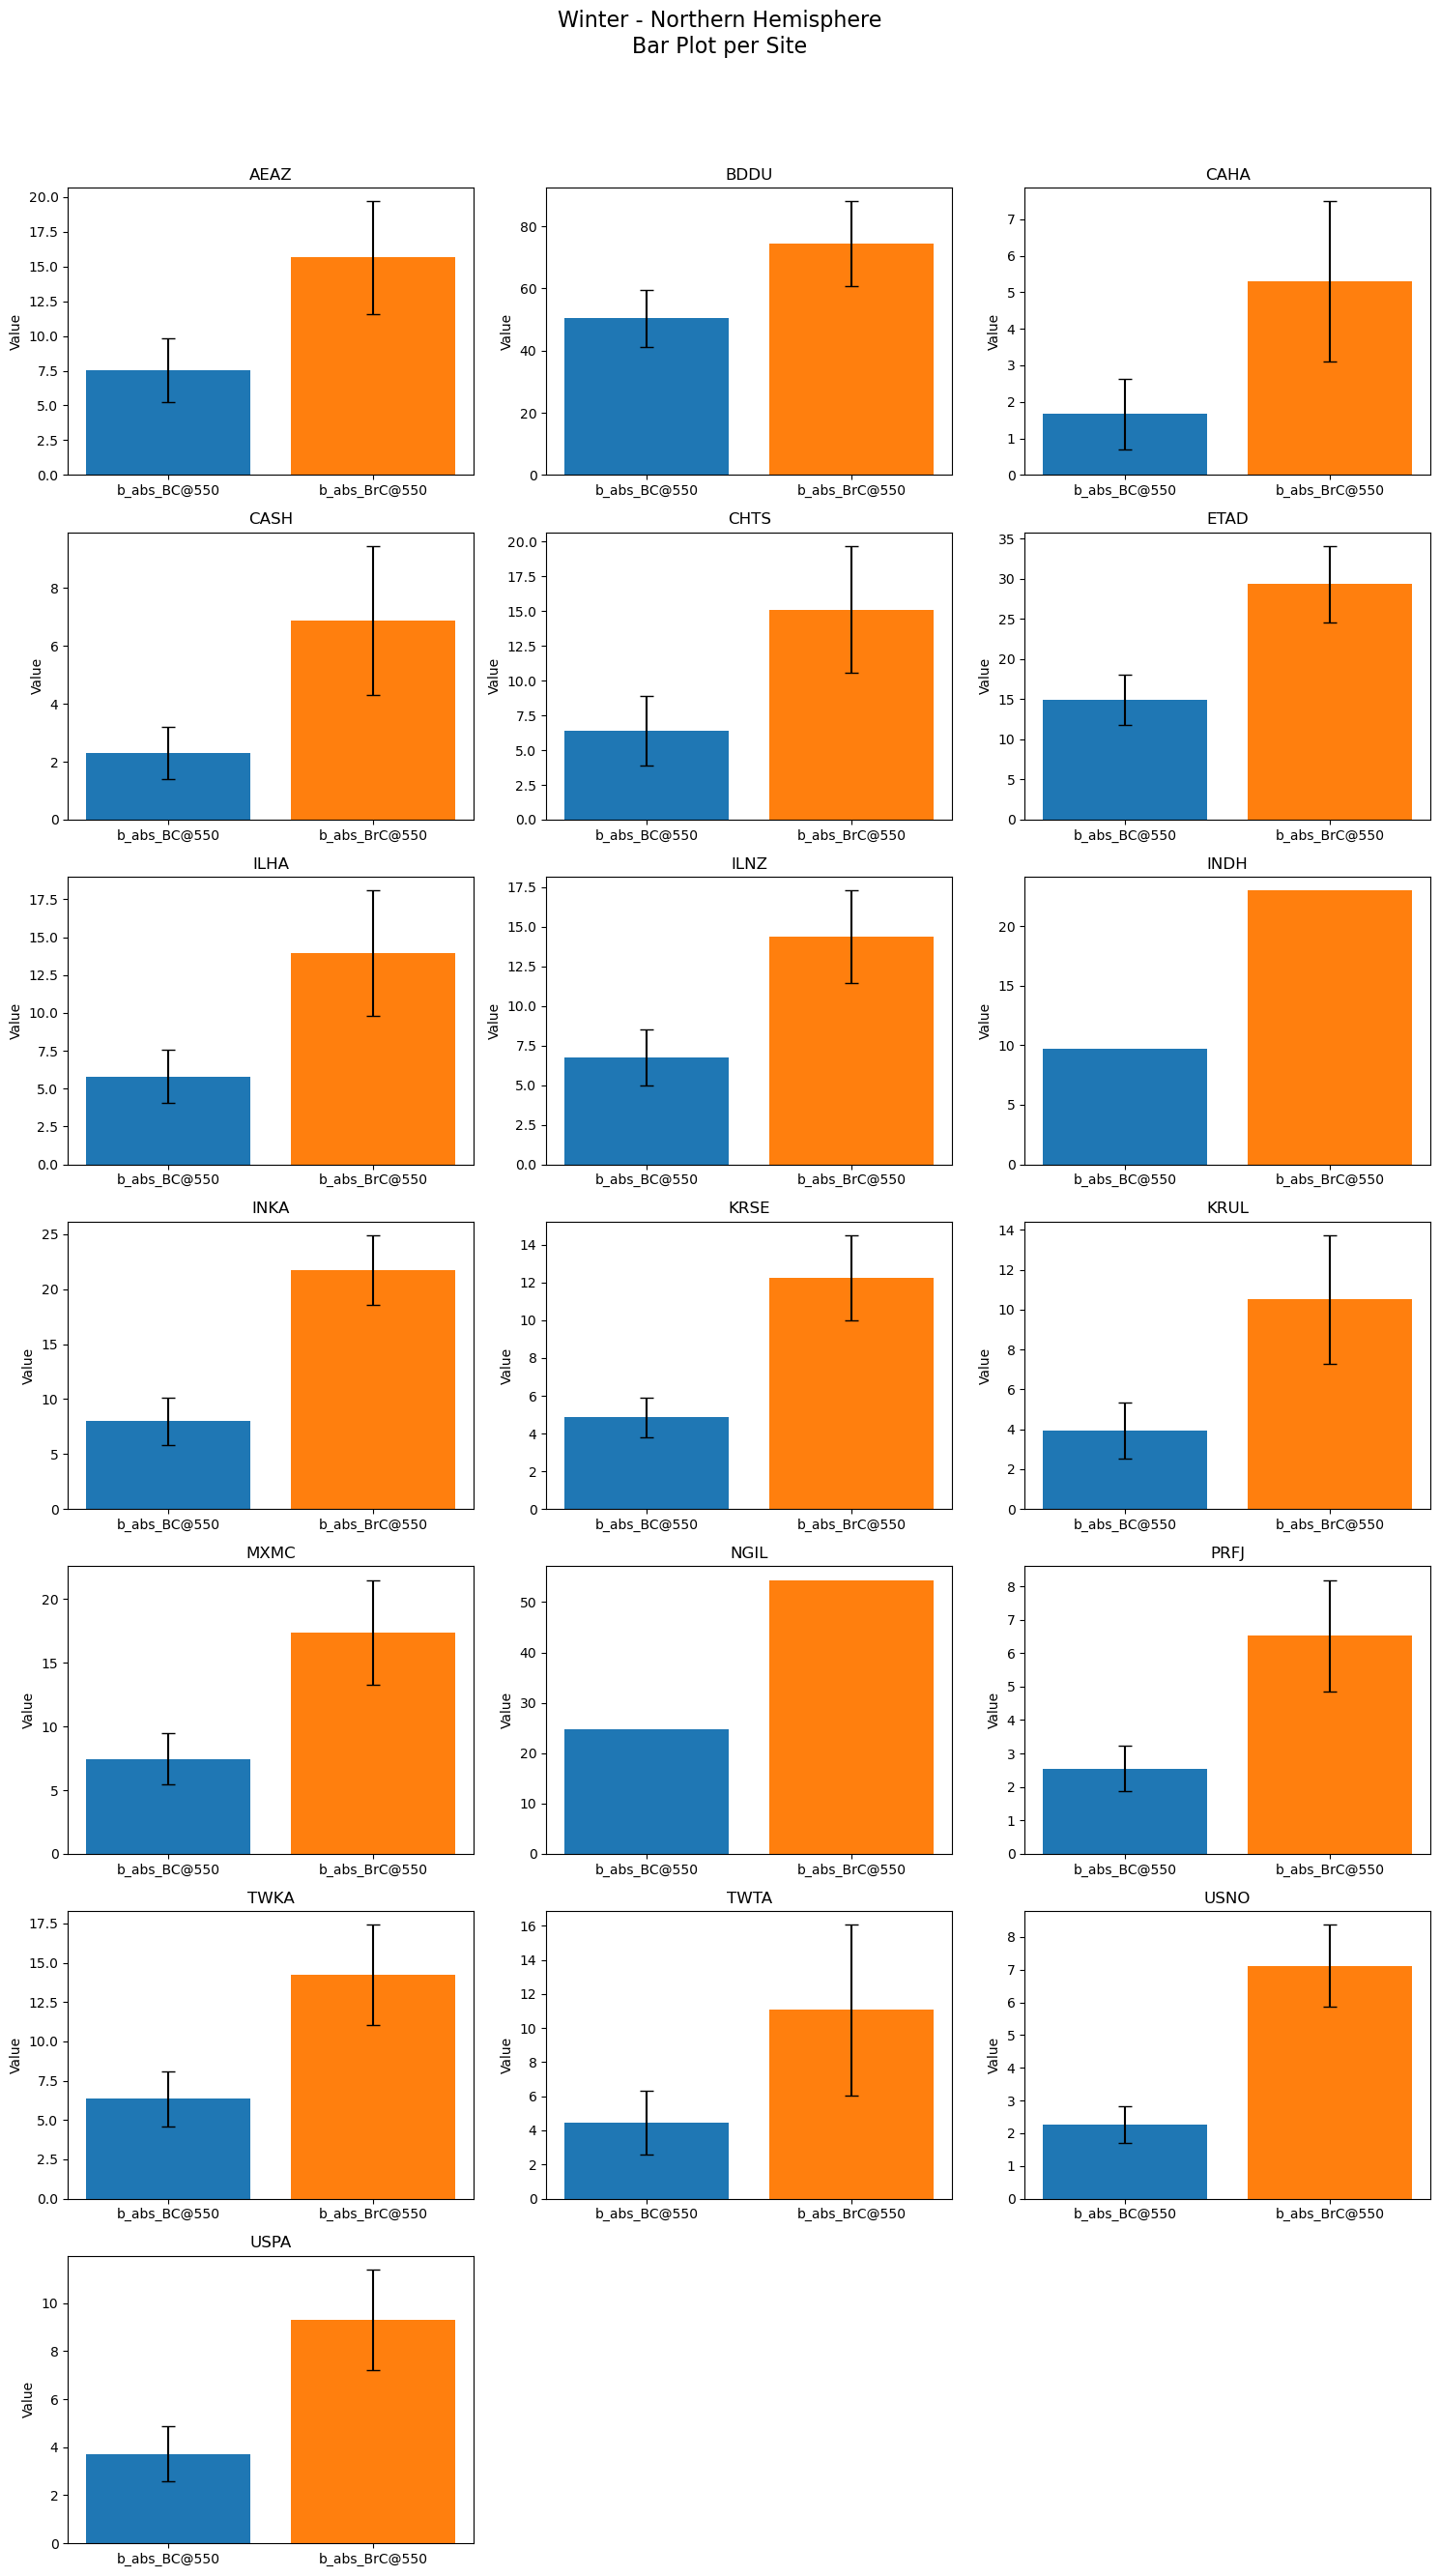

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Choose filters
season_filter = 'Winter'
hemisphere_filter = 'northern'

# STEP 2: Filter the DataFrame
filtered_df = pm25_df[
    (pm25_df['Season'] == season_filter) &
    (pm25_df['Hemisphere'] == hemisphere_filter)
]

# STEP 3: Group by Site
metrics = ['b_abs_BC@550', 'b_abs_BrC@550']
grouped = filtered_df.groupby('Site')

# How many sites?
sites = list(grouped.groups.keys())
n_sites = len(sites)

# Layout: automatic rows & cols for subplots
n_cols = 3
n_rows = (n_sites + n_cols - 1) // n_cols

# STEP 4: Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# STEP 5: Plot each site in its own subplot
for idx, site in enumerate(sites):
    row, col = divmod(idx, n_cols)
    ax = axes[row][col]
    
    data = grouped.get_group(site)
    means = data[metrics].mean()
    errors = data[metrics].std()

    ax.bar(metrics, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax.set_title(site)
    ax.set_ylabel('Value')
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(metrics, ha='center')

# Hide any empty subplots
for idx in range(n_sites, n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row][col].axis('off')

# Final layout
fig.suptitle(f'{season_filter} - {hemisphere_filter.capitalize()} Hemisphere\nBar Plot per Site', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

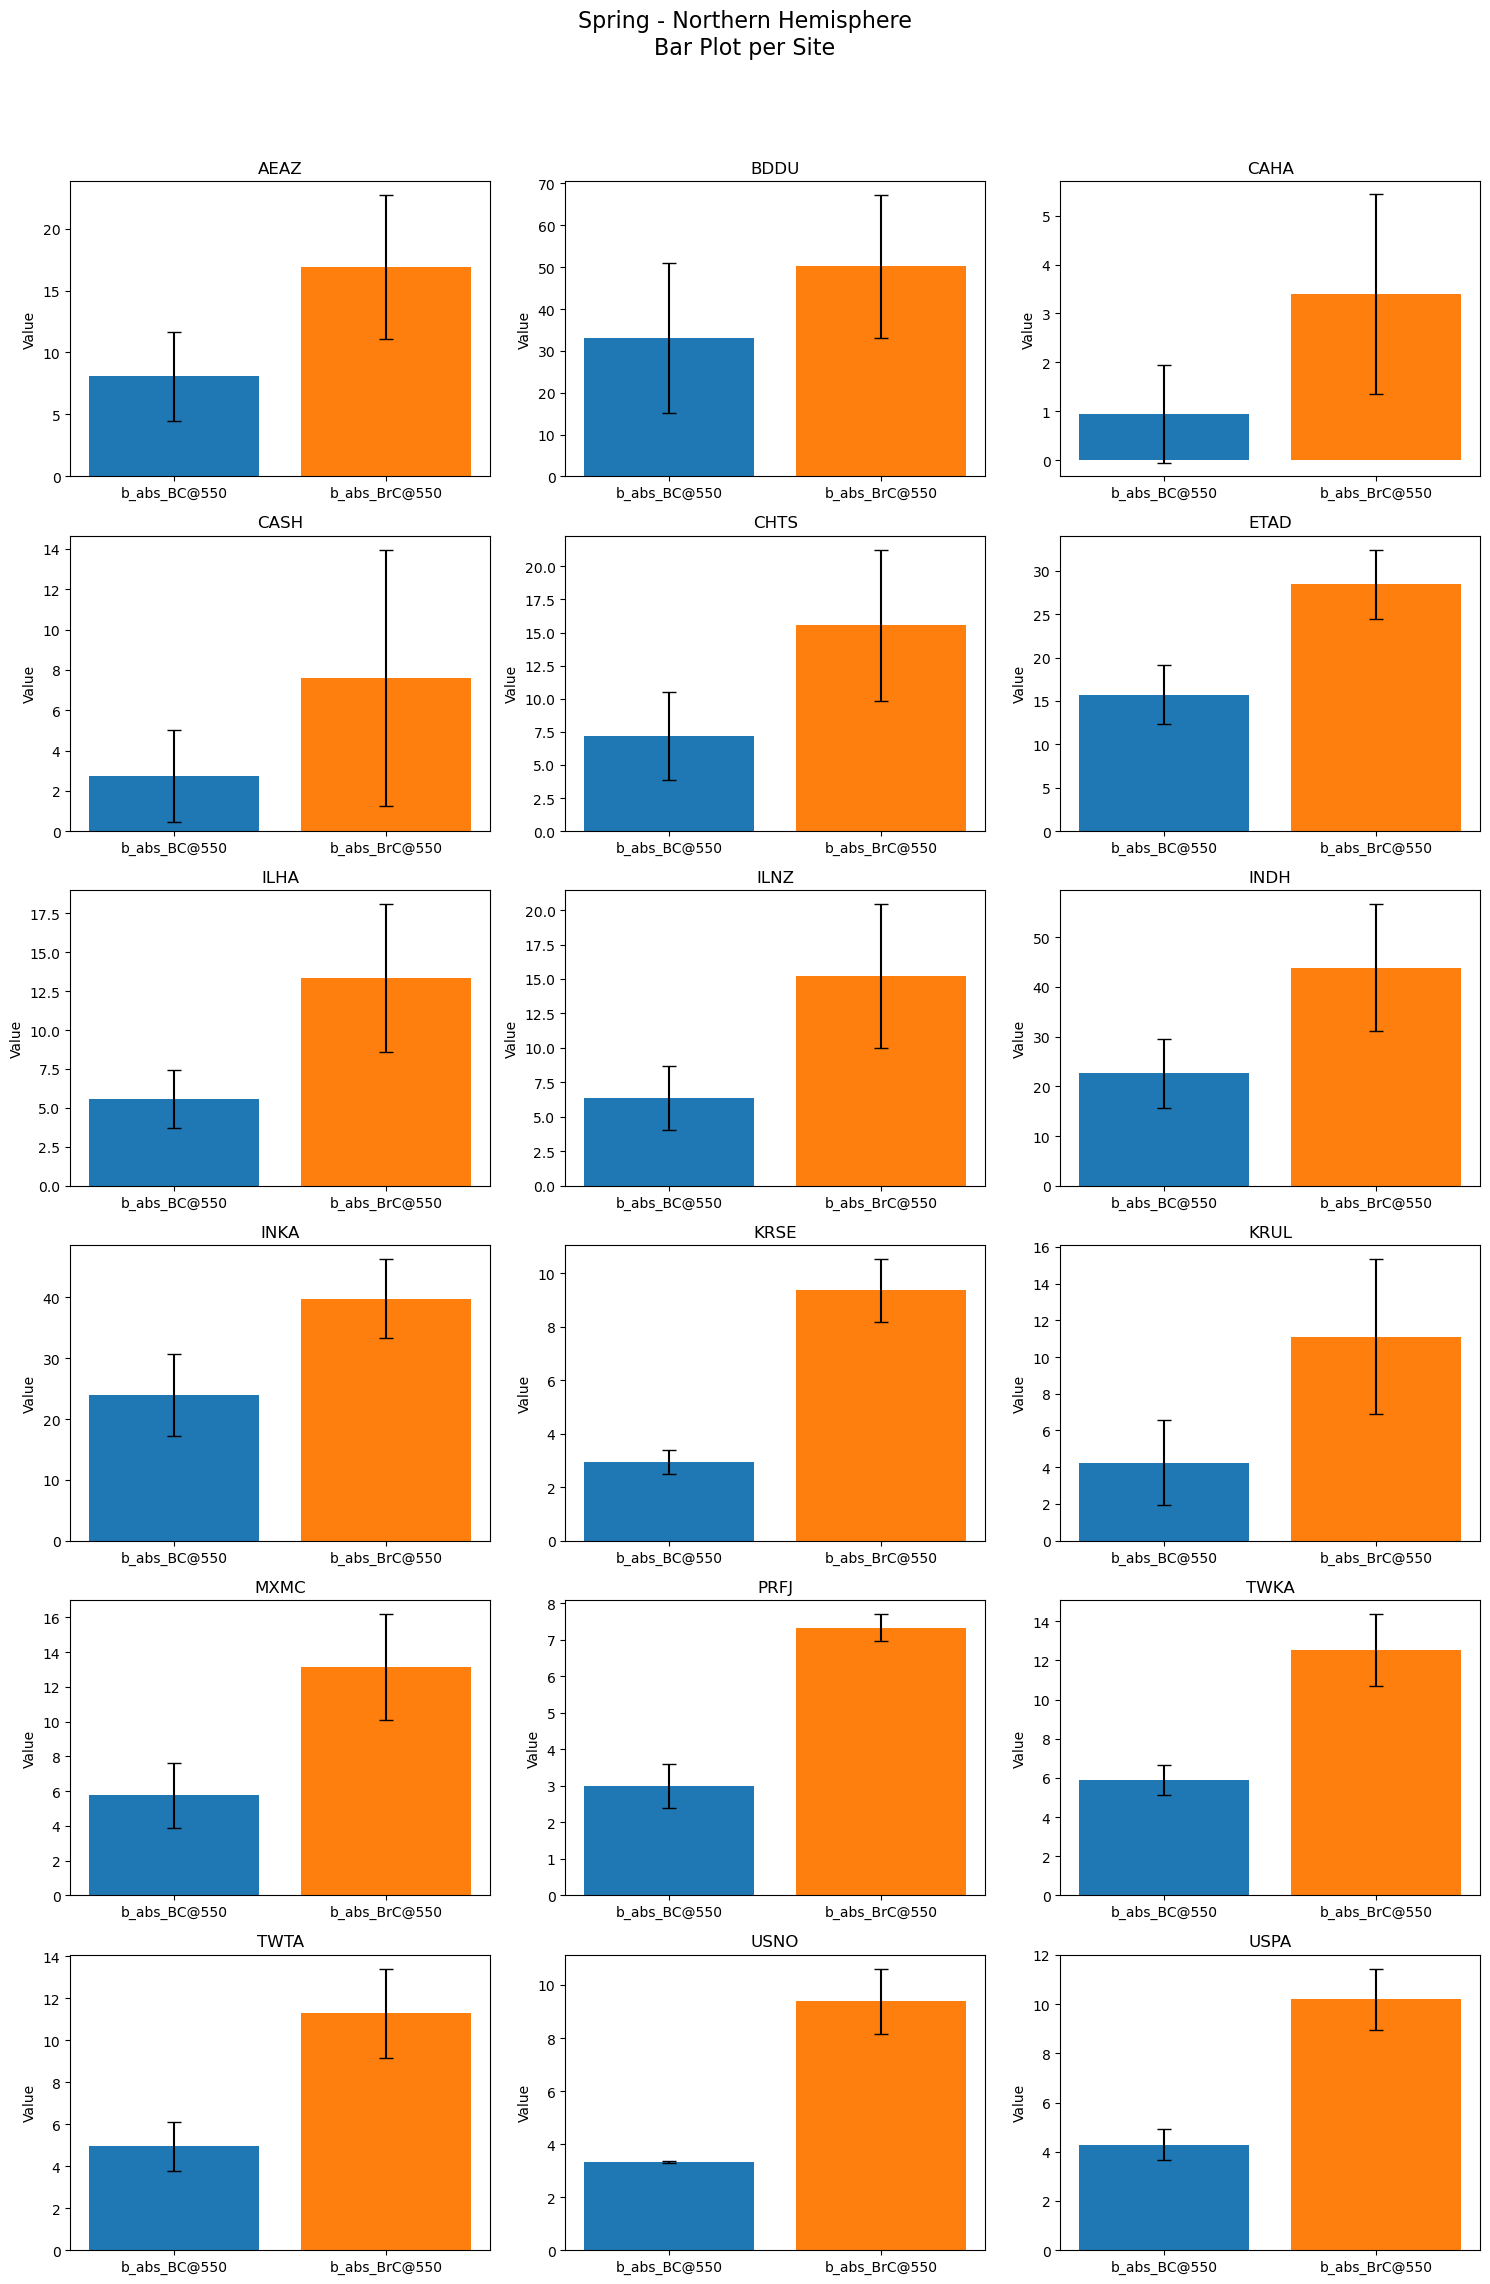

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Choose filters
season_filter = 'Spring'
hemisphere_filter = 'northern'

# STEP 2: Filter the DataFrame
filtered_df = pm25_df[
    (pm25_df['Season'] == season_filter) &
    (pm25_df['Hemisphere'] == hemisphere_filter)
]

# STEP 3: Group by Site
metrics = ['b_abs_BC@550', 'b_abs_BrC@550']
grouped = filtered_df.groupby('Site')

# How many sites?
sites = list(grouped.groups.keys())
n_sites = len(sites)

# Layout: automatic rows & cols for subplots
n_cols = 3
n_rows = (n_sites + n_cols - 1) // n_cols

# STEP 4: Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# STEP 5: Plot each site in its own subplot
for idx, site in enumerate(sites):
    row, col = divmod(idx, n_cols)
    ax = axes[row][col]
    
    data = grouped.get_group(site)
    means = data[metrics].mean()
    errors = data[metrics].std()

    ax.bar(metrics, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax.set_title(site)
    ax.set_ylabel('Value')
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(metrics, ha='center')

# Hide any empty subplots
for idx in range(n_sites, n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row][col].axis('off')

# Final layout
fig.suptitle(f'{season_filter} - {hemisphere_filter.capitalize()} Hemisphere\nBar Plot per Site', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

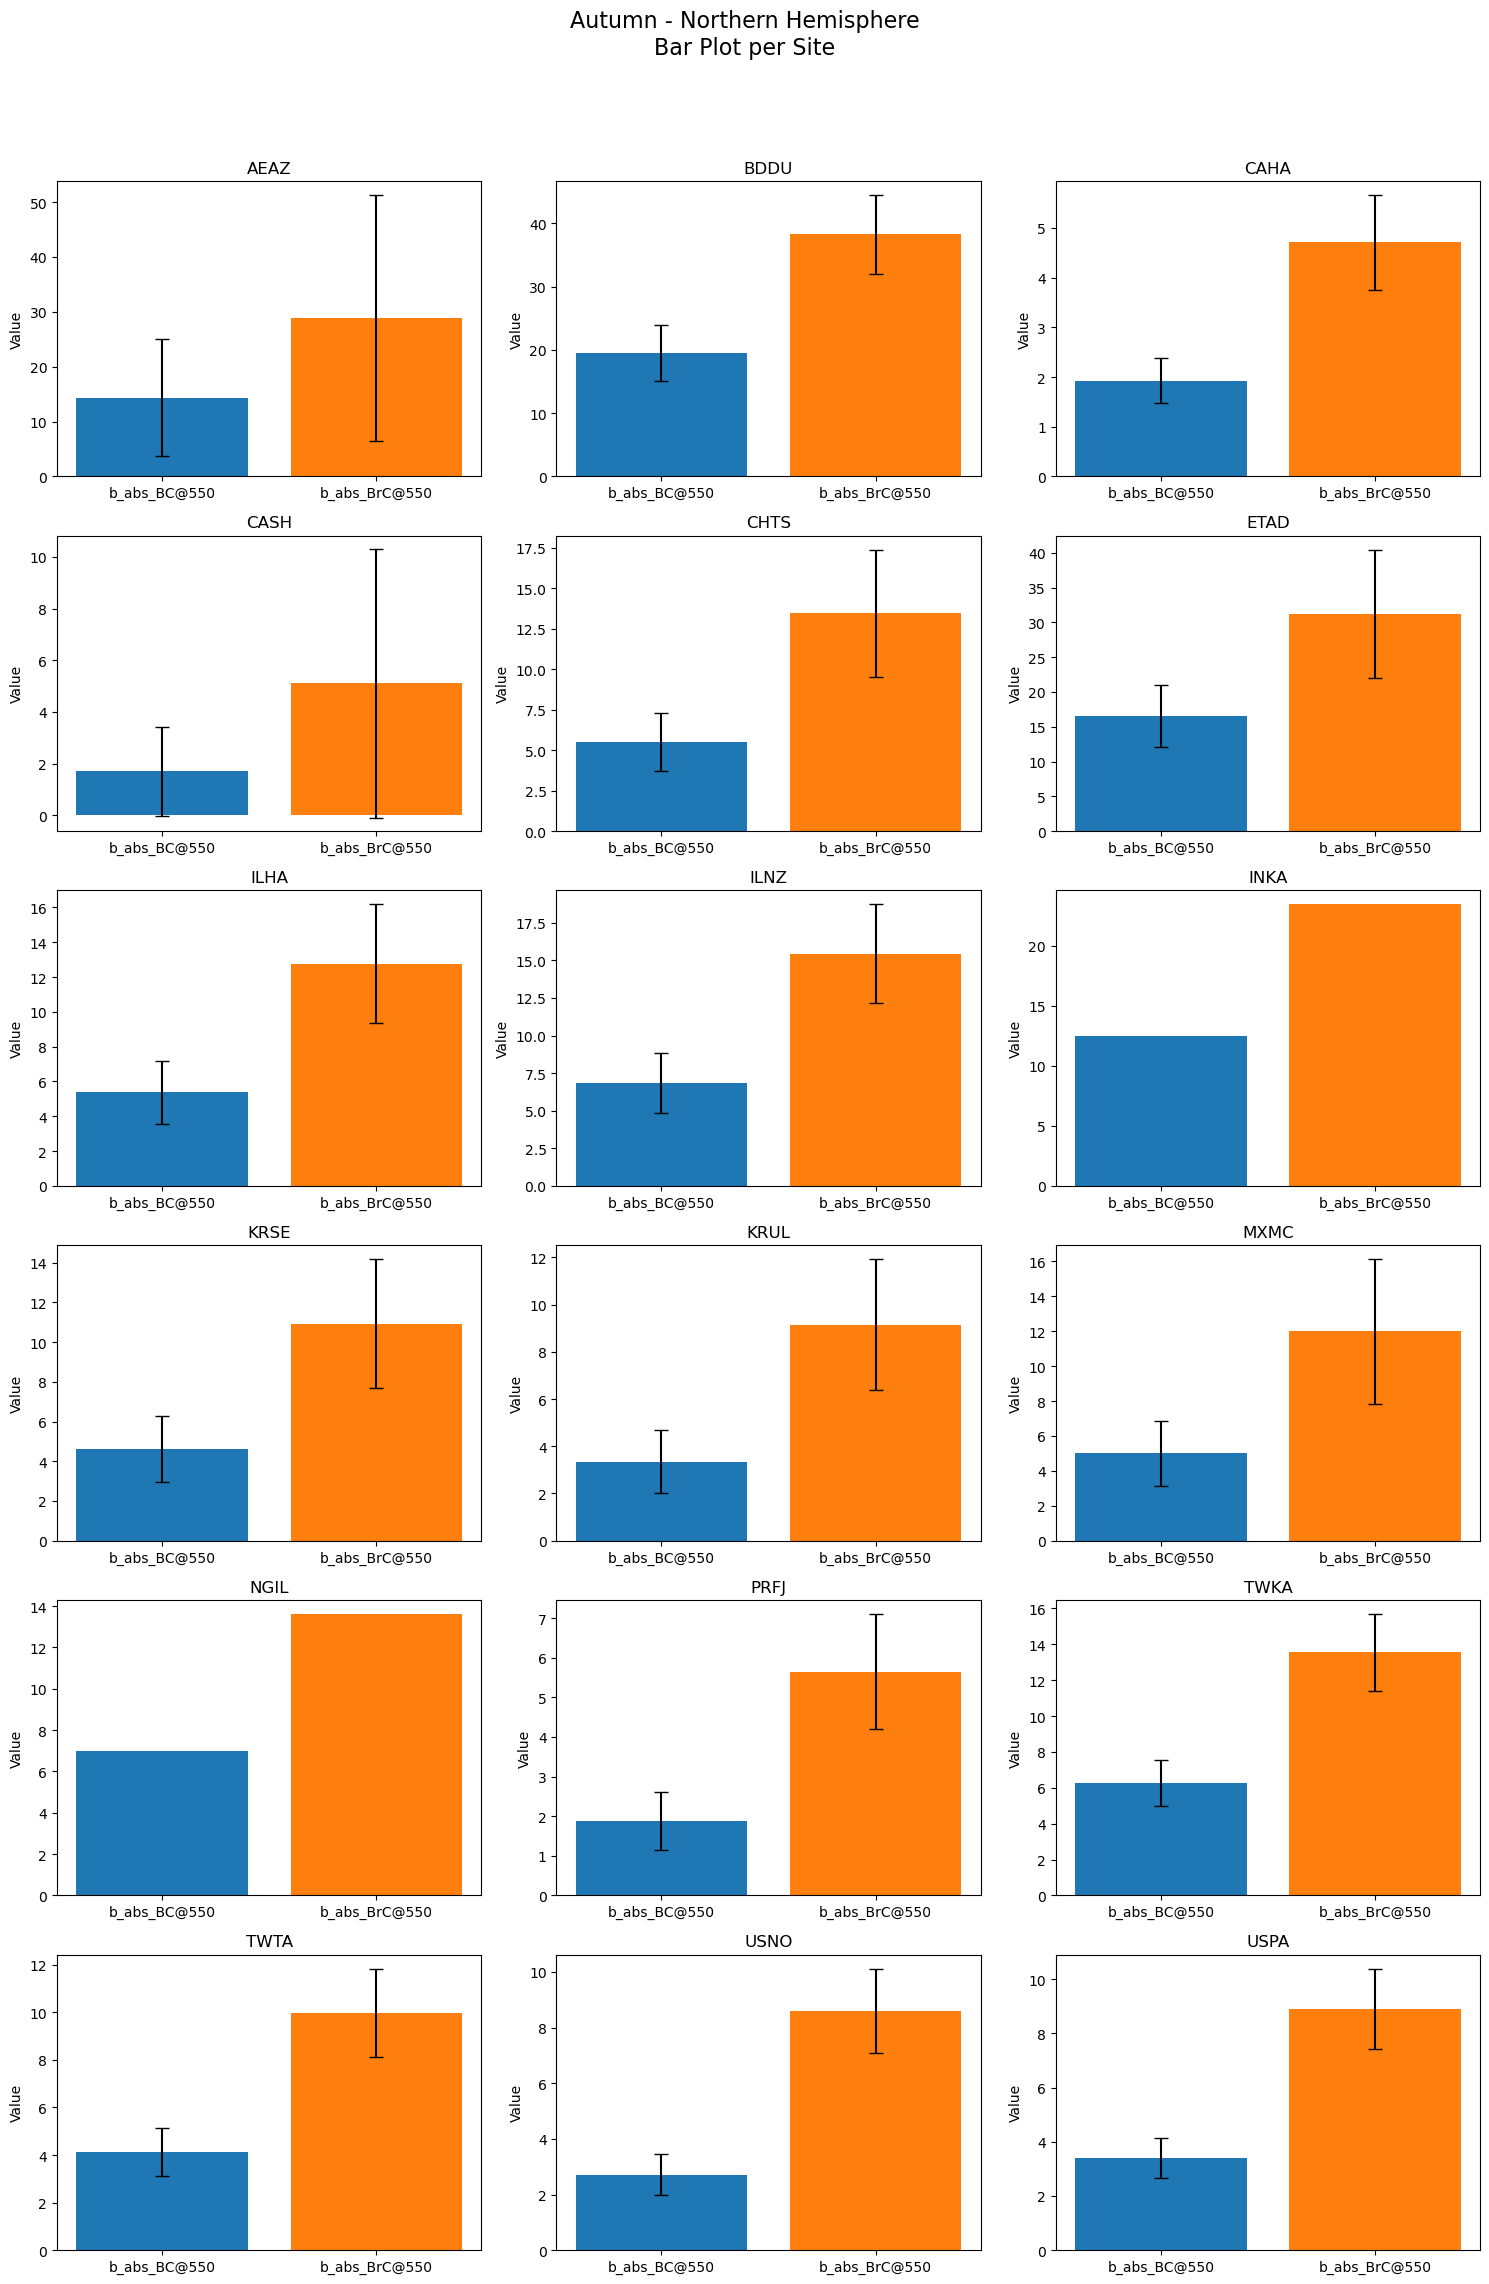

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Choose filters
season_filter = 'Autumn'
hemisphere_filter = 'northern'

# STEP 2: Filter the DataFrame
filtered_df = pm25_df[
    (pm25_df['Season'] == season_filter) &
    (pm25_df['Hemisphere'] == hemisphere_filter)
]

# STEP 3: Group by Site
metrics = ['b_abs_BC@550', 'b_abs_BrC@550']
grouped = filtered_df.groupby('Site')

# How many sites?
sites = list(grouped.groups.keys())
n_sites = len(sites)

# Layout: automatic rows & cols for subplots
n_cols = 3
n_rows = (n_sites + n_cols - 1) // n_cols

# STEP 4: Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# STEP 5: Plot each site in its own subplot
for idx, site in enumerate(sites):
    row, col = divmod(idx, n_cols)
    ax = axes[row][col]
    
    data = grouped.get_group(site)
    means = data[metrics].mean()
    errors = data[metrics].std()

    ax.bar(metrics, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax.set_title(site)
    ax.set_ylabel('Value')
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(metrics, ha='center')

# Hide any empty subplots
for idx in range(n_sites, n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row][col].axis('off')

# Final layout
fig.suptitle(f'{season_filter} - {hemisphere_filter.capitalize()} Hemisphere\nBar Plot per Site', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

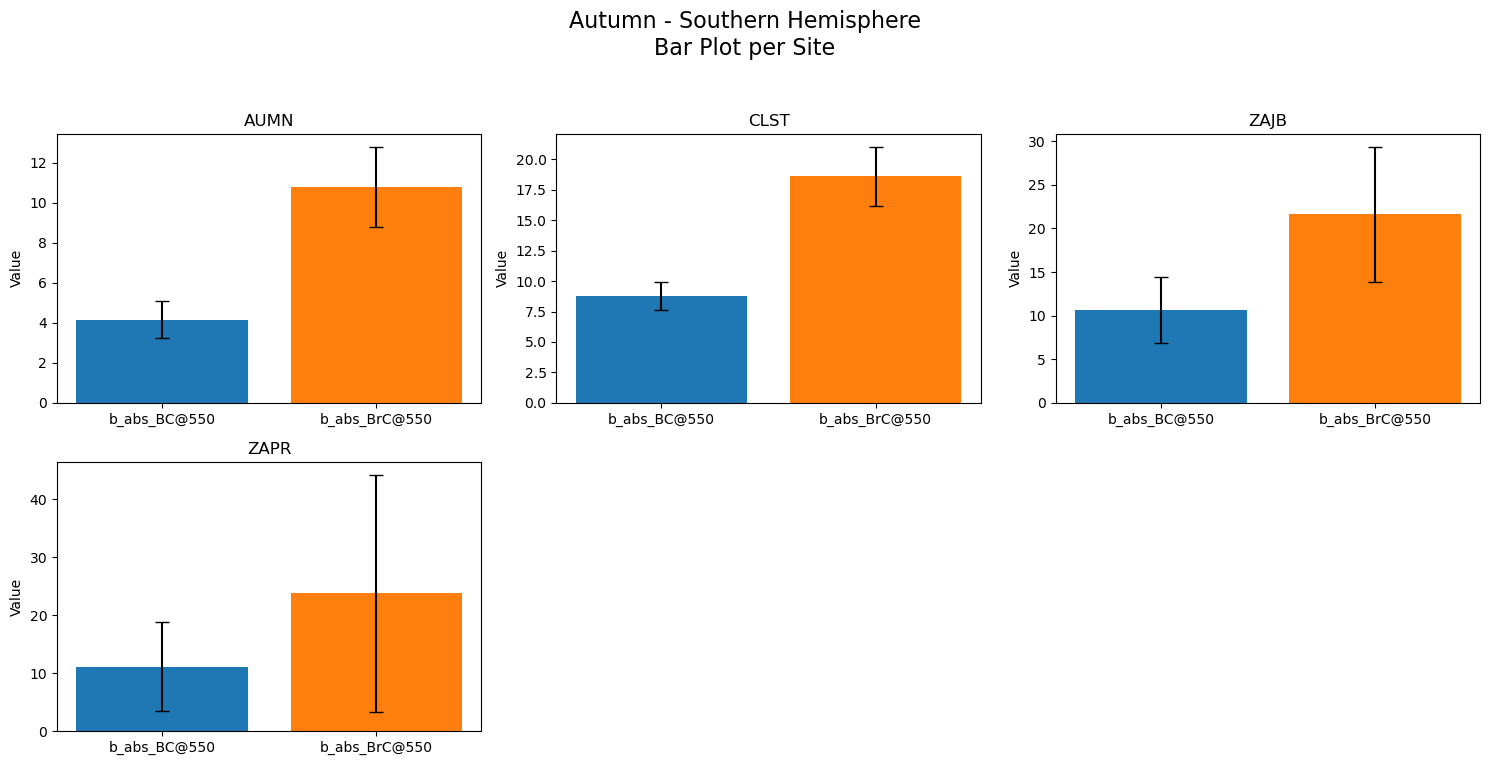

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Choose filters
season_filter = 'Autumn'
hemisphere_filter = 'southern'

# STEP 2: Filter the DataFrame
filtered_df = pm25_df[
    (pm25_df['Season'] == season_filter) &
    (pm25_df['Hemisphere'] == hemisphere_filter)
]

# STEP 3: Group by Site
metrics = ['b_abs_BC@550', 'b_abs_BrC@550']
grouped = filtered_df.groupby('Site')

# How many sites?
sites = list(grouped.groups.keys())
n_sites = len(sites)

# Layout: automatic rows & cols for subplots
n_cols = 3
n_rows = (n_sites + n_cols - 1) // n_cols

# STEP 4: Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# STEP 5: Plot each site in its own subplot
for idx, site in enumerate(sites):
    row, col = divmod(idx, n_cols)
    ax = axes[row][col]
    
    data = grouped.get_group(site)
    means = data[metrics].mean()
    errors = data[metrics].std()

    ax.bar(metrics, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax.set_title(site)
    ax.set_ylabel('Value')
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(metrics, ha='center')

# Hide any empty subplots
for idx in range(n_sites, n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row][col].axis('off')

# Final layout
fig.suptitle(f'{season_filter} - {hemisphere_filter.capitalize()} Hemisphere\nBar Plot per Site', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

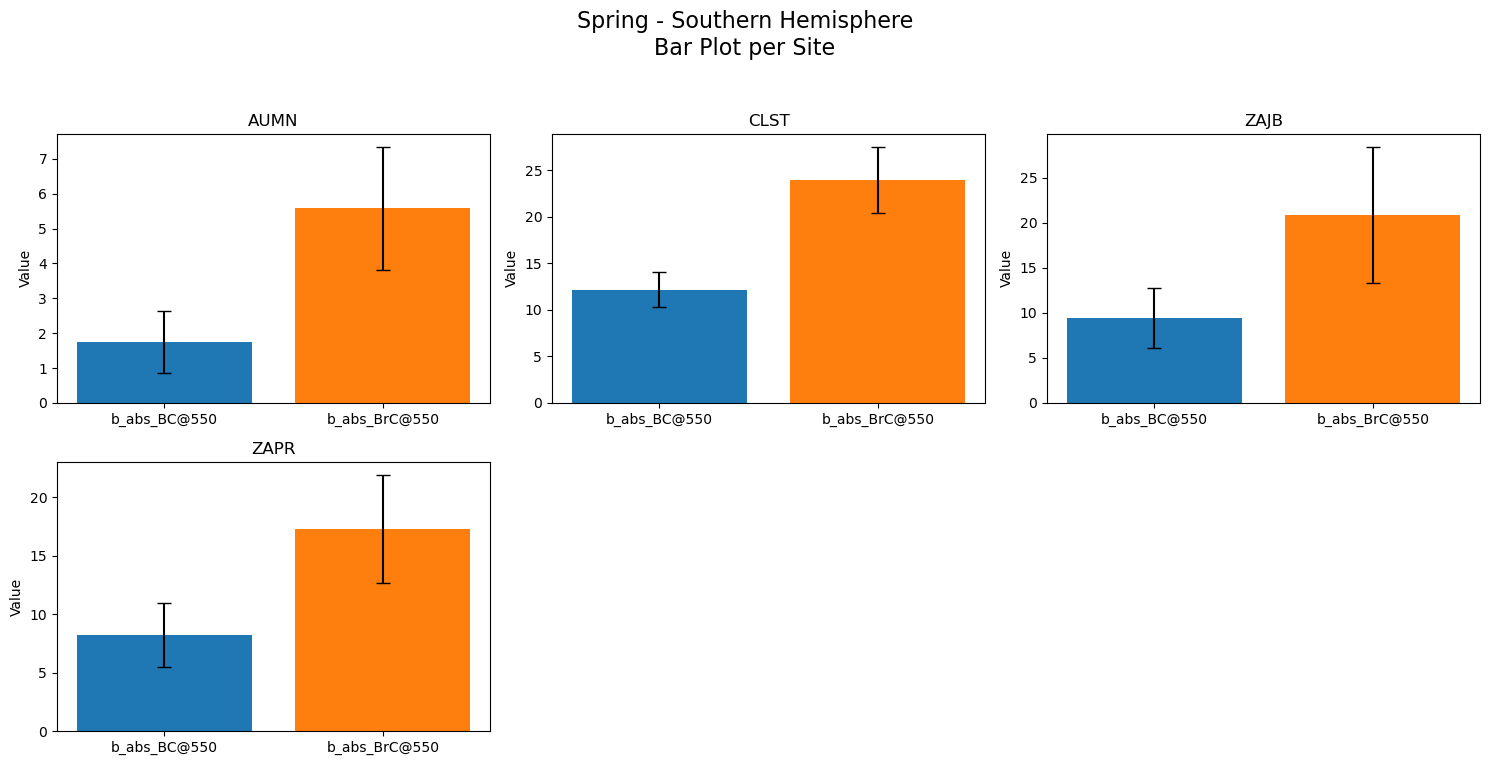

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Choose filters
season_filter = 'Spring'
hemisphere_filter = 'southern'

# STEP 2: Filter the DataFrame
filtered_df = pm25_df[
    (pm25_df['Season'] == season_filter) &
    (pm25_df['Hemisphere'] == hemisphere_filter)
]

# STEP 3: Group by Site
metrics = ['b_abs_BC@550', 'b_abs_BrC@550']
grouped = filtered_df.groupby('Site')

# How many sites?
sites = list(grouped.groups.keys())
n_sites = len(sites)

# Layout: automatic rows & cols for subplots
n_cols = 3
n_rows = (n_sites + n_cols - 1) // n_cols

# STEP 4: Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# STEP 5: Plot each site in its own subplot
for idx, site in enumerate(sites):
    row, col = divmod(idx, n_cols)
    ax = axes[row][col]
    
    data = grouped.get_group(site)
    means = data[metrics].mean()
    errors = data[metrics].std()

    ax.bar(metrics, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax.set_title(site)
    ax.set_ylabel('Value')
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(metrics, ha='center')

# Hide any empty subplots
for idx in range(n_sites, n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row][col].axis('off')

# Final layout
fig.suptitle(f'{season_filter} - {hemisphere_filter.capitalize()} Hemisphere\nBar Plot per Site', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

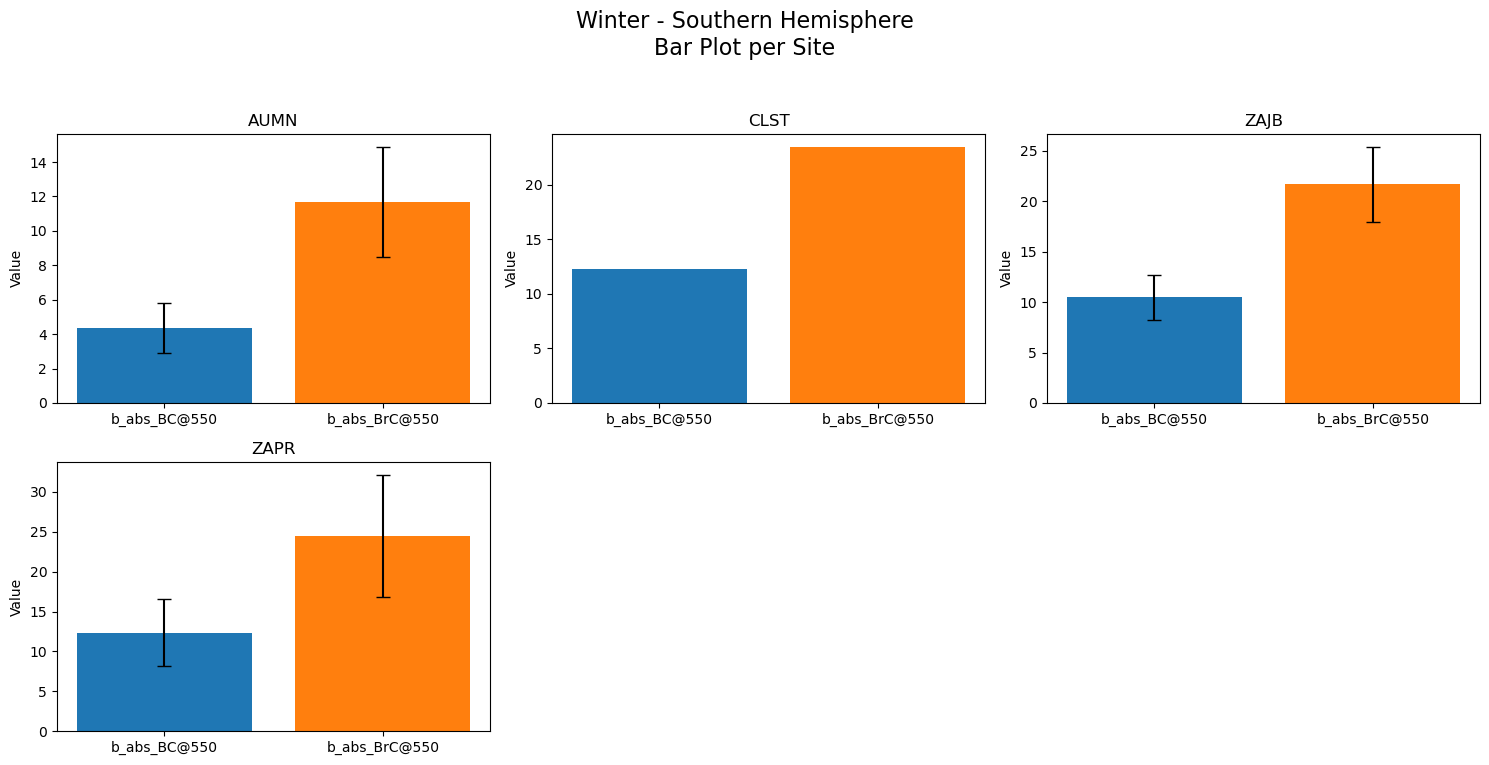

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Choose filters
season_filter = 'Winter'
hemisphere_filter = 'southern'

# STEP 2: Filter the DataFrame
filtered_df = pm25_df[
    (pm25_df['Season'] == season_filter) &
    (pm25_df['Hemisphere'] == hemisphere_filter)
]

# STEP 3: Group by Site
metrics = ['b_abs_BC@550', 'b_abs_BrC@550']
grouped = filtered_df.groupby('Site')

# How many sites?
sites = list(grouped.groups.keys())
n_sites = len(sites)

# Layout: automatic rows & cols for subplots
n_cols = 3
n_rows = (n_sites + n_cols - 1) // n_cols

# STEP 4: Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# STEP 5: Plot each site in its own subplot
for idx, site in enumerate(sites):
    row, col = divmod(idx, n_cols)
    ax = axes[row][col]
    
    data = grouped.get_group(site)
    means = data[metrics].mean()
    errors = data[metrics].std()

    ax.bar(metrics, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax.set_title(site)
    ax.set_ylabel('Value')
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(metrics, ha='center')

# Hide any empty subplots
for idx in range(n_sites, n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row][col].axis('off')

# Final layout
fig.suptitle(f'{season_filter} - {hemisphere_filter.capitalize()} Hemisphere\nBar Plot per Site', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

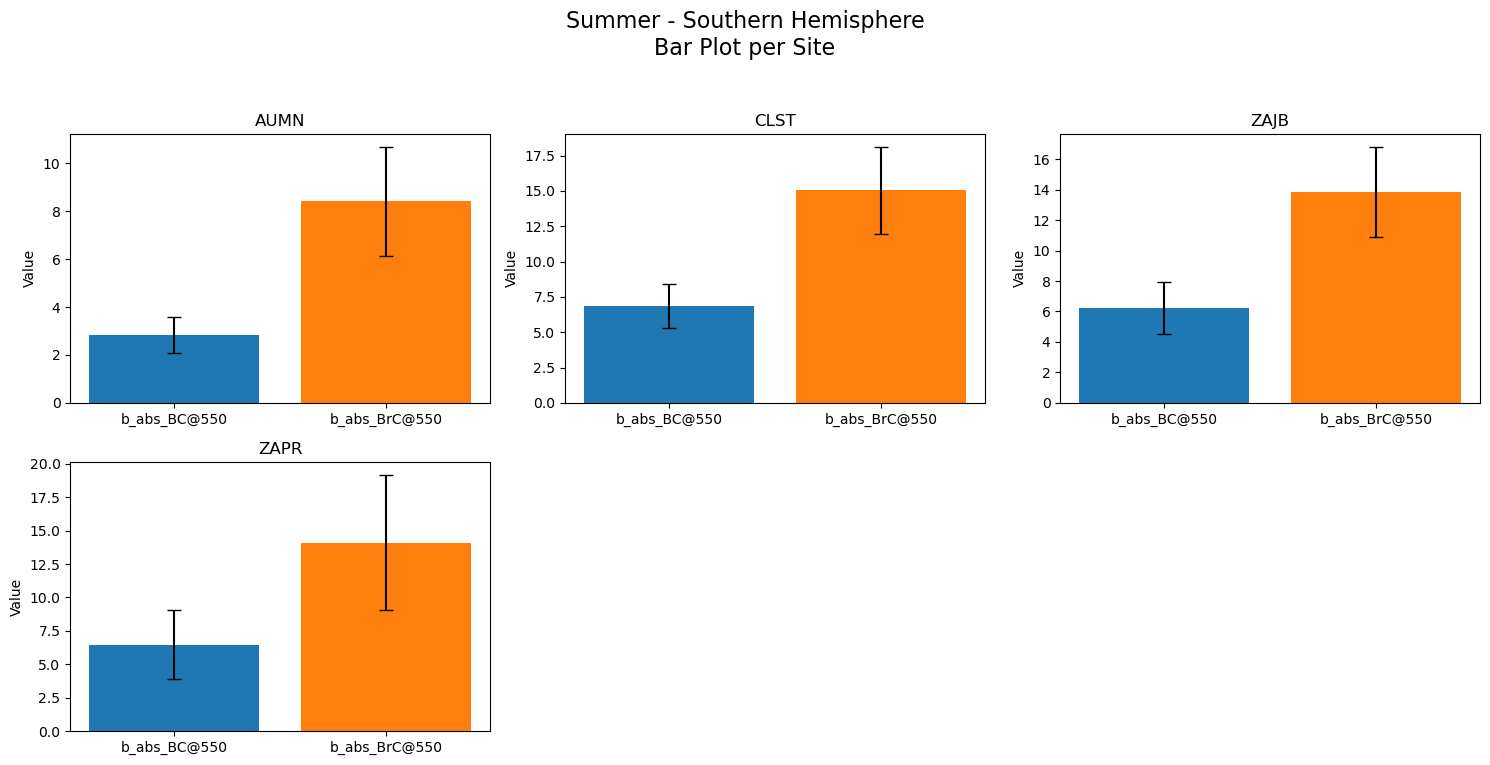

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Choose filters
season_filter = 'Summer'
hemisphere_filter = 'southern'

# STEP 2: Filter the DataFrame
filtered_df = pm25_df[
    (pm25_df['Season'] == season_filter) &
    (pm25_df['Hemisphere'] == hemisphere_filter)
]

# STEP 3: Group by Site
metrics = ['b_abs_BC@550', 'b_abs_BrC@550']
grouped = filtered_df.groupby('Site')

# How many sites?
sites = list(grouped.groups.keys())
n_sites = len(sites)

# Layout: automatic rows & cols for subplots
n_cols = 3
n_rows = (n_sites + n_cols - 1) // n_cols

# STEP 4: Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# STEP 5: Plot each site in its own subplot
for idx, site in enumerate(sites):
    row, col = divmod(idx, n_cols)
    ax = axes[row][col]
    
    data = grouped.get_group(site)
    means = data[metrics].mean()
    errors = data[metrics].std()

    ax.bar(metrics, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax.set_title(site)
    ax.set_ylabel('Value')
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(metrics, ha='center')

# Hide any empty subplots
for idx in range(n_sites, n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row][col].axis('off')

# Final layout
fig.suptitle(f'{season_filter} - {hemisphere_filter.capitalize()} Hemisphere\nBar Plot per Site', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

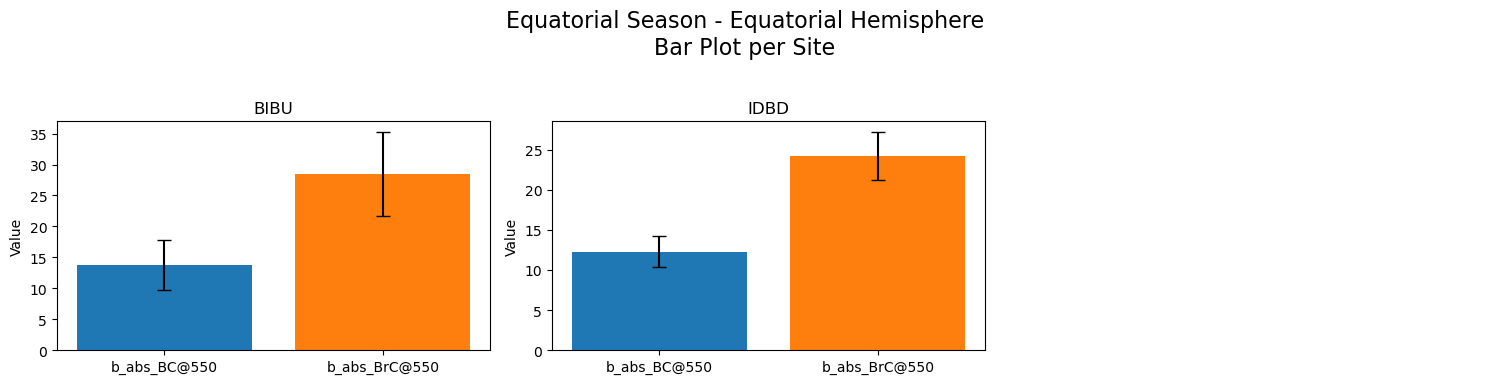

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Choose filters
season_filter = 'Equatorial Season'
hemisphere_filter = 'equatorial'

# STEP 2: Filter the DataFrame
filtered_df = pm25_df[
    (pm25_df['Season'] == season_filter) &
    (pm25_df['Hemisphere'] == hemisphere_filter)
]

# STEP 3: Group by Site
metrics = ['b_abs_BC@550', 'b_abs_BrC@550']
grouped = filtered_df.groupby('Site')

# How many sites?
sites = list(grouped.groups.keys())
n_sites = len(sites)

# Layout: automatic rows & cols for subplots
n_cols = 3
n_rows = (n_sites + n_cols - 1) // n_cols

# STEP 4: Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# STEP 5: Plot each site in its own subplot
for idx, site in enumerate(sites):
    row, col = divmod(idx, n_cols)
    ax = axes[row][col]
    
    data = grouped.get_group(site)
    means = data[metrics].mean()
    errors = data[metrics].std()

    ax.bar(metrics, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax.set_title(site)
    ax.set_ylabel('Value')
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(metrics, ha='center')

# Hide any empty subplots
for idx in range(n_sites, n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row][col].axis('off')

# Final layout
fig.suptitle(f'{season_filter} - {hemisphere_filter.capitalize()} Hemisphere\nBar Plot per Site', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## BC vs non-BC

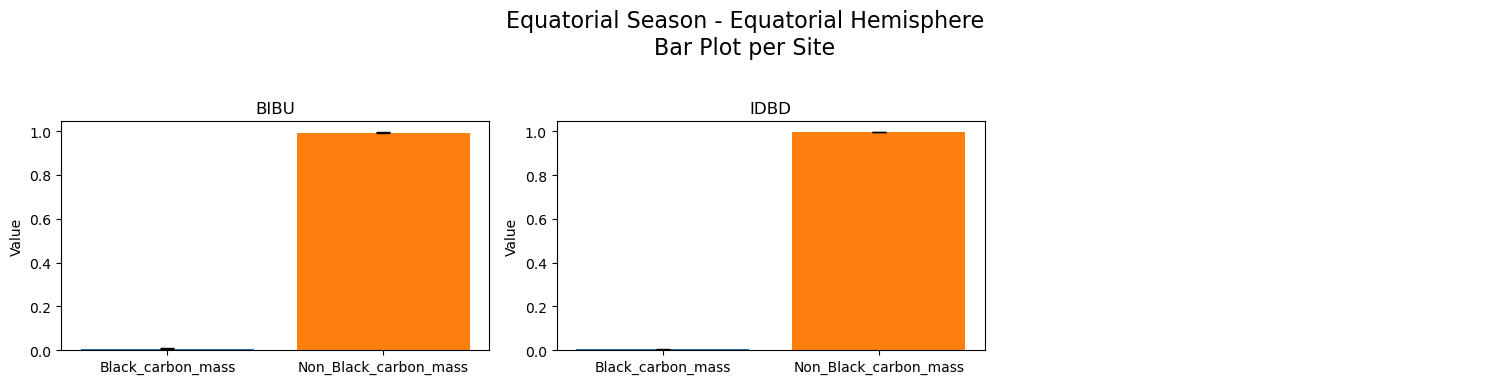

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Choose filters
season_filter = 'Equatorial Season'
hemisphere_filter = 'equatorial'

# STEP 2: Filter the DataFrame
filtered_df = pm25_df[
    (pm25_df['Season'] == season_filter) &
    (pm25_df['Hemisphere'] == hemisphere_filter)
]

# STEP 3: Group by Site
metrics = ['Black_carbon_mass', 'Non_Black_carbon_mass']
grouped = filtered_df.groupby('Site')

# How many sites?
sites = list(grouped.groups.keys())
n_sites = len(sites)

# Layout: automatic rows & cols for subplots
n_cols = 3
n_rows = (n_sites + n_cols - 1) // n_cols

# STEP 4: Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# STEP 5: Plot each site in its own subplot
for idx, site in enumerate(sites):
    row, col = divmod(idx, n_cols)
    ax = axes[row][col]
    
    data = grouped.get_group(site)
    means = data[metrics].mean()
    errors = data[metrics].std()

    ax.bar(metrics, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax.set_title(site)
    ax.set_ylabel('Value')
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(metrics, ha='center')

# Hide any empty subplots
for idx in range(n_sites, n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row][col].axis('off')

# Final layout
fig.suptitle(f'{season_filter} - {hemisphere_filter.capitalize()} Hemisphere\nBar Plot per Site', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

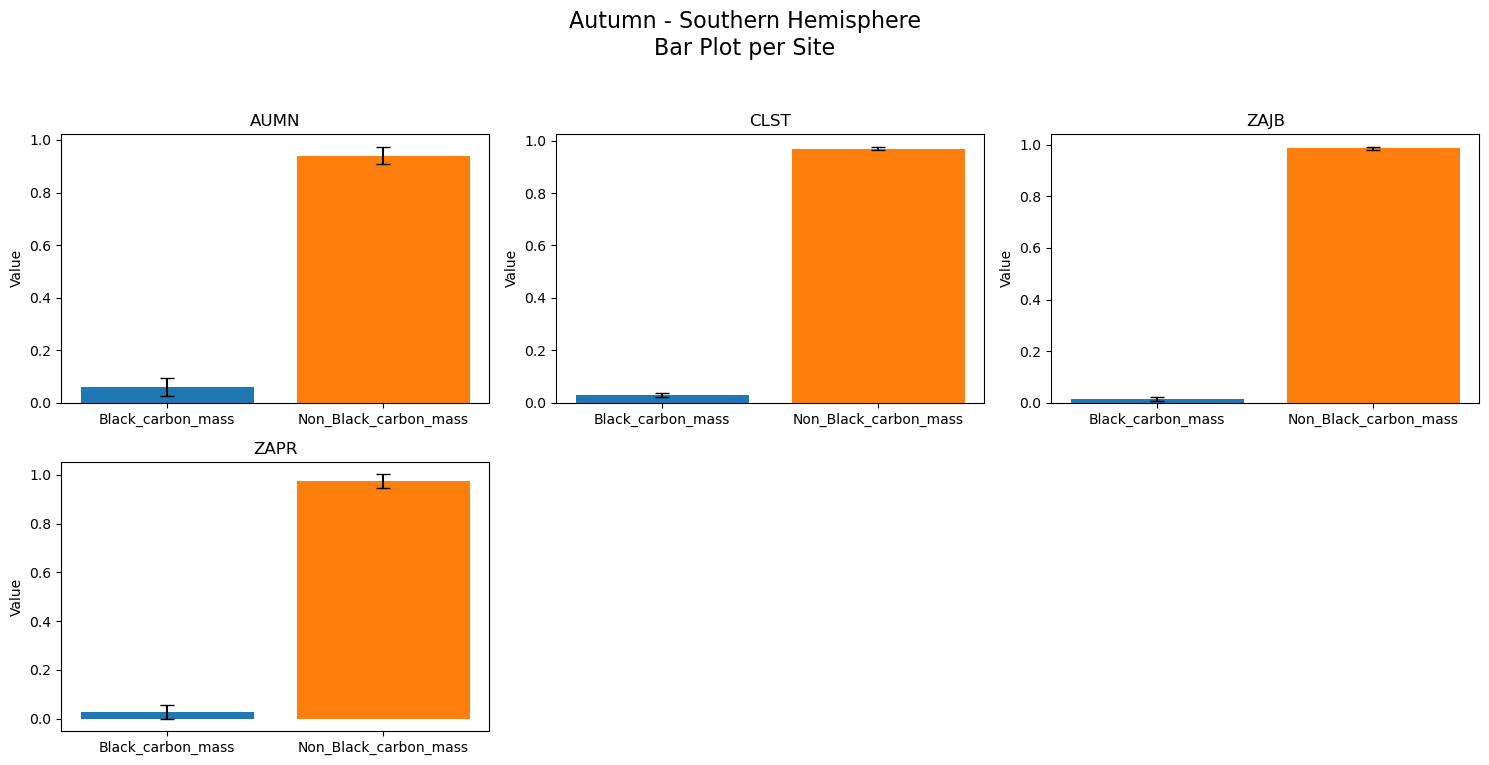

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Choose filters
season_filter = 'Autumn'
hemisphere_filter = 'southern'

# STEP 2: Filter the DataFrame
filtered_df = pm25_df[
    (pm25_df['Season'] == season_filter) &
    (pm25_df['Hemisphere'] == hemisphere_filter)
]

# STEP 3: Group by Site
metrics = ['Black_carbon_mass', 'Non_Black_carbon_mass']
grouped = filtered_df.groupby('Site')

# How many sites?
sites = list(grouped.groups.keys())
n_sites = len(sites)

# Layout: automatic rows & cols for subplots
n_cols = 3
n_rows = (n_sites + n_cols - 1) // n_cols

# STEP 4: Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# STEP 5: Plot each site in its own subplot
for idx, site in enumerate(sites):
    row, col = divmod(idx, n_cols)
    ax = axes[row][col]
    
    data = grouped.get_group(site)
    means = data[metrics].mean()
    errors = data[metrics].std()

    ax.bar(metrics, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax.set_title(site)
    ax.set_ylabel('Value')
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(metrics, ha='center')

# Hide any empty subplots
for idx in range(n_sites, n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row][col].axis('off')

# Final layout
fig.suptitle(f'{season_filter} - {hemisphere_filter.capitalize()} Hemisphere\nBar Plot per Site', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

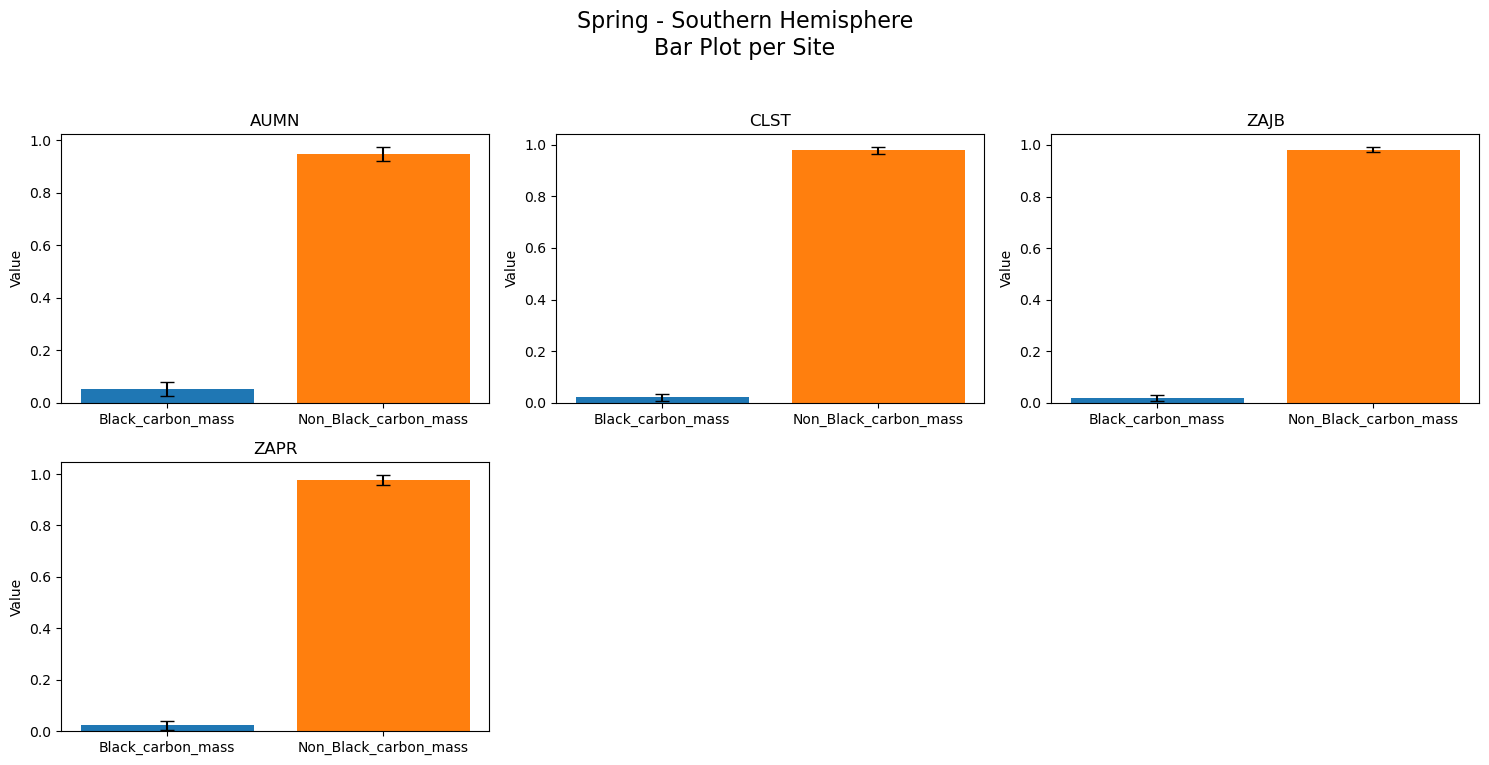

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Choose filters
season_filter = 'Spring'
hemisphere_filter = 'southern'

# STEP 2: Filter the DataFrame
filtered_df = pm25_df[
    (pm25_df['Season'] == season_filter) &
    (pm25_df['Hemisphere'] == hemisphere_filter)
]

# STEP 3: Group by Site
metrics = ['Black_carbon_mass', 'Non_Black_carbon_mass']
grouped = filtered_df.groupby('Site')

# How many sites?
sites = list(grouped.groups.keys())
n_sites = len(sites)

# Layout: automatic rows & cols for subplots
n_cols = 3
n_rows = (n_sites + n_cols - 1) // n_cols

# STEP 4: Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# STEP 5: Plot each site in its own subplot
for idx, site in enumerate(sites):
    row, col = divmod(idx, n_cols)
    ax = axes[row][col]
    
    data = grouped.get_group(site)
    means = data[metrics].mean()
    errors = data[metrics].std()

    ax.bar(metrics, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax.set_title(site)
    ax.set_ylabel('Value')
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(metrics, ha='center')

# Hide any empty subplots
for idx in range(n_sites, n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row][col].axis('off')

# Final layout
fig.suptitle(f'{season_filter} - {hemisphere_filter.capitalize()} Hemisphere\nBar Plot per Site', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

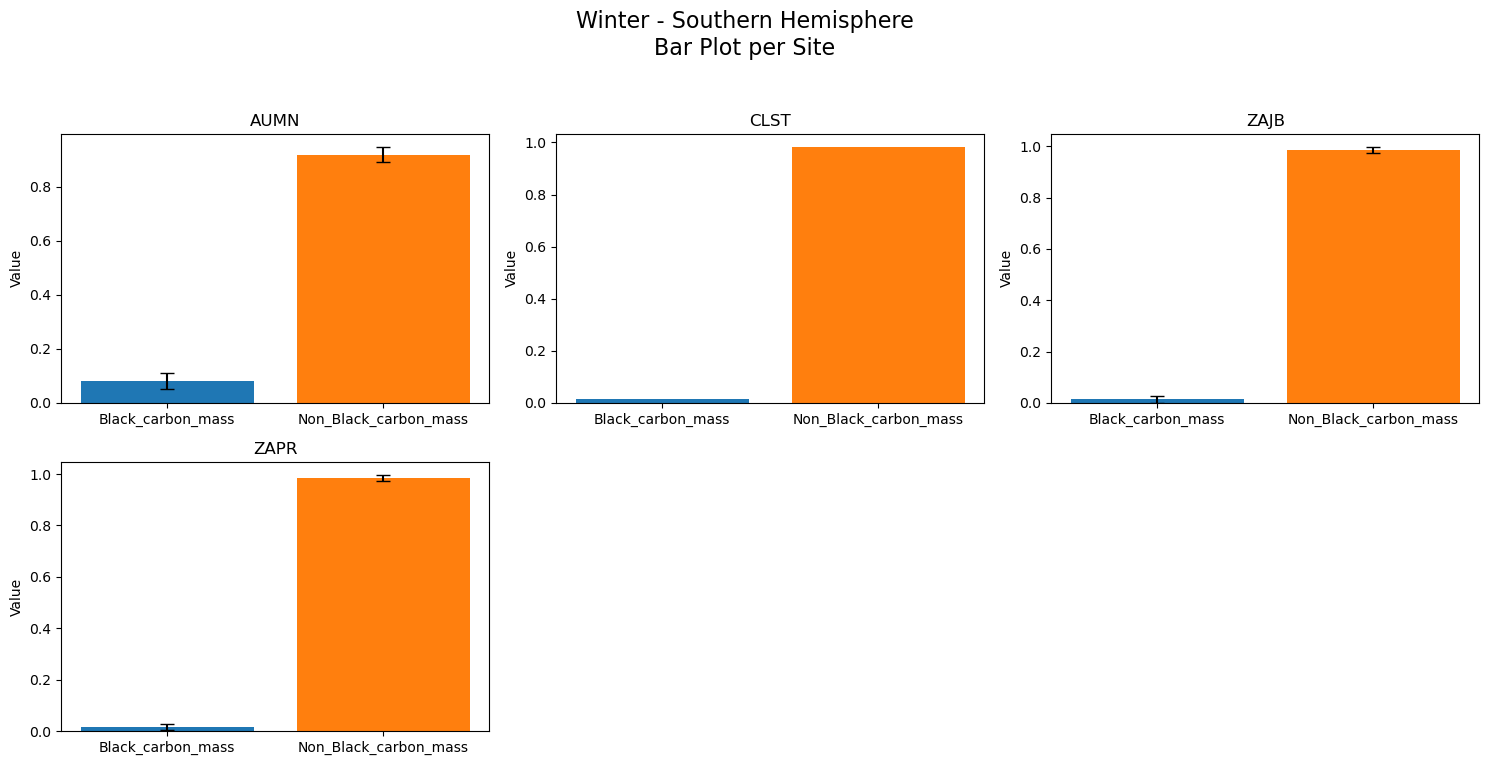

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Choose filters
season_filter = 'Winter'
hemisphere_filter = 'southern'

# STEP 2: Filter the DataFrame
filtered_df = pm25_df[
    (pm25_df['Season'] == season_filter) &
    (pm25_df['Hemisphere'] == hemisphere_filter)
]

# STEP 3: Group by Site
metrics = ['Black_carbon_mass', 'Non_Black_carbon_mass']
grouped = filtered_df.groupby('Site')

# How many sites?
sites = list(grouped.groups.keys())
n_sites = len(sites)

# Layout: automatic rows & cols for subplots
n_cols = 3
n_rows = (n_sites + n_cols - 1) // n_cols

# STEP 4: Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# STEP 5: Plot each site in its own subplot
for idx, site in enumerate(sites):
    row, col = divmod(idx, n_cols)
    ax = axes[row][col]
    
    data = grouped.get_group(site)
    means = data[metrics].mean()
    errors = data[metrics].std()

    ax.bar(metrics, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax.set_title(site)
    ax.set_ylabel('Value')
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(metrics, ha='center')

# Hide any empty subplots
for idx in range(n_sites, n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row][col].axis('off')

# Final layout
fig.suptitle(f'{season_filter} - {hemisphere_filter.capitalize()} Hemisphere\nBar Plot per Site', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

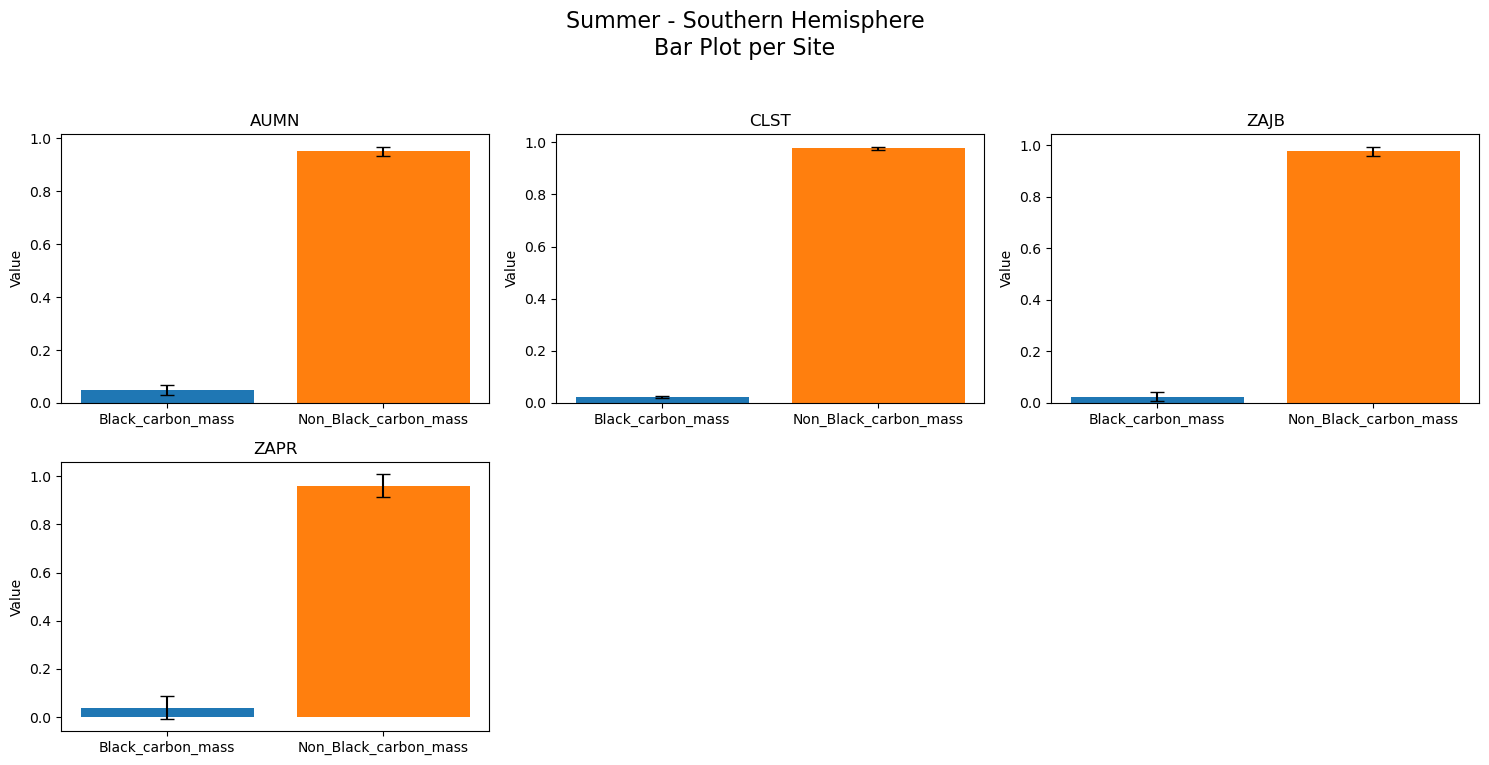

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Choose filters
season_filter = 'Summer'
hemisphere_filter = 'southern'

# STEP 2: Filter the DataFrame
filtered_df = pm25_df[
    (pm25_df['Season'] == season_filter) &
    (pm25_df['Hemisphere'] == hemisphere_filter)
]

# STEP 3: Group by Site
metrics = ['Black_carbon_mass', 'Non_Black_carbon_mass']
grouped = filtered_df.groupby('Site')

# How many sites?
sites = list(grouped.groups.keys())
n_sites = len(sites)

# Layout: automatic rows & cols for subplots
n_cols = 3
n_rows = (n_sites + n_cols - 1) // n_cols

# STEP 4: Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# STEP 5: Plot each site in its own subplot
for idx, site in enumerate(sites):
    row, col = divmod(idx, n_cols)
    ax = axes[row][col]
    
    data = grouped.get_group(site)
    means = data[metrics].mean()
    errors = data[metrics].std()

    ax.bar(metrics, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax.set_title(site)
    ax.set_ylabel('Value')
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(metrics, ha='center')

# Hide any empty subplots
for idx in range(n_sites, n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row][col].axis('off')

# Final layout
fig.suptitle(f'{season_filter} - {hemisphere_filter.capitalize()} Hemisphere\nBar Plot per Site', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

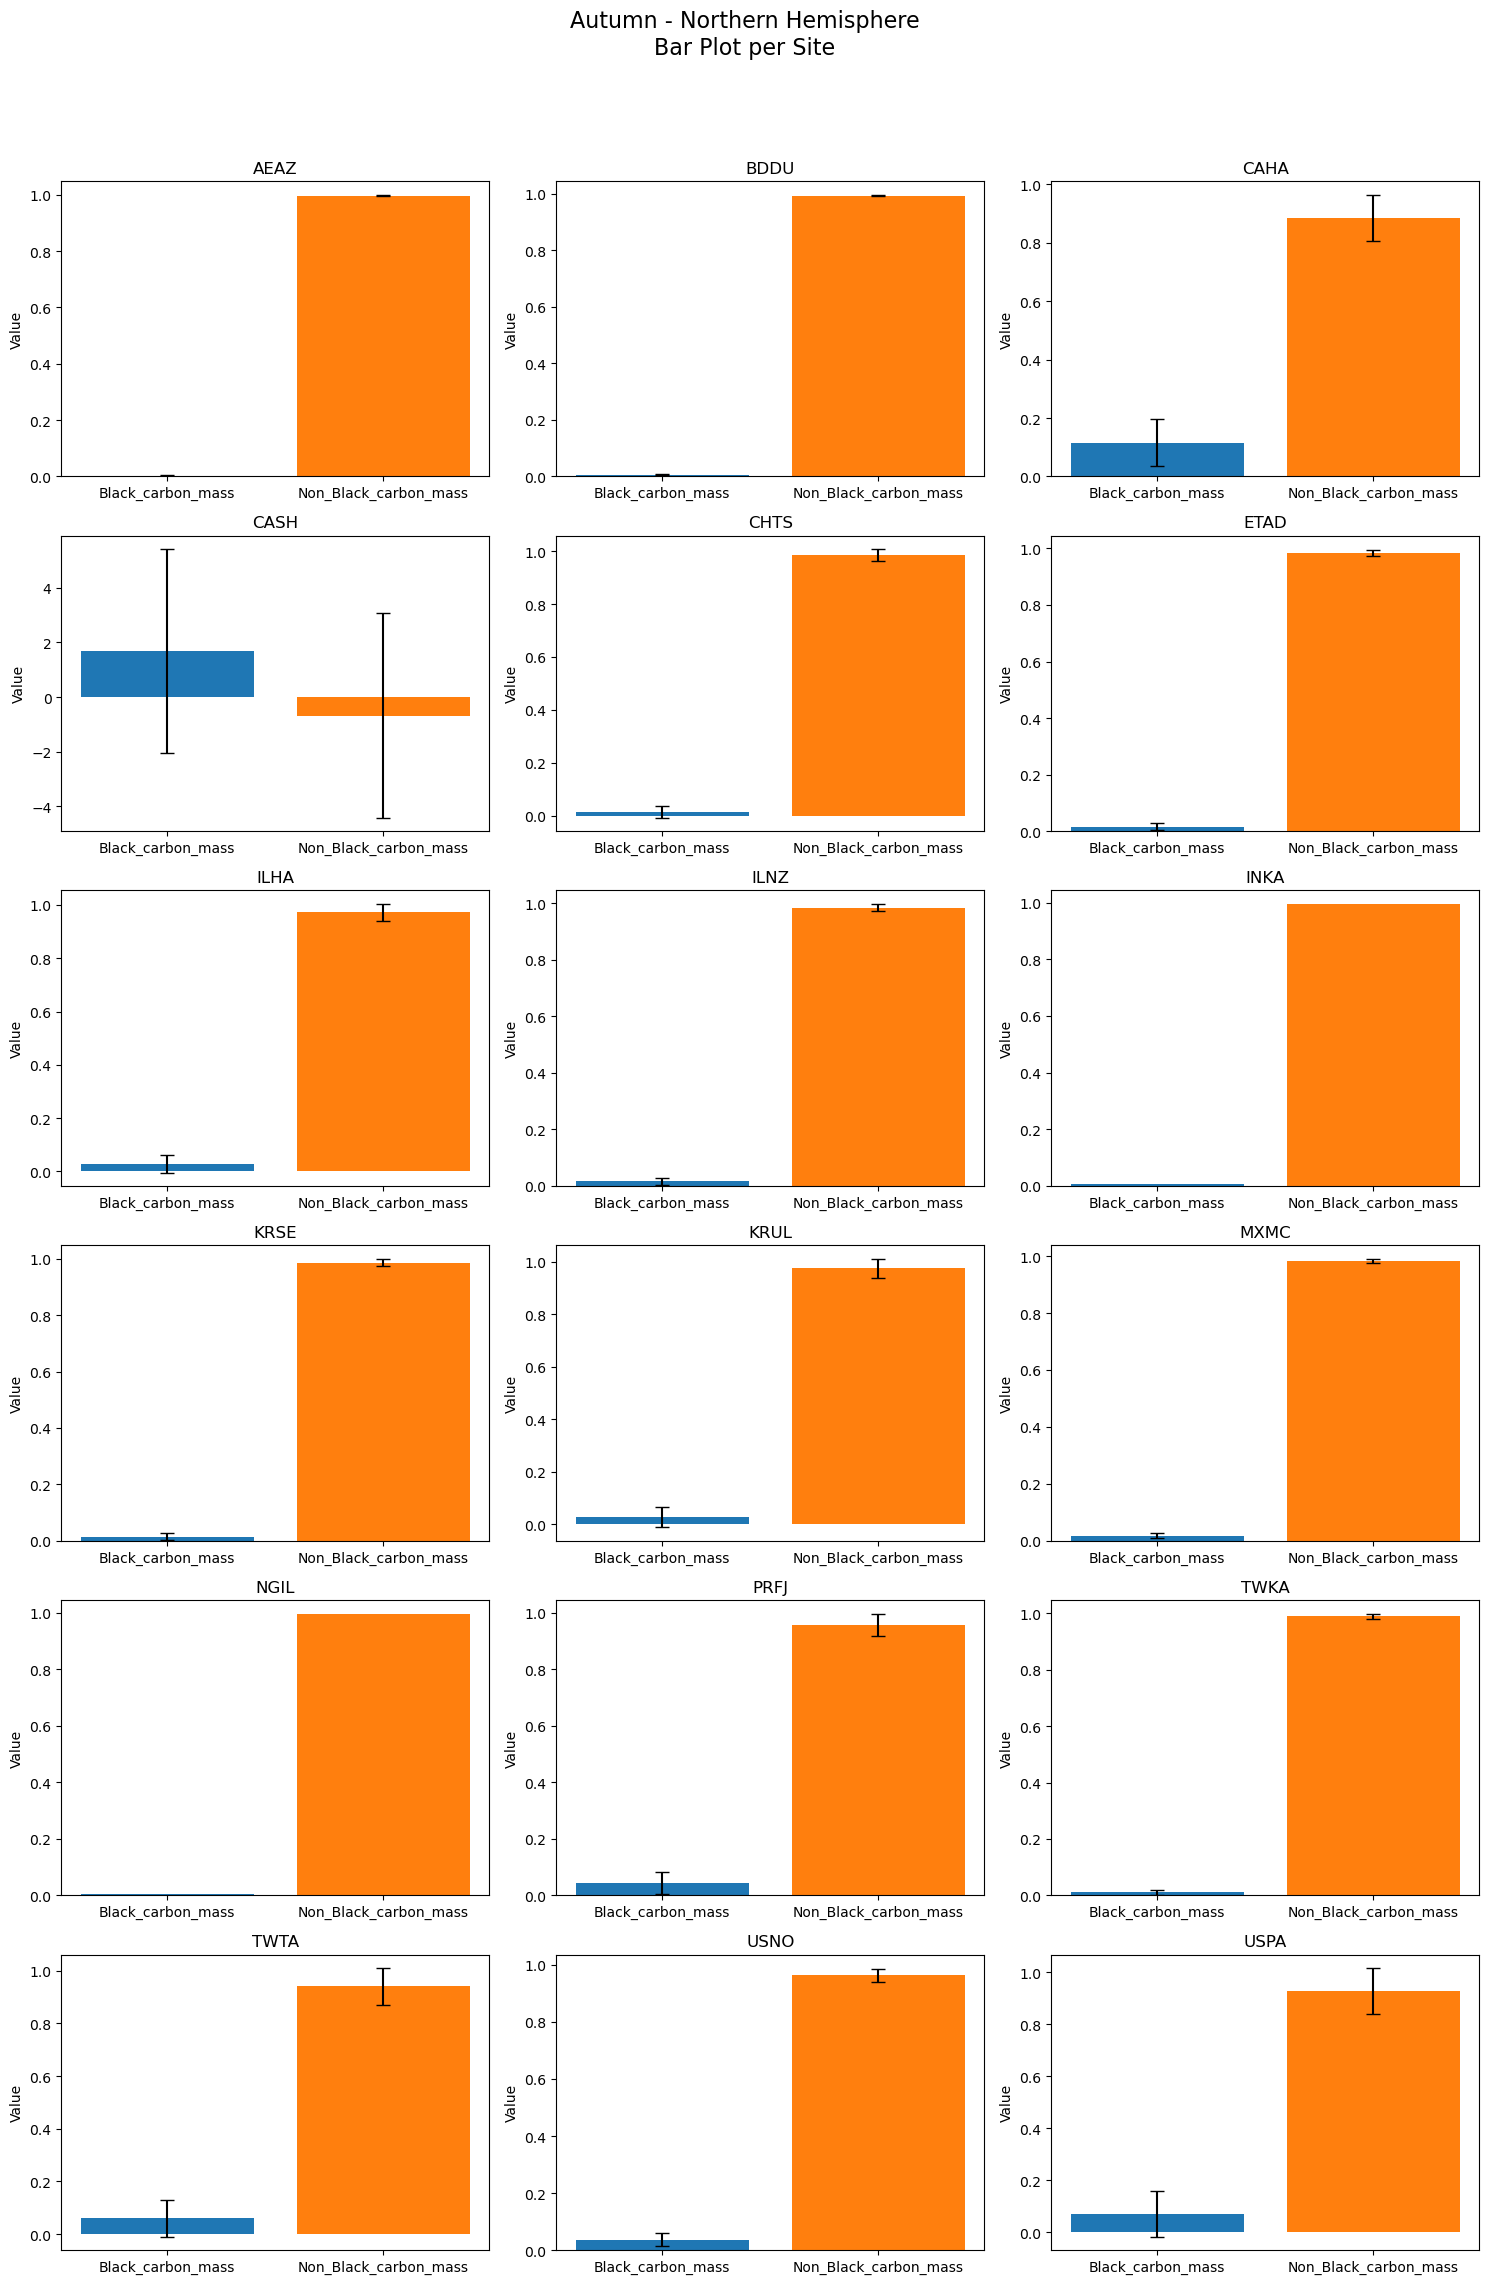

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Choose filters
season_filter = 'Autumn'
hemisphere_filter = 'northern'

# STEP 2: Filter the DataFrame
filtered_df = pm25_df[
    (pm25_df['Season'] == season_filter) &
    (pm25_df['Hemisphere'] == hemisphere_filter)
]

# STEP 3: Group by Site
metrics = ['Black_carbon_mass', 'Non_Black_carbon_mass']
grouped = filtered_df.groupby('Site')

# How many sites?
sites = list(grouped.groups.keys())
n_sites = len(sites)

# Layout: automatic rows & cols for subplots
n_cols = 3
n_rows = (n_sites + n_cols - 1) // n_cols

# STEP 4: Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# STEP 5: Plot each site in its own subplot
for idx, site in enumerate(sites):
    row, col = divmod(idx, n_cols)
    ax = axes[row][col]
    
    data = grouped.get_group(site)
    means = data[metrics].mean()
    errors = data[metrics].std()

    ax.bar(metrics, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax.set_title(site)
    ax.set_ylabel('Value')
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(metrics, ha='center')

# Hide any empty subplots
for idx in range(n_sites, n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row][col].axis('off')

# Final layout
fig.suptitle(f'{season_filter} - {hemisphere_filter.capitalize()} Hemisphere\nBar Plot per Site', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

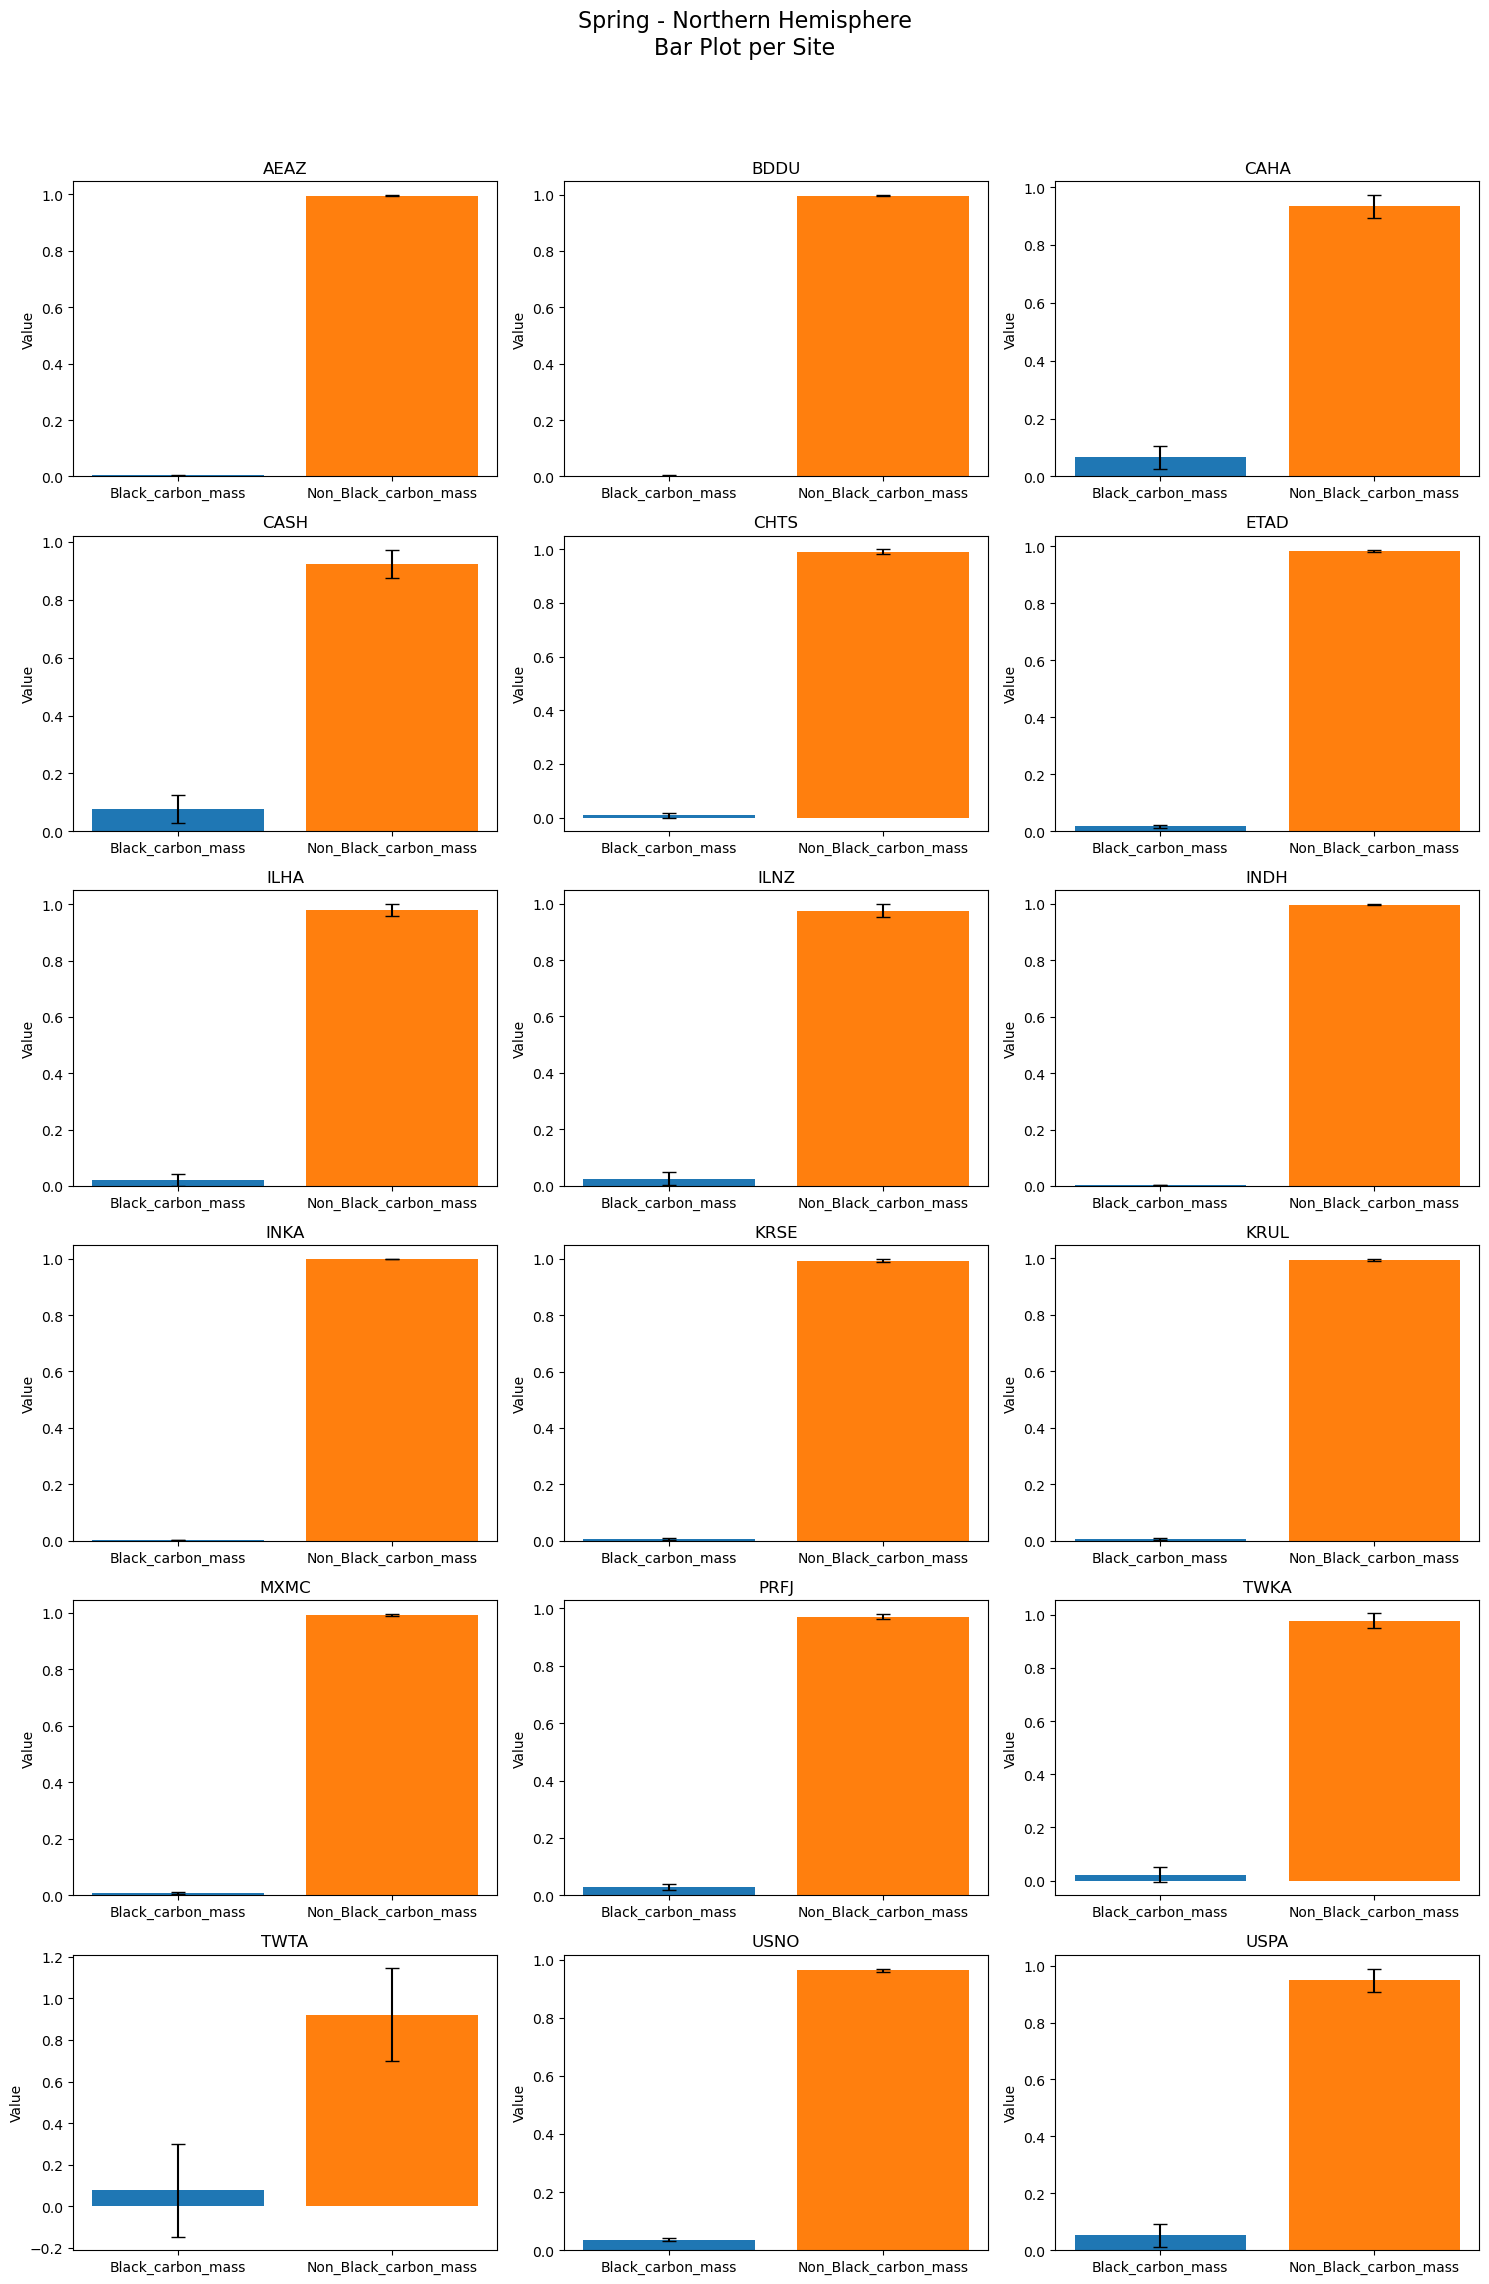

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Choose filters
season_filter = 'Spring'
hemisphere_filter = 'northern'

# STEP 2: Filter the DataFrame
filtered_df = pm25_df[
    (pm25_df['Season'] == season_filter) &
    (pm25_df['Hemisphere'] == hemisphere_filter)
]

# STEP 3: Group by Site
metrics = ['Black_carbon_mass', 'Non_Black_carbon_mass']
grouped = filtered_df.groupby('Site')

# How many sites?
sites = list(grouped.groups.keys())
n_sites = len(sites)

# Layout: automatic rows & cols for subplots
n_cols = 3
n_rows = (n_sites + n_cols - 1) // n_cols

# STEP 4: Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# STEP 5: Plot each site in its own subplot
for idx, site in enumerate(sites):
    row, col = divmod(idx, n_cols)
    ax = axes[row][col]
    
    data = grouped.get_group(site)
    means = data[metrics].mean()
    errors = data[metrics].std()

    ax.bar(metrics, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax.set_title(site)
    ax.set_ylabel('Value')
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(metrics, ha='center')

# Hide any empty subplots
for idx in range(n_sites, n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row][col].axis('off')

# Final layout
fig.suptitle(f'{season_filter} - {hemisphere_filter.capitalize()} Hemisphere\nBar Plot per Site', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

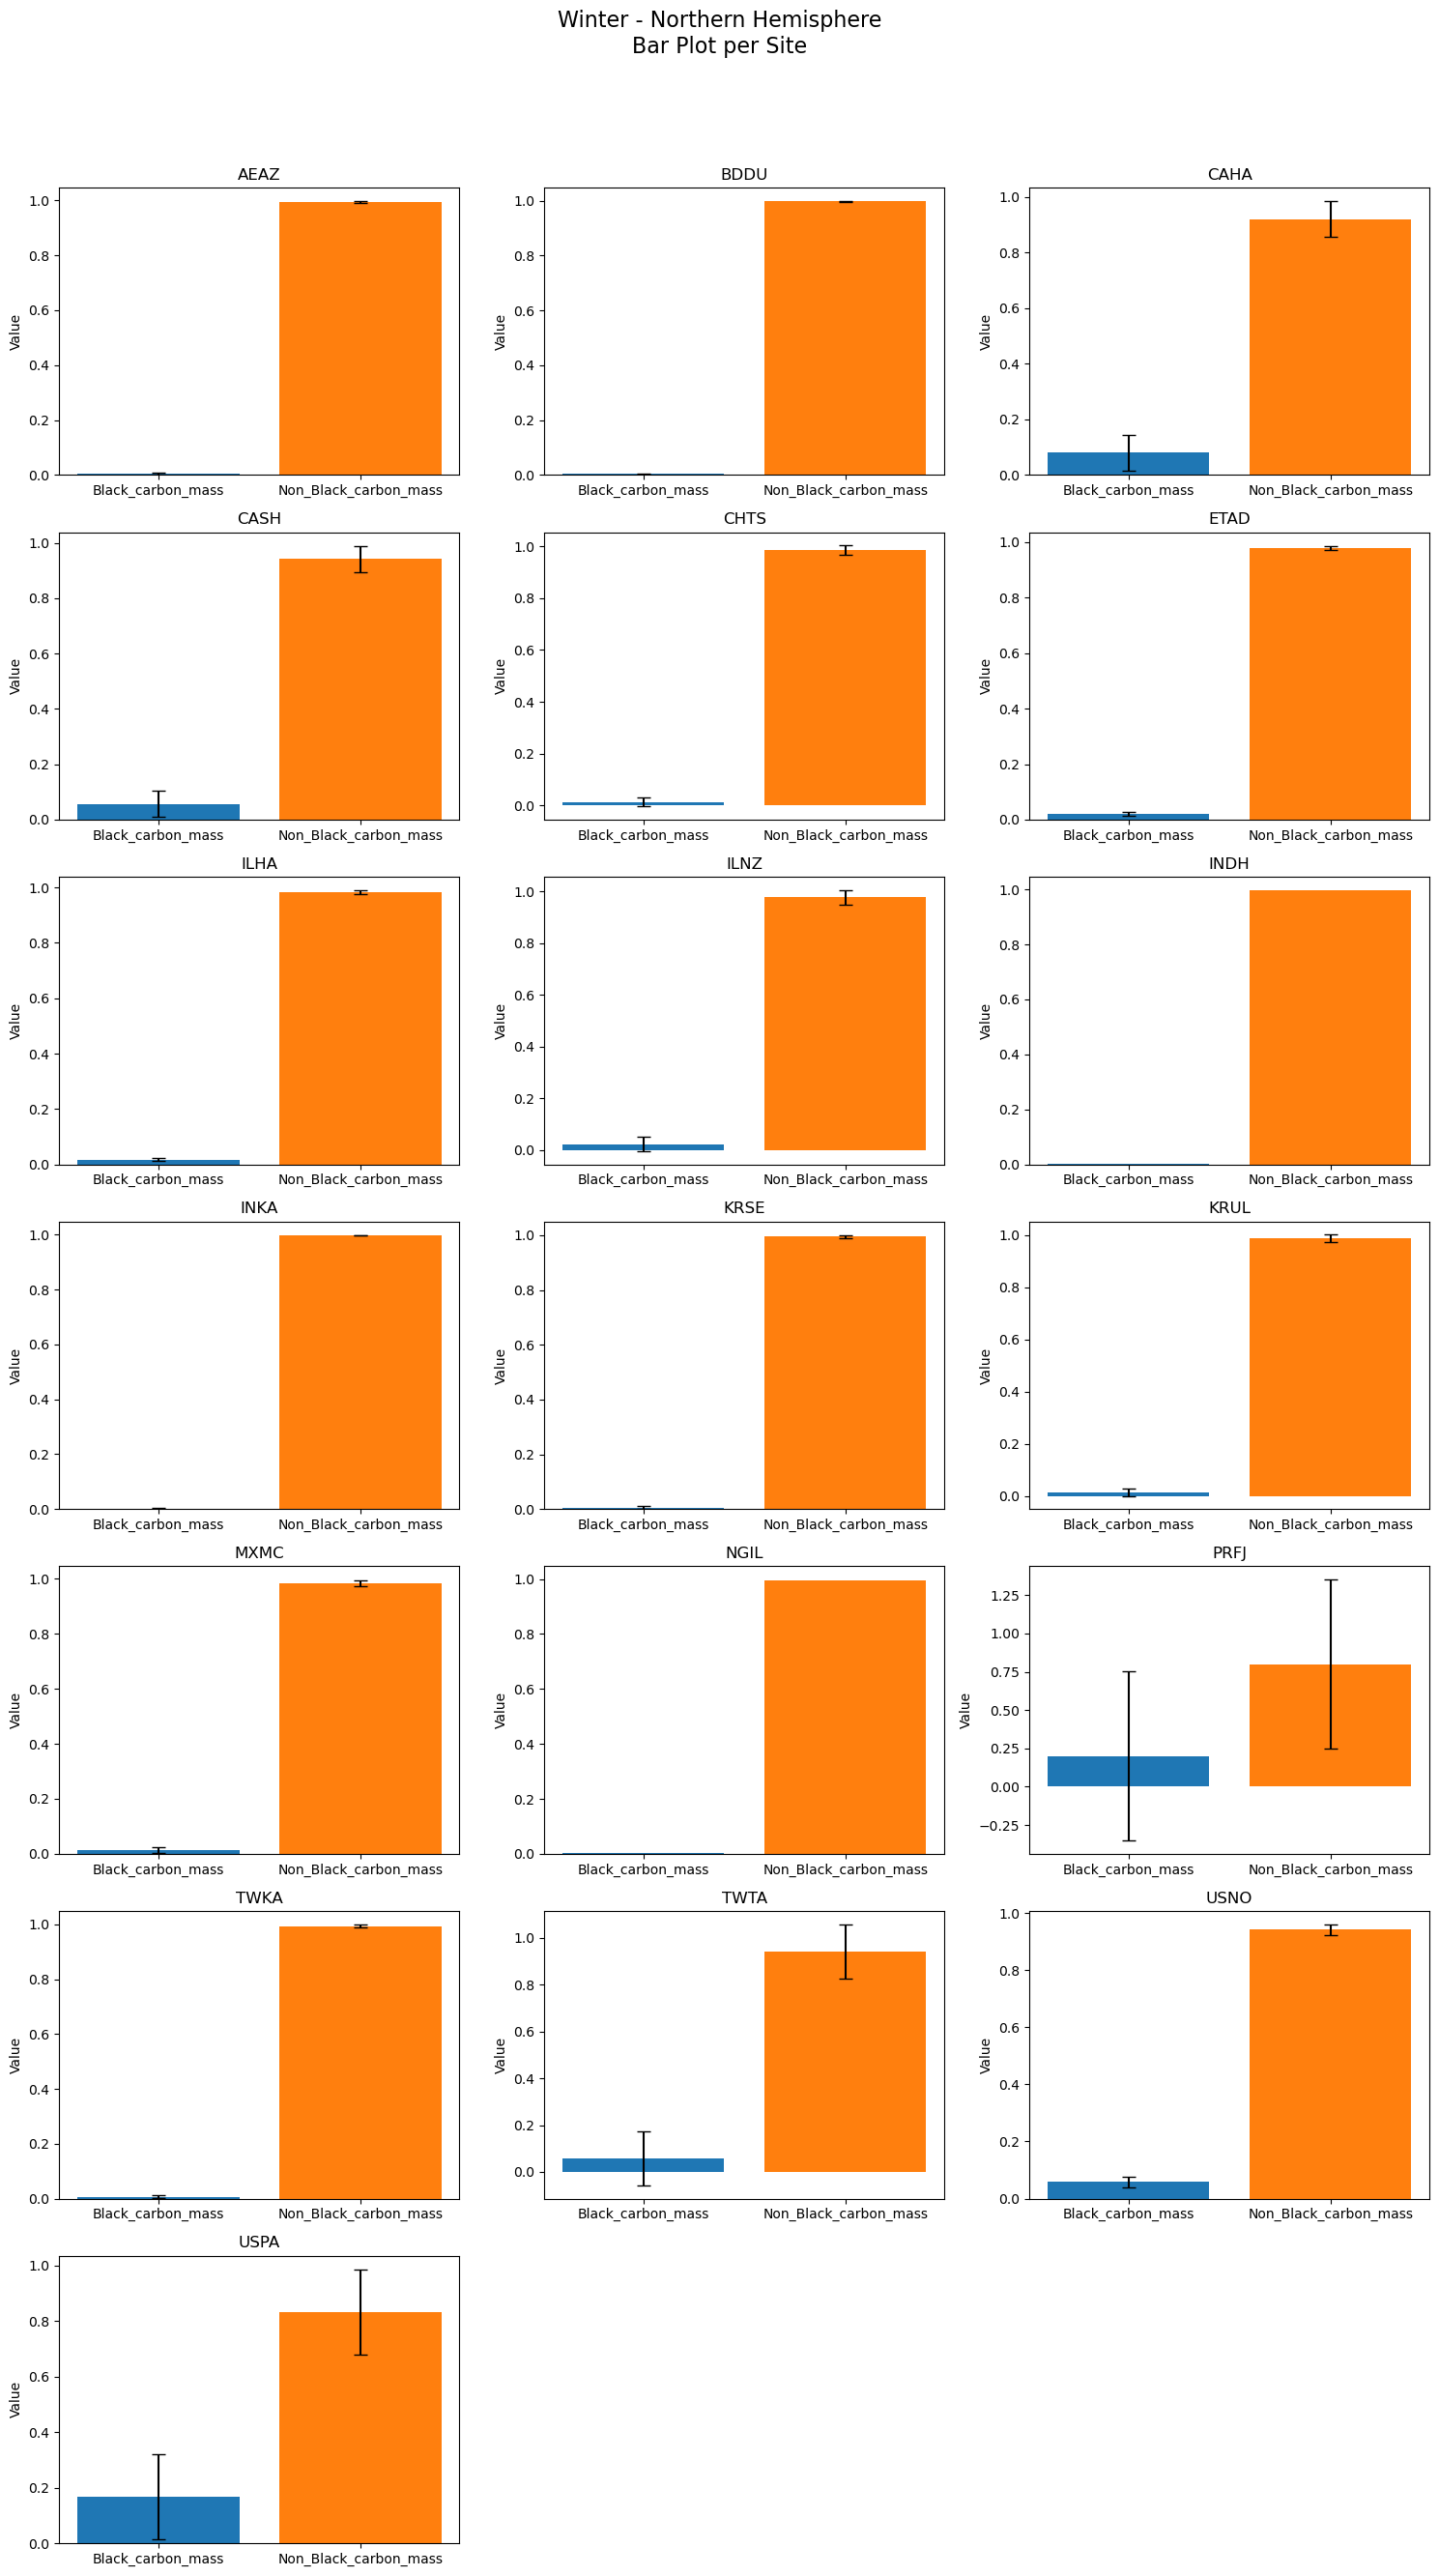

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Choose filters
season_filter = 'Winter'
hemisphere_filter = 'northern'

# STEP 2: Filter the DataFrame
filtered_df = pm25_df[
    (pm25_df['Season'] == season_filter) &
    (pm25_df['Hemisphere'] == hemisphere_filter)
]

# STEP 3: Group by Site
metrics = ['Black_carbon_mass', 'Non_Black_carbon_mass']
grouped = filtered_df.groupby('Site')

# How many sites?
sites = list(grouped.groups.keys())
n_sites = len(sites)

# Layout: automatic rows & cols for subplots
n_cols = 3
n_rows = (n_sites + n_cols - 1) // n_cols

# STEP 4: Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# STEP 5: Plot each site in its own subplot
for idx, site in enumerate(sites):
    row, col = divmod(idx, n_cols)
    ax = axes[row][col]
    
    data = grouped.get_group(site)
    means = data[metrics].mean()
    errors = data[metrics].std()

    ax.bar(metrics, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax.set_title(site)
    ax.set_ylabel('Value')
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(metrics, ha='center')

# Hide any empty subplots
for idx in range(n_sites, n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row][col].axis('off')

# Final layout
fig.suptitle(f'{season_filter} - {hemisphere_filter.capitalize()} Hemisphere\nBar Plot per Site', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

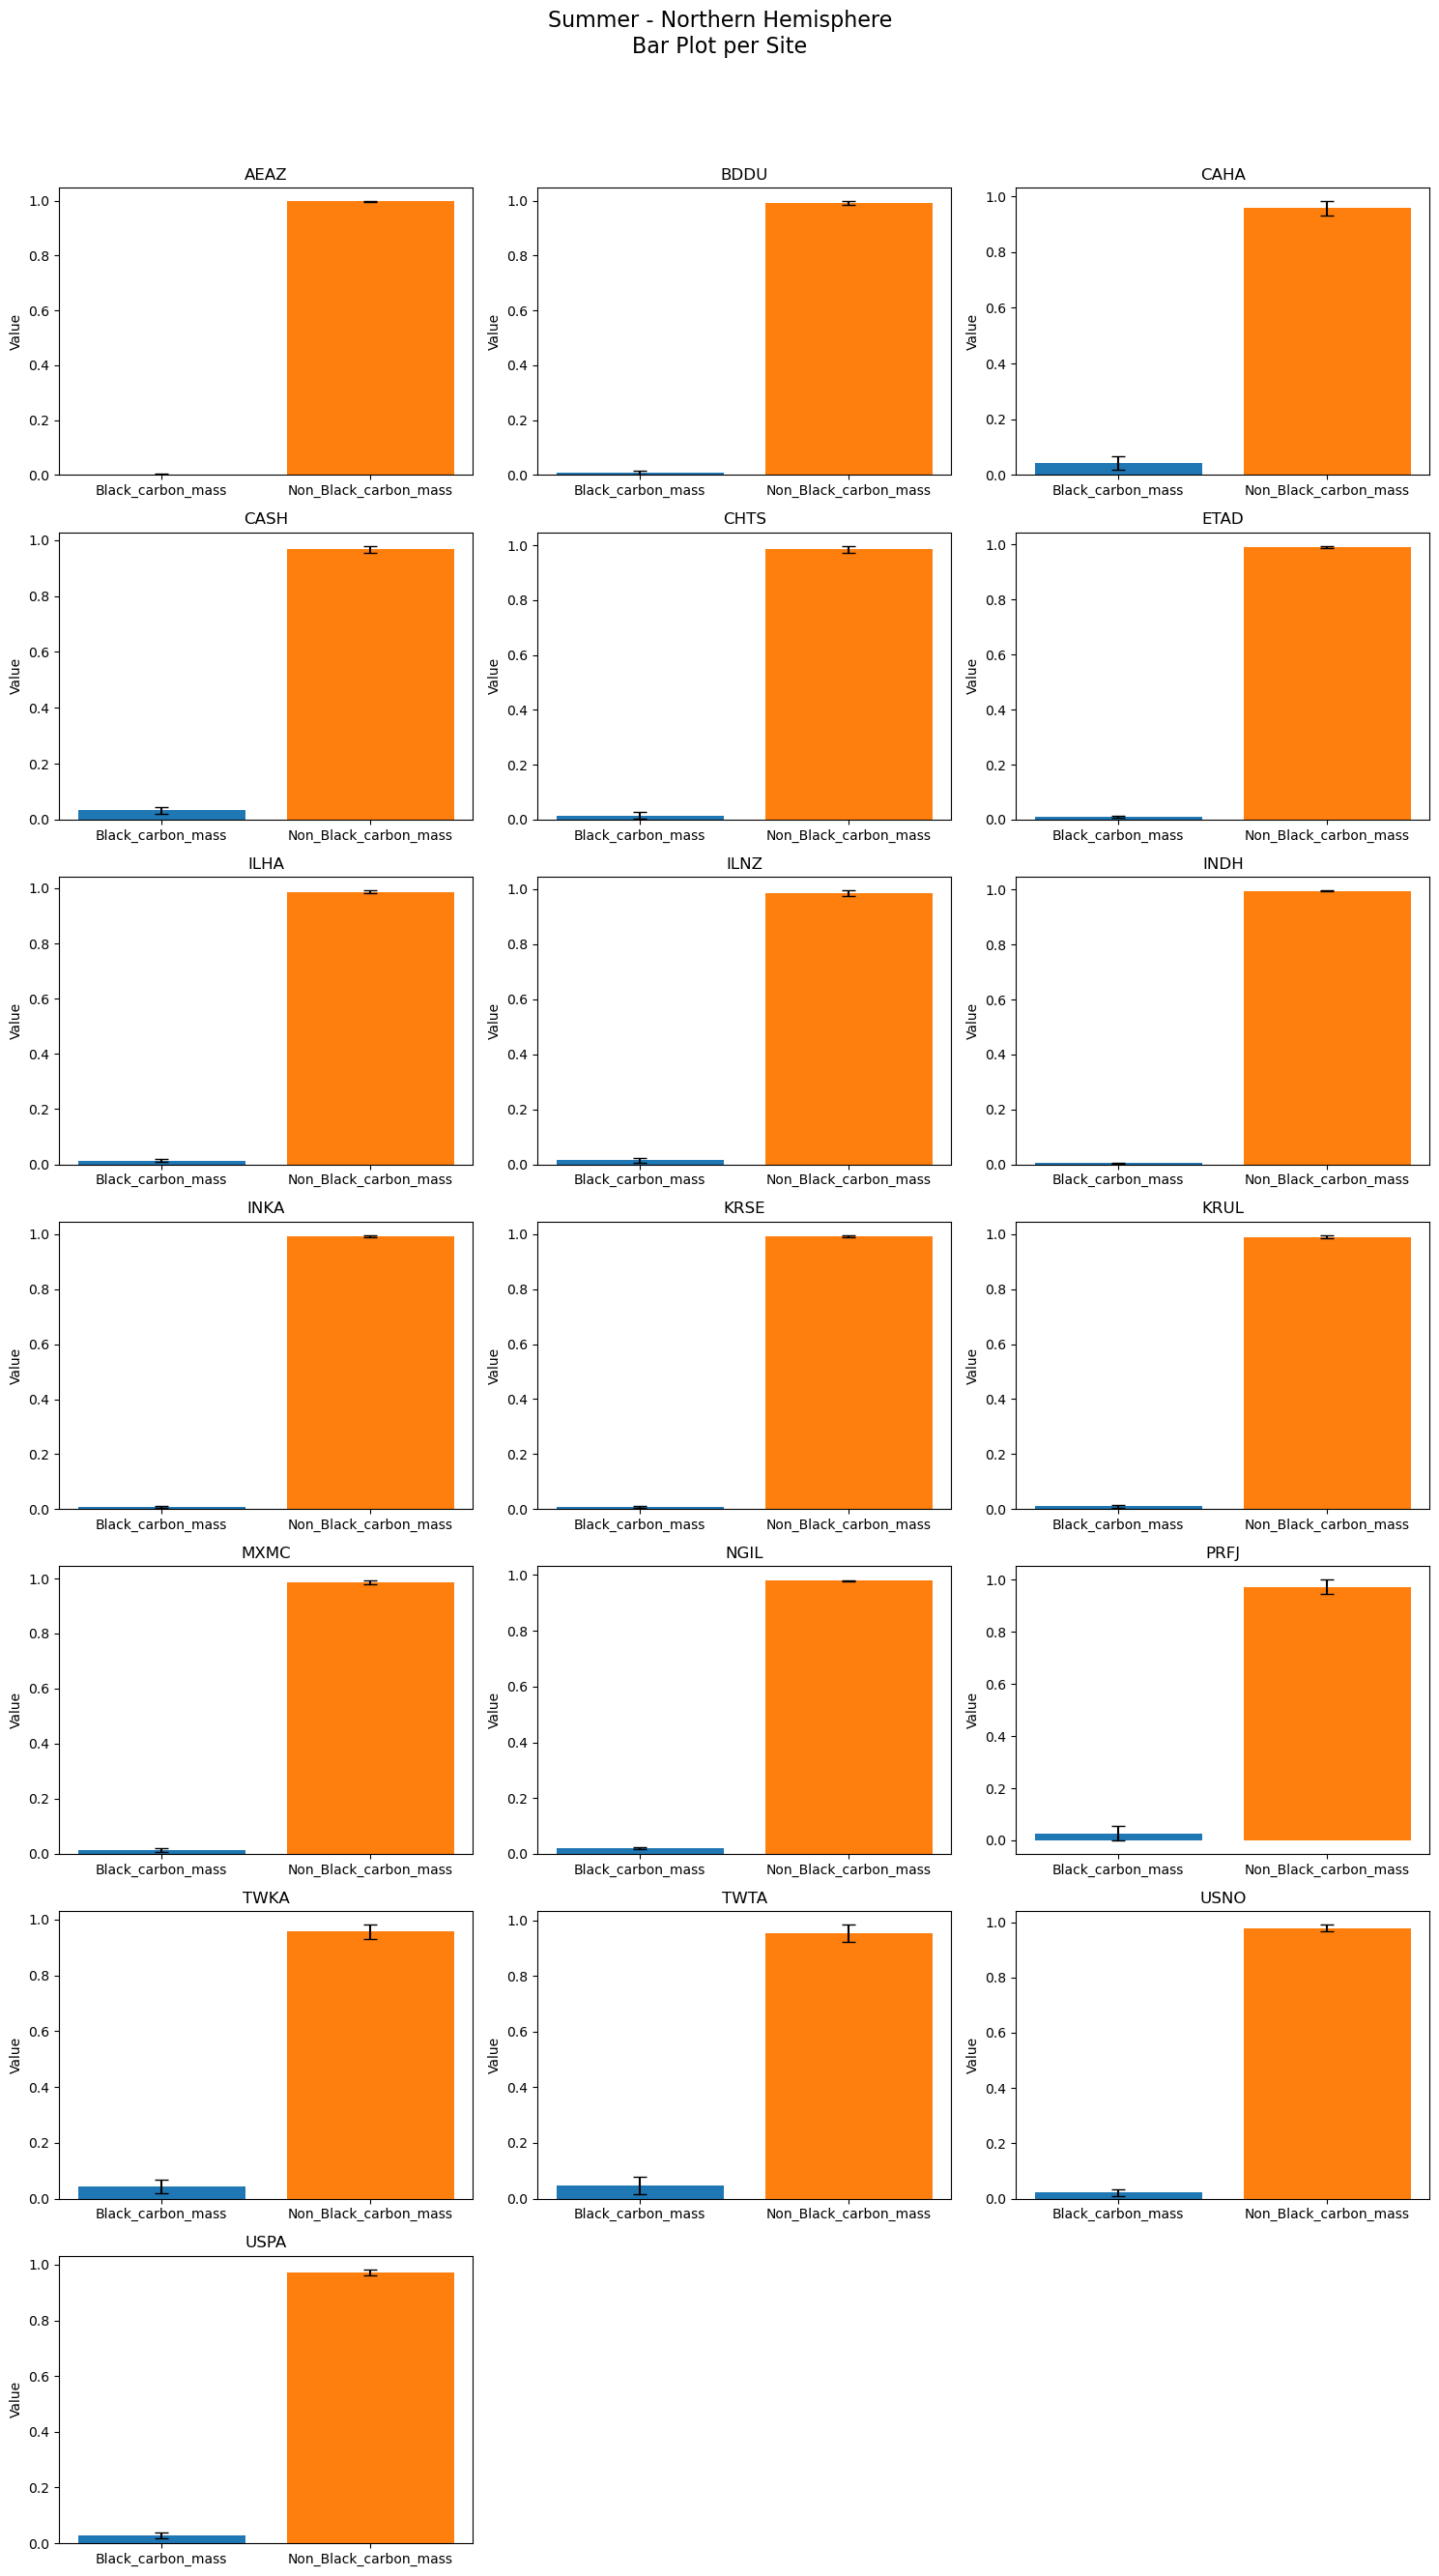

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Choose filters
season_filter = 'Summer'
hemisphere_filter = 'northern'

# STEP 2: Filter the DataFrame
filtered_df = pm25_df[
    (pm25_df['Season'] == season_filter) &
    (pm25_df['Hemisphere'] == hemisphere_filter)
]

# STEP 3: Group by Site
metrics = ['Black_carbon_mass', 'Non_Black_carbon_mass']
grouped = filtered_df.groupby('Site')

# How many sites?
sites = list(grouped.groups.keys())
n_sites = len(sites)

# Layout: automatic rows & cols for subplots
n_cols = 3
n_rows = (n_sites + n_cols - 1) // n_cols

# STEP 4: Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# STEP 5: Plot each site in its own subplot
for idx, site in enumerate(sites):
    row, col = divmod(idx, n_cols)
    ax = axes[row][col]
    
    data = grouped.get_group(site)
    means = data[metrics].mean()
    errors = data[metrics].std()

    ax.bar(metrics, means, yerr=errors, capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax.set_title(site)
    ax.set_ylabel('Value')
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(metrics, ha='center')

# Hide any empty subplots
for idx in range(n_sites, n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row][col].axis('off')

# Final layout
fig.suptitle(f'{season_filter} - {hemisphere_filter.capitalize()} Hemisphere\nBar Plot per Site', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()